<a href="https://colab.research.google.com/github/bhateja684/CyberPortal_DataAnalysisModel/blob/main/CyberPortal_DataAnalysisModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Libraries

In [ ]:
# Cell 1: Import Libraries and Faker Setup



import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import joblib # Used for saving/loading models and components
from sklearn.model_selection import train_test_split # Used in Cell 6 & 11
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # Used in Cell 6 & 11
from sklearn.metrics import mean_squared_error, accuracy_score # Used in Cell 6 & 11
from sklearn.preprocessing import LabelEncoder # Used in Cell 5 & 12
import matplotlib.pyplot as plt # Used for plotting in Cell 4 & 14
import seaborn as sns # Used for plotting in Cell 4 & 14
from collections import Counter # Used in Cell 10


try:
    import openpyxl
    print("openpyxl imported successfully.")
except ImportError:
    print("openpyxl not found. Installing...")
    !pip install openpyxl
    import openpyxl
    print("openpyxl installed and imported.")



try:
    import google.colab
    !pip install faker
    from faker import Faker
    fake = Faker()
except ImportError:
    from faker import Faker
    fake = Faker()
    print("Not running in Colab. If Faker is not installed, please install it manually: pip install faker")

print("Cell 1: Libraries imported and Faker setup complete.")

openpyxl imported successfully.
Cell 1: Libraries imported and Faker setup complete.


# Dummy Data

In [ ]:
# import pandas as pd
# import numpy as np
# import random
# from datetime import datetime, timedelta
# # Check if running in Colab and install Faker if necessary
# try:
#     import google.colab
#     !pip install faker
#     from faker import Faker
#     fake = Faker()

# except ImportError:
#     from faker import Faker
#     fake = Faker()
#     print("Not running in Colab. If Faker is not installed, please install it manually: pip install faker")

# # --- Define Possible Values (Based on the Form) ---

# physical_locations = ['Room 101', 'Lab A', 'Server Room', 'Reception', 'CEO Office', 'Data Center', 'Workstation Area']
# severity_levels = ['Low', 'Medium', 'High', 'Critical']
# classified_system_options = ['Yes', 'No', 'Unknown']
# os_versions = ['Windows 10', 'Windows 11', 'Ubuntu 20.04', 'MacOS Monterey', 'CentOS 7']
# hardware_vendors = ['Dell', 'HP', 'Lenovo', 'Apple', 'Custom Build']
# incident_types = ['Phishing', 'Malware Infection', 'Ransomware', 'DDoS Attack', 'Data Breach', 'Account Compromise', 'Insider Threat', 'Vulnerability Exploit']
# agencies_notified = ['CEO & Team', 'Legal Director', 'CIO Director', 'Other']




# unusual_behaviors = [
#     'System crashes',
#     'New user accounts/Accounting discrepancies',
#     'Failed or successful social engineering attempts',
#     'Unexplained, poor system performance',
#     'Unaccounted for changes in the DNS tables, router rules, or firewall rules',
#     'Unexplained elevation or use of privileges',
#     'Operation of a sniffer or traffic device to capture network traffic',
#     'An indicated last time of usage of a user account that does not correspond to the actual last time of usage for that user',
#     'A system alarm or similar indication from an intrusion detection tool',
#     'Altered home pages, which are usually the intentional target for visibility, or other pages on the Web server',
#     'Anomalies',
#     'Suspicious probes',
#     'Suspicious browsing',
#     'Hidden files',
#     'Changes in file lengths or dates'
# ]

# # --- Number of Entries ---
# num_entries = 1000




# # --- Generate Data ---
# # data = {
# #     'Name': [fake.name() for _ in range(num_entries)],
# #     'Email': [fake.email() for _ in range(num_entries)],
# #     'Phone Number': [fake.phone_number() for _ in range(num_entries)],
# #     'Physical Location': np.random.choice(physical_locations, num_entries),
# #     'Date and Time Incident Occurred': [datetime.now() - timedelta(days=random.randint(1, 365)) for _ in range(num_entries)],  # Random dates in the past year
# #     'Severity': np.random.choice(severity_levels, num_entries),
# #     'Incident Reported On': [datetime.now() - timedelta(days=random.randint(0, 30)) for _ in range(num_entries)], # Random dates in the past month
# #     'Classified System': np.random.choice(classified_system_options, num_entries),
# #     'PC Name': [f'Workstation{i:03}' for i in range(1, num_entries + 1)],  # Example PC names
# #     'IP Address': [f'192.168.1.{random.randint(1, 254)}' for _ in range(num_entries)],  # Example IP addresses
# #     'MAC Address': [f'{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}' for _ in range(num_entries)],  # Random MAC addresses
# #     'Network Type': np.random.choice(['Wired', 'Wireless'], size=num_entries),
# #     'OS Version': np.random.choice(os_versions, num_entries),
# #     'Hardware Vendor': np.random.choice(hardware_vendors, num_entries),
# #     'Incident Type': np.random.choice(incident_types, num_entries),
# #     'Description': ['This is a sample incident description.' for _ in range(num_entries)],  # Placeholder - Important for NLP later
# #     'Third Parties Involved': np.random.choice(['Vendor A', 'Contractor B', None], size=num_entries), #Some None Values
# #     'Unusual Behavior': [random.choices(unusual_behaviors, k=random.randint(0, 5)) for _ in range(num_entries)],  # List of unusual behaviors
# #     'Has Problem Been Experienced Earlier': np.random.choice(['Yes', 'No'], num_entries),
# #     'Agencies Notified': [random.choices(agencies_notified, k=random.randint(0, len(agencies_notified))) for _ in range(num_entries)], # List of agencies
# #     'Additional Information': np.random.choice(['None', 'See attached logs'], size=num_entries), #Using np.random.choice to directly assign values to the column
# #     'Actions Taken': [random.choices(['System Restart/Shutdown', 'Disconnected from Network', 'Scanned with Antivirus'], k=random.randint(0,3)) for _ in range(num_entries)], #Some None Values
# #     'Time Taken (Hours)': np.random.uniform(1, 48, num_entries), #Time to resolve, our target variable
# #     'Resolution Status': ['Resolved', 'Pending', 'Escalated', 'False Positive'][np.random.randint(0,4, num_entries)] #Our other target variable
# # }
# standard_actions = [
#     'ISOLATE_ENDPOINT', 'RUN_MALWARE_SCAN', 'BLOCK_IP', 'RESET_PASSWORD',
#     'PATCH_VULNERABILITY', 'RESTORE_FROM_BACKUP', 'ANALYZE_LOGS',
#     'REVIEW_FIREWALL_RULES', 'NOTIFY_LEGAL', 'USER_AWARENESS_TRAINING',
#     'COLLECT_EVIDENCE'
# ]



# # --- Generate Data ---
# data = {
#     'Name': [fake.name() for _ in range(num_entries)],
#     'Email': [fake.email() for _ in range(num_entries)],
#     'Phone Number': [fake.phone_number() for _ in range(num_entries)],
#     'Physical Location': np.random.choice(physical_locations, num_entries),
#     'Date and Time Incident Occurred': [datetime.now() - timedelta(days=random.randint(1, 365)) for _ in range(num_entries)],  # Random dates in the past year
#     'Severity': np.random.choice(severity_levels, num_entries),
#     'Incident Reported On': [datetime.now() - timedelta(days=random.randint(0, 30)) for _ in range(num_entries)], # Random dates in the past month
#     'Classified System': np.random.choice(classified_system_options, num_entries),
#     'PC Name': [f'Workstation{i:03}' for i in range(1, num_entries + 1)],  # Example PC names
#     'IP Address': [f'192.168.1.{random.randint(1, 254)}' for _ in range(num_entries)],  # Example IP addresses
#     'MAC Address': [f'{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}' for _ in range(num_entries)],  # Random MAC addresses
#     'Network Type': np.random.choice(['Wired', 'Wireless'], size=num_entries),
#     'OS Version': np.random.choice(os_versions, num_entries),
#     'Hardware Vendor': np.random.choice(hardware_vendors, num_entries),
#     'Incident Type': np.random.choice(incident_types, num_entries),
#     'Description': ['This is a sample incident description.' for _ in range(num_entries)],  # Placeholder - Important for NLP later
#     'Third Parties Involved': np.random.choice(['Vendor A', 'Contractor B', None], size=num_entries), #Some None Values
#     'Unusual Behavior': [random.choices(unusual_behaviors, k=random.randint(0, 5)) for _ in range(num_entries)],  # List of unusual behaviors
#     'Has Problem Been Experienced Earlier': np.random.choice(['Yes', 'No'], num_entries),
#     'Agencies Notified': [random.choices(agencies_notified, k=random.randint(0, len(agencies_notified))) for _ in range(num_entries)], # List of agencies
#     'Additional Information': np.random.choice(['None', 'See attached logs'], size=num_entries), #Using np.random.choice to directly assign values to the column
#     'Actions Taken': [random.choices(['System Restart/Shutdown', 'Disconnected from Network', 'Scanned with Antivirus','Backup Taken'], k=random.randint(0,3)) for _ in range(num_entries)], #Some None Values
#     'Time Taken (Hours)': np.random.uniform(1, 48, num_entries), #Time to resolve, our target variable
#     'Resolution Status': np.random.choice(['Resolved', 'Pending', 'Escalated', 'False Positive'], size=num_entries) #Our other target variable, using np.random.choice for proper list selection
# }



# df = pd.DataFrame(data)

# # --- Print the First Few Rows ---
# print(df.head(500))

In [ ]:
# Cell 1 : Load Data from Excel File and Define Setup Variables

import pandas as pd
import numpy as np
from datetime import datetime

# Specify your Excel file name ---
excel_file_name = '/content/cybersecurity_incident_report_database.xlsx'

print(f"--- Loading Data from Excel: {excel_file_name} ---")
try:
    df = pd.read_excel(excel_file_name)

    print(f"Successfully loaded {len(df)} records from {excel_file_name}")
    print("\nFirst 5 rows of the loaded data:")
    print(df.head())
    print("\nColumn names in the loaded data:")
    print(df.columns.tolist())
    print("\nData types of the loaded data:")
    print(df.info())

except FileNotFoundError:
    print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print(f"ERROR: Excel file '{excel_file_name}' not found in Colab session storage.")
    print(f"Please upload the file to the Colab environment (left sidebar -> Files -> Upload).")
    print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    df = pd.DataFrame() # Create an empty DataFrame to prevent later cells from crashing immediately
except Exception as e:
    print(f"An error occurred while loading the Excel file: {e}")
    df = pd.DataFrame() # Create an empty DataFrame


# --- Define standard_actions if your 'Actions Taken' column needs it ---
standard_actions = [
    'ISOLATE_ENDPOINT', 'RUN_MALWARE_SCAN', 'BLOCK_IP', 'RESET_PASSWORD',
    'PATCH_VULNERABILITY', 'RESTORE_FROM_BACKUP', 'ANALYZE_LOGS',
    'REVIEW_FIREWALL_RULES', 'NOTIFY_LEGAL', 'USER_AWARENESS_TRAINING',
    'COLLECT_EVIDENCE'
    # Add any other standard actions you use
]
print(f"\nDefined standard_actions list ({len(standard_actions)} items).")

# --- Define lists for user prompts (these might come from your data or be predefined) ---
# IMPORTANT: Ensure ALL lists used by the manual input function (Cell 10) are defined here.

physical_locations = ['Room 101', 'Lab A', 'Server Room', 'Reception', 'CEO Office', 'Data Center', 'Workstation Area'] # Example
severity_levels = ['Low', 'Medium', 'High', 'Critical'] # Example
incident_types = ['Phishing', 'Malware Infection', 'Ransomware', 'DDoS Attack', 'Data Breach', 'Account Compromise', 'Insider Threat', 'Vulnerability Exploit'] # Example
classified_system_options = ['Yes', 'No'] # Example - ADDED
os_versions = ['Windows 10', 'Windows 11', 'MacOS Ventura', 'MacOS Sonoma', 'Linux', 'iOS', 'Android', 'Windows Server 2019', 'Windows Server 2022'] # Example - ADDED
hardware_vendors = ['Dell', 'HP', 'Lenovo', 'Apple', 'Cisco', 'Juniper', 'Other'] # Example - ADDED
additional_info_options = ['User Reported', 'System Alert', 'Logged Data', 'Vendor Provided Info', 'Physical Damage'] # Example - ADDED
unusual_behaviors_options = ['High CPU Usage', 'Suspicious Network Activity', 'Unexpected Reboots', 'Error Messages', 'Login Failures', 'File Encryption'] # Example - ADDED
agencies_notified_options = ['Internal Security Team', 'Law Enforcement', 'CERT', 'NIST', 'Vendor Support'] # Example - ADDED

print(f"Defined setup lists for manual input prompts.")

--- Loading Data from Excel: /content/cybersecurity_incident_report_database.xlsx ---
Successfully loaded 1000 records from /content/cybersecurity_incident_report_database.xlsx

First 5 rows of the loaded data:
            Name                       Email         Phone Number  \
0    Todd Keller     nrichardson@hotmail.com  +1-507-921-4229x148   
1     Robyn Cain           mtaylor@gmail.com    250-977-2265x9774   
2    Rhonda Dyer              jkim@yahoo.com     001-419-992-2558   
3  Emily Delgado  zdickson@pittman-ramos.com     555-124-0421x220   
4   Adam Jenkins        henryjulia@yahoo.com     611-626-5637x782   

  Physical Location Date and Time Incident Occurred  Severity  \
0             Lab A         2024-08-18 19:39:03.774  Critical   
1             Lab A         2024-12-19 19:39:03.774      High   
2        CEO Office         2025-02-12 19:39:03.774  Critical   
3          Room 101         2024-09-12 19:39:03.774      High   
4        CEO Office         2024-06-29 19:39:03.7

In [ ]:
# # Cell 1 : Load Data from Excel File

# import pandas as pd
# import numpy as np # Still useful for other operations
# from datetime import datetime # Still useful for time features

# # Specify your Excel file name ---
# excel_file_name = '/content/cybersecurity_incident_report_database.xlsx'

# print(f"--- Loading Data from Excel: {excel_file_name} ---")
# try:
#     # df = pd.read_excel(excel_file_name)
#     # If your Excel file has multiple sheets, specify the sheet name or index:
#     # df = pd.read_excel(excel_file_name, sheet_name='Sheet1')
#     # For this example, let's assume the first sheet is the correct one.
#     df = pd.read_excel(excel_file_name)

#     print(f"Successfully loaded {len(df)} records from {excel_file_name}")
#     print("\nFirst 5 rows of the loaded data:")
#     print(df.head())
#     print("\nColumn names in the loaded data:")
#     print(df.columns.tolist())
#     print("\nData types of the loaded data:")
#     print(df.info())

# except FileNotFoundError:
#     print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
#     print(f"ERROR: Excel file '{excel_file_name}' not found in Colab session storage.")
#     print(f"Please upload the file to the Colab environment (left sidebar -> Files -> Upload).")
#     print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
#     df = pd.DataFrame() # Create an empty DataFrame to prevent later cells from crashing immediately
# except Exception as e:
#     print(f"An error occurred while loading the Excel file: {e}")
#     df = pd.DataFrame() # Create an empty DataFrame

# # --- IMPORTANT: Define standard_actions if your 'Actions Taken' column needs it ---
# # If your 'Actions Taken' column in Excel is ALREADY a list of standardized strings, you might not need this.
# # If it's free text that you plan to map or if you want to ensure consistency for NEW suggestions, define it.


# standard_actions = [
#     'ISOLATE_ENDPOINT', 'RUN_MALWARE_SCAN', 'BLOCK_IP', 'RESET_PASSWORD',
#     'PATCH_VULNERABILITY', 'RESTORE_FROM_BACKUP', 'ANALYZE_LOGS',
#     'REVIEW_FIREWALL_RULES', 'NOTIFY_LEGAL', 'USER_AWARENESS_TRAINING',
#     'COLLECT_EVIDENCE'
#     # Add any other standard actions you use
# ]

# print(f"\nDefined standard_actions list: {standard_actions}")

# # --- Define lists for user prompts (these might come from your data or be predefined) ---
# # We can try to derive these from the loaded 'df' later in the preprocessing step
# # or you can keep predefined lists if your Excel data might not cover all options.


# physical_locations = ['Room 101', 'Lab A', 'Server Room', 'Reception', 'CEO Office', 'Data Center', 'Workstation Area'] # Example
# severity_levels = ['Low', 'Medium', 'High', 'Critical'] # Example
# incident_types = ['Phishing', 'Malware Infection', 'Ransomware', 'DDoS Attack', 'Data Breach', 'Account Compromise', 'Insider Threat', 'Vulnerability Exploit'] # Example
# # ... and so on for os_versions, hardware_vendors, etc., if you want to keep predefined lists for prompts.
# # Alternatively, after df is loaded:
# # if not df.empty and 'Incident Type' in df.columns:
# #     incident_types = df['Incident Type'].dropna().unique().tolist()
# #     print(f"\nIncident Types derived from data: {incident_types}")
# # else:
# #     print("\nUsing predefined incident_types list.")




# Graphs and Plots



--- Analyzing Incident Type Distribution ---


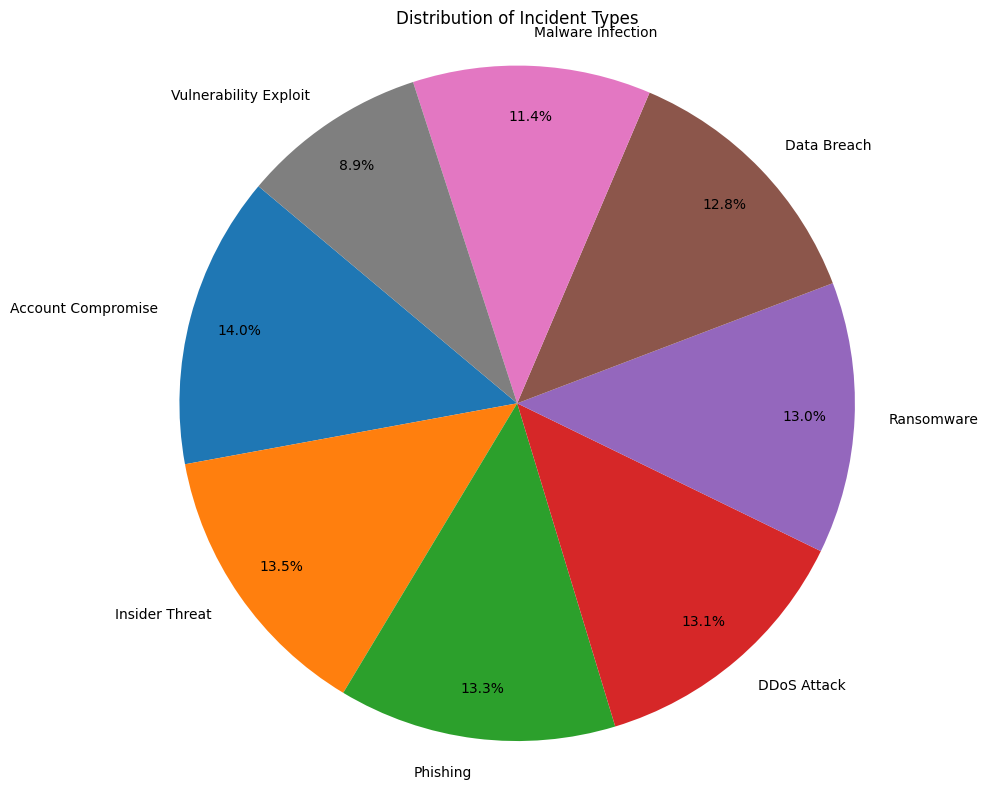

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

# Ensure 'df' exists and has the necessary columns
if 'df' not in locals():
    print("Error: DataFrame 'df' not found. Please generate or load data first.")
else:
    # --- Plot 1: Overall Distribution of Incident Types ---
    print("\n--- Analyzing Incident Type Distribution ---")
    if 'Incident Type' in df.columns:
        incident_counts = df['Incident Type'].value_counts()

        if not incident_counts.empty:
            plt.figure(figsize=(10, 8)) # Make the figure larger
            plt.pie(incident_counts, labels=incident_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
            plt.title('Distribution of Incident Types')
            plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            # Draw a circle at the center to make it a donut chart (optional)
            # centre_circle = plt.Circle((0,0),0.70,fc='white')
            # fig = plt.gcf()
            # fig.gca().add_artist(centre_circle)
            plt.tight_layout()
            plt.show()
        else:
            print("No data found for 'Incident Type' to plot.")
    else:
        print("Column 'Incident Type' not found in DataFrame.")


--- Analyzing Details for Incident Type: Phishing ---


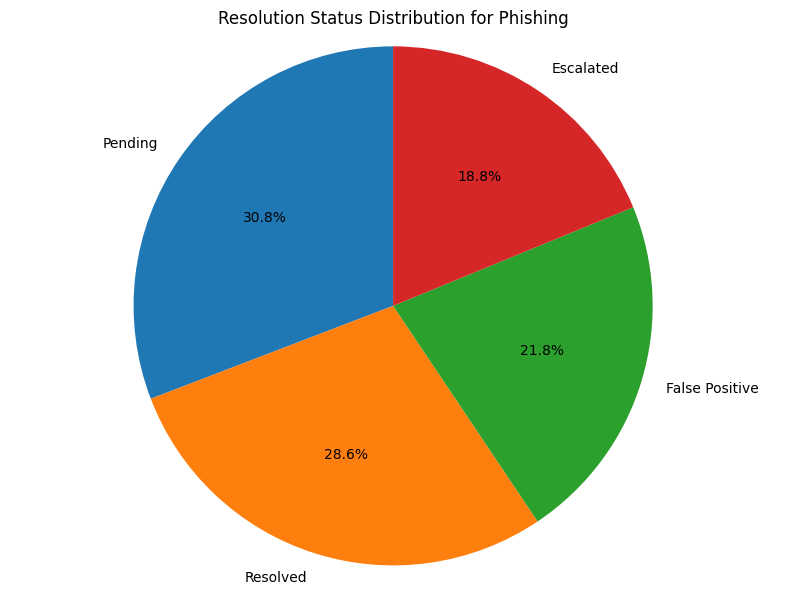


--- Analyzing Average Time Taken by Severity for: Phishing ---


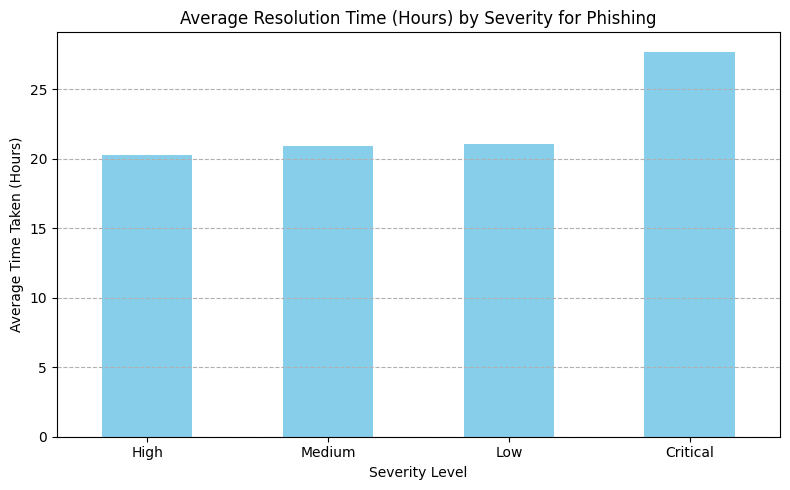

In [ ]:
# --- Plot 2: Breakdown for a Specific Incident Type ---

# --- CONFIGURATION: Choose the incident type you want to analyze ---
selected_incident_type = 'Phishing' # <---- CHANGE THIS to 'Malware', 'DDoS Attack', etc.
# -------------------------------------------------------------------

print(f"\n--- Analyzing Details for Incident Type: {selected_incident_type} ---")

if 'df' in locals() and 'Incident Type' in df.columns and 'Resolution Status' in df.columns:
    # Filter the DataFrame for the selected incident type
    filtered_df = df[df['Incident Type'] == selected_incident_type].copy() # Use .copy() to avoid SettingWithCopyWarning

    if not filtered_df.empty:
        # --- Subplot 2a: Resolution Status for the Selected Type ---
        status_counts = filtered_df['Resolution Status'].value_counts()

        if not status_counts.empty:
            plt.figure(figsize=(8, 6))
            plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
            plt.title(f'Resolution Status Distribution for {selected_incident_type}')
            plt.axis('equal')
            plt.tight_layout()
            plt.show()
        else:
            print(f"No resolution status data found for '{selected_incident_type}'.")

        # --- (Optional) Subplot 2b: Example - Average Time Taken by Severity for Selected Type ---
        if 'Severity' in filtered_df.columns and 'Time Taken (Hours)' in filtered_df.columns:
             print(f"\n--- Analyzing Average Time Taken by Severity for: {selected_incident_type} ---")
             # Ensure 'Time Taken (Hours)' is numeric
             filtered_df['Time Taken (Hours)'] = pd.to_numeric(filtered_df['Time Taken (Hours)'], errors='coerce')
             filtered_df.dropna(subset=['Time Taken (Hours)'], inplace=True) # Drop rows where conversion failed

             if not filtered_df.empty:
                 avg_time_by_severity = filtered_df.groupby('Severity')['Time Taken (Hours)'].mean().sort_values()

                 if not avg_time_by_severity.empty:
                     plt.figure(figsize=(8, 5))
                     avg_time_by_severity.plot(kind='bar', color='skyblue')
                     plt.title(f'Average Resolution Time (Hours) by Severity for {selected_incident_type}')
                     plt.xlabel('Severity Level')
                     plt.ylabel('Average Time Taken (Hours)')
                     plt.xticks(rotation=0)
                     plt.grid(axis='y', linestyle='--')
                     plt.tight_layout()
                     plt.show()
                 else:
                     print(f"Could not calculate average time by severity for '{selected_incident_type}'.")
             else:
                  print(f"No valid numeric 'Time Taken (Hours)' data after filtering for '{selected_incident_type}'.")

        # --- Add more plots here as needed ---
        # For example, a bar chart of 'Actions Taken' frequency for the selected type, etc.

    else:
        print(f"No incidents found for the selected type: '{selected_incident_type}'.")
else:
    print("Error: DataFrame 'df' or required columns ('Incident Type', 'Resolution Status') not found.")

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns # Using seaborn for potentially better plots like boxplot
# import pandas as pd
# import numpy as np

# # --- Configuration ---
# incident_type_to_analyze = 'Phishing'
# # -------------------

# print(f"\n--- Detailed Analysis for Incident Type: {incident_type_to_analyze} ---")

# if 'df' not in locals():
#     print("Error: DataFrame 'df' not found. Please generate or load data first.")
# else:
#     # --- Filter for the specific incident type ---
#     if 'Incident Type' in df.columns:
#         phishing_df = df[df['Incident Type'] == incident_type_to_analyze].copy() # Use .copy()

#         if phishing_df.empty:
#             print(f"No data found for Incident Type: '{incident_type_to_analyze}'.")
#         else:
#             print(f"Found {len(phishing_df)} incidents of type '{incident_type_to_analyze}'.")

#             # --- Plot 1: Resolution Status Breakdown ---
#             if 'Resolution Status' in phishing_df.columns:
#                 plt.figure(figsize=(8, 6))
#                 status_counts = phishing_df['Resolution Status'].value_counts()
#                 if not status_counts.empty:
#                     plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
#                     plt.title(f'Resolution Status for {incident_type_to_analyze}')
#                     plt.axis('equal')
#                     plt.tight_layout()
#                     plt.show()
#                 else:
#                     print("No 'Resolution Status' data for phishing incidents.")
#             else:
#                 print("Column 'Resolution Status' not found.")

#             # --- Plot 2: Distribution of Time Taken (Histogram) ---
#             if 'Time Taken (Hours)' in phishing_df.columns:
#                 # Ensure data is numeric, coercing errors and dropping NaNs
#                 time_data = pd.to_numeric(phishing_df['Time Taken (Hours)'], errors='coerce').dropna()
#                 if not time_data.empty:
#                     plt.figure(figsize=(10, 6))
#                     plt.hist(time_data, bins=15, color='skyblue', edgecolor='black') # Adjust bins as needed
#                     plt.title(f'Distribution of Resolution Time (Hours) for {incident_type_to_analyze}')
#                     plt.xlabel('Time Taken (Hours)')
#                     plt.ylabel('Number of Incidents')
#                     plt.grid(axis='y', linestyle='--')
#                     plt.tight_layout()
#                     plt.show()
#                 else:
#                     print("No valid numeric 'Time Taken (Hours)' data for phishing incidents.")
#             else:
#                 print("Column 'Time Taken (Hours)' not found.")

#             # --- Plot 3: Time Taken vs. Severity (Box Plot) ---
#             if 'Severity' in phishing_df.columns and 'Time Taken (Hours)' in phishing_df.columns:
#                  # Use the cleaned numeric time_data from Plot 2 if available
#                  temp_df = phishing_df.copy()
#                  temp_df['Time Taken (Hours)'] = pd.to_numeric(temp_df['Time Taken (Hours)'], errors='coerce')
#                  temp_df.dropna(subset=['Time Taken (Hours)', 'Severity'], inplace=True)

#                  if not temp_df.empty:
#                      plt.figure(figsize=(8, 6))
#                      # Define order for severity levels
#                      severity_order = ['Low', 'Medium', 'High', 'Critical']
#                      # Filter order to only include levels present in the data
#                      present_severity_order = [s for s in severity_order if s in temp_df['Severity'].unique()]

#                      sns.boxplot(data=temp_df, x='Severity', y='Time Taken (Hours)', order=present_severity_order, palette="viridis")
#                      plt.title(f'Resolution Time (Hours) by Severity for {incident_type_to_analyze}')
#                      plt.xlabel('Severity Level')
#                      plt.ylabel('Time Taken (Hours)')
#                      plt.tight_layout()
#                      plt.show()
#                  else:
#                      print("Not enough valid data to plot Time Taken vs Severity for phishing incidents.")
#             else:
#                 print("Columns 'Severity' or 'Time Taken (Hours)' not found for this plot.")


#             # --- Plot 4: Frequency of Actions Taken ---
#             if 'Actions Taken' in phishing_df.columns:
#                 # Since 'Actions Taken' might be lists (or single items), handle appropriately
#                 # If it's guaranteed to be single items (as per recent changes):
#                 action_counts = phishing_df['Actions Taken'].value_counts()

#                 if not action_counts.empty:
#                      plt.figure(figsize=(10, 6))
#                      action_counts.plot(kind='bar', color='lightcoral')
#                      plt.title(f'Frequency of Actions Taken for {incident_type_to_analyze}')
#                      plt.xlabel('Action Taken')
#                      plt.ylabel('Number of Incidents')
#                      plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
#                      plt.grid(axis='y', linestyle='--')
#                      plt.tight_layout()
#                      plt.show()
#                 else:
#                      print("No 'Actions Taken' data found for phishing incidents.")
#             else:
#                 print("Column 'Actions Taken' not found.")

#             # --- Add More Plots Here ---
#             # Example: Plot distribution by 'OS Version' for phishing
#             if 'OS Version' in phishing_df.columns:
#                  plt.figure(figsize=(10, 6))
#                  os_counts = phishing_df['OS Version'].value_counts()
#                  if not os_counts.empty:
#                      os_counts.plot(kind='bar', color='mediumseagreen')
#                      plt.title(f'OS Version Distribution for {incident_type_to_analyze}')
#                      plt.xlabel('OS Version')
#                      plt.ylabel('Number of Incidents')
#                      plt.xticks(rotation=45, ha='right')
#                      plt.grid(axis='y', linestyle='--')
#                      plt.tight_layout()
#                      plt.show()
#                  else:
#                      print("No 'OS Version' data for phishing incidents.")
#             # --------------------------

#     else:
#         print("Column 'Incident Type' not found in the main DataFrame 'df'.")


# Personalised Plots


--- Interactive Detailed Analysis by Incident Type ---

Available Incident Types:
1. Phishing
2. DDoS Attack
3. Insider Threat
4. Malware Infection
5. Account Compromise
6. Vulnerability Exploit
7. Ransomware
8. Data Breach
Enter the number corresponding to the Incident Type you want to analyze (1-8): 5

Analyzing details for: 'Account Compromise'
Found 140 incidents of type 'Account Compromise'.


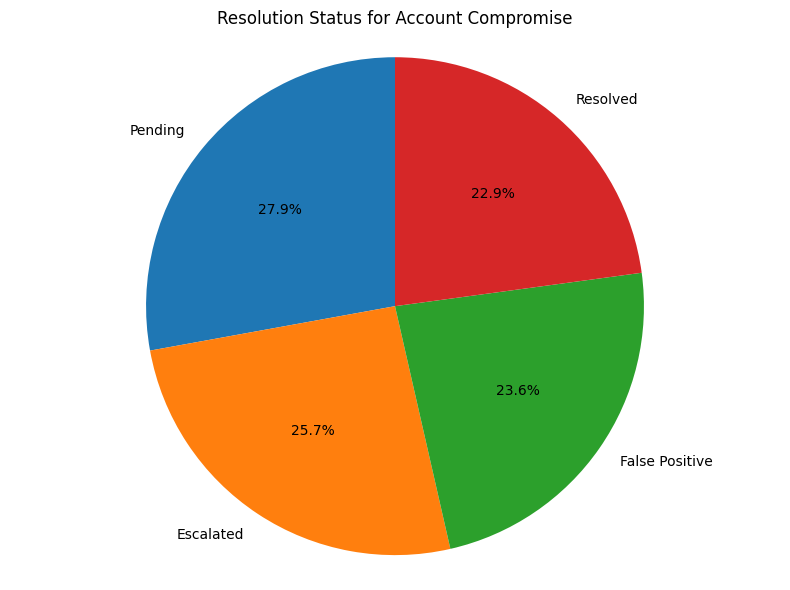

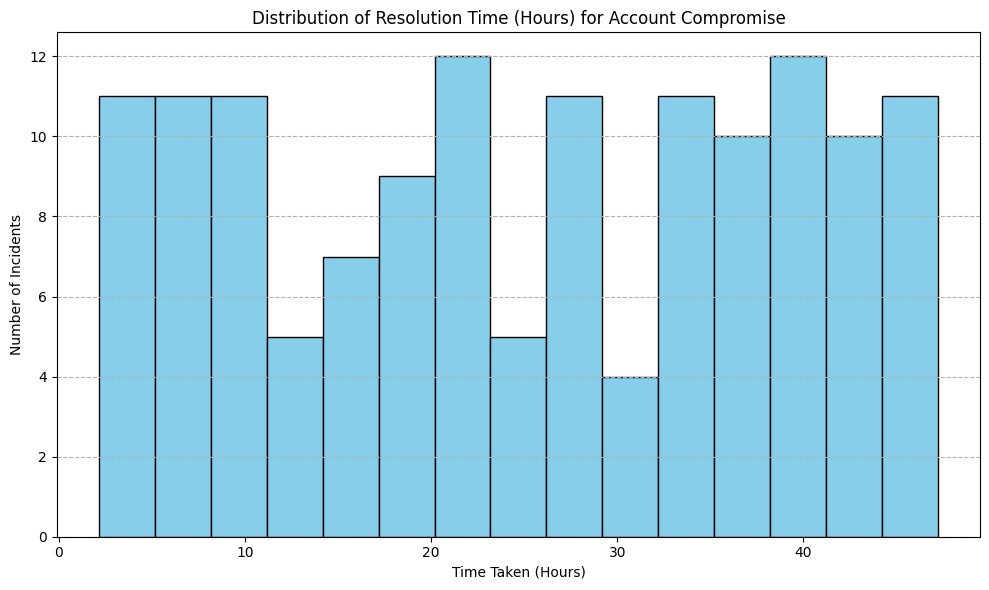

<ipython-input-66-3840293778>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=temp_df_sev, x='Severity', y='Time Taken (Hours)', order=present_severity_order, palette="viridis")


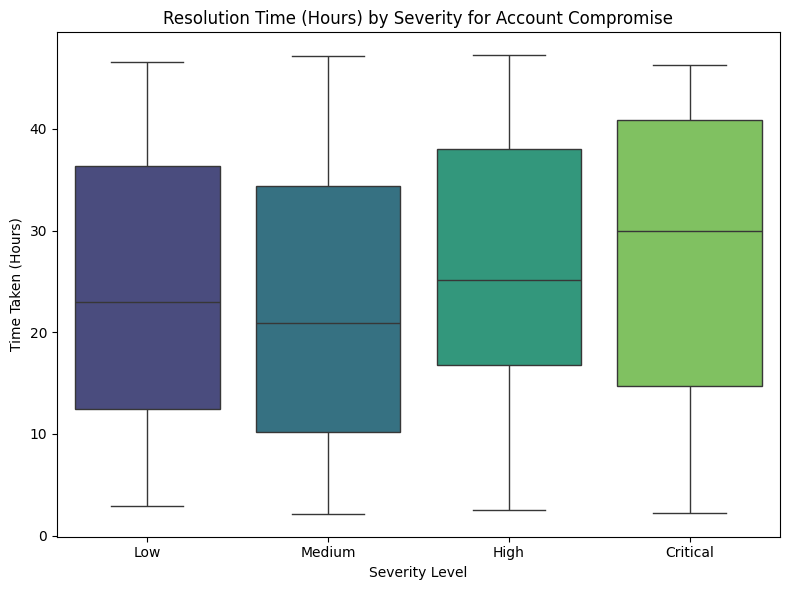

<ipython-input-66-3840293778>:113: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


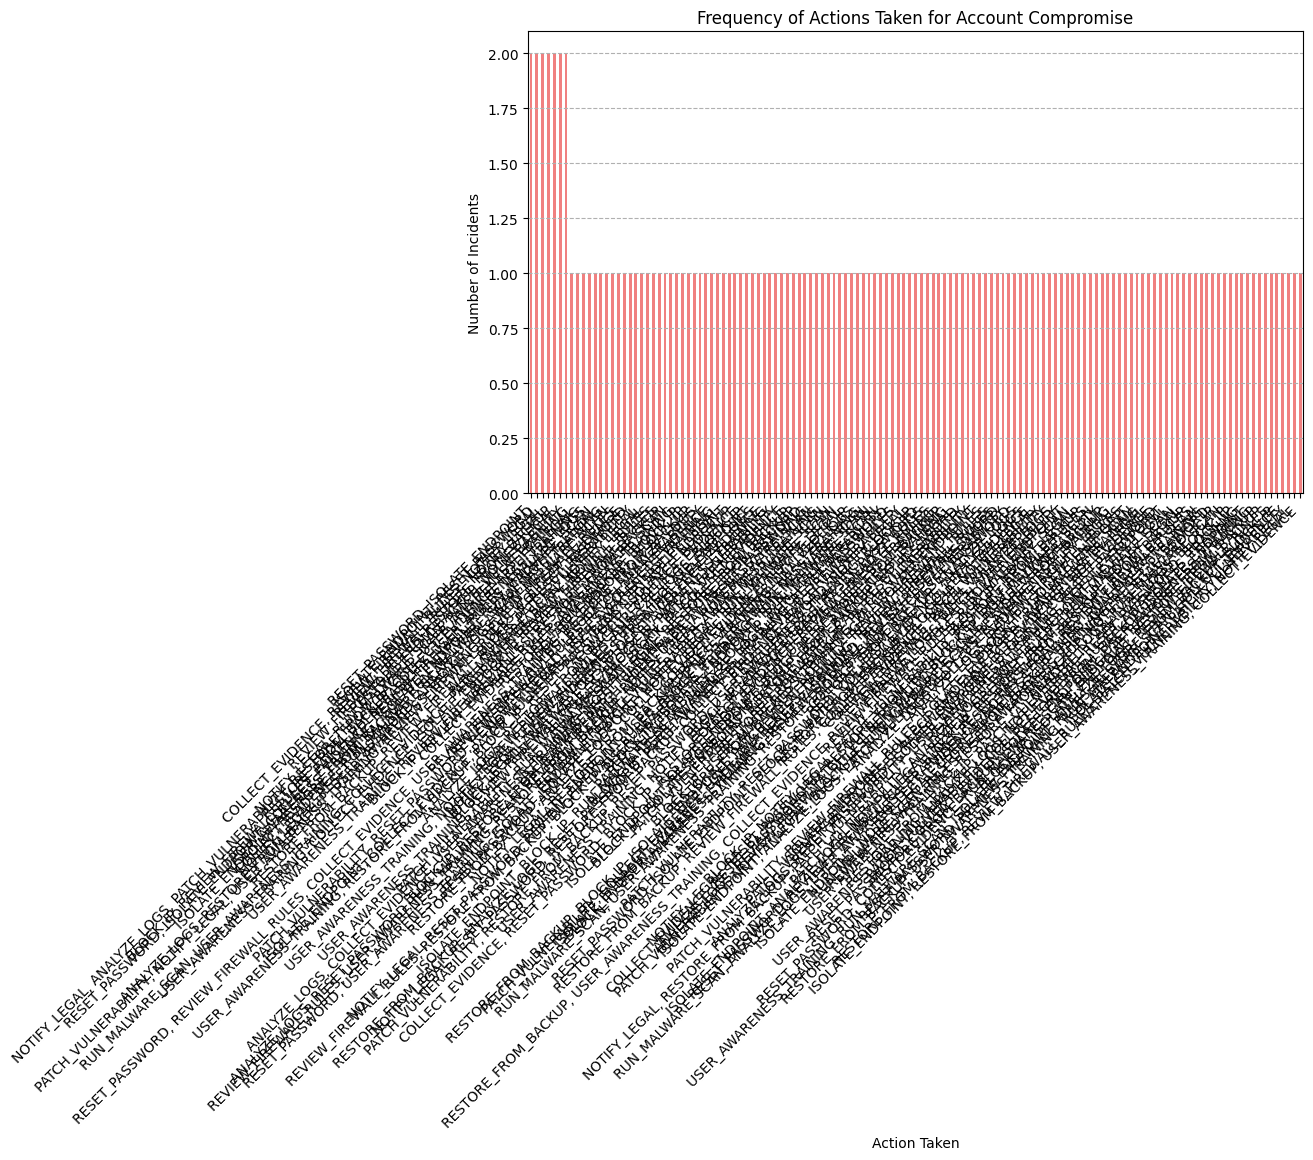

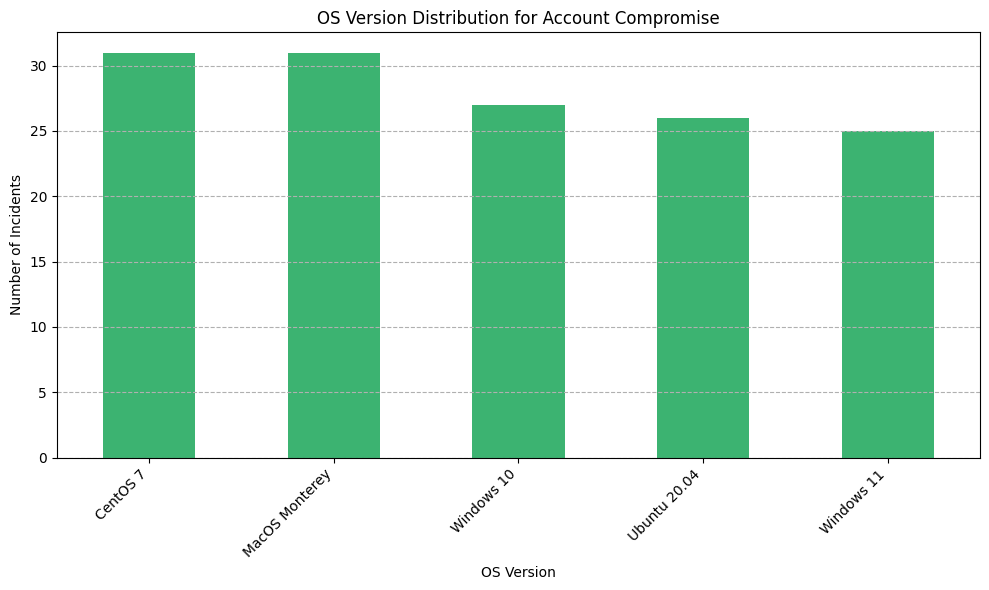

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns # Using seaborn for potentially better plots like boxplot
import pandas as pd
import numpy as np

print("--- Interactive Detailed Analysis by Incident Type ---")

if 'df' not in locals():
    print("Error: DataFrame 'df' not found. Please generate or load data first.")
else:
    if 'Incident Type' in df.columns:
        # --- Get User Input for Incident Type ---
        available_types = df['Incident Type'].unique().tolist()
        print("\nAvailable Incident Types:")
        for i, type_name in enumerate(available_types):
            print(f"{i+1}. {type_name}")

        while True:
            try:
                choice_num = input(f"Enter the number corresponding to the Incident Type you want to analyze (1-{len(available_types)}): ")
                choice_index = int(choice_num) - 1
                if 0 <= choice_index < len(available_types):
                    incident_type_to_analyze = available_types[choice_index]
                    print(f"\nAnalyzing details for: '{incident_type_to_analyze}'")
                    break
                else:
                    print("Invalid number. Please choose from the list.")
            except ValueError:
                print("Invalid input. Please enter a number.")
            except Exception as e:
                print(f"An error occurred: {e}")
                incident_type_to_analyze = None # Ensure loop breaks on other errors
                break

        if incident_type_to_analyze: # Proceed only if a valid type was chosen
            # --- Filter for the specific incident type ---
            filtered_df = df[df['Incident Type'] == incident_type_to_analyze].copy() # Use .copy()

            if filtered_df.empty:
                print(f"No data found for Incident Type: '{incident_type_to_analyze}'.")
            else:
                print(f"Found {len(filtered_df)} incidents of type '{incident_type_to_analyze}'.")

                # --- Plot 1: Resolution Status Breakdown ---
                if 'Resolution Status' in filtered_df.columns:
                    plt.figure(figsize=(8, 6))
                    status_counts = filtered_df['Resolution Status'].value_counts()
                    if not status_counts.empty:
                        plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
                        plt.title(f'Resolution Status for {incident_type_to_analyze}')
                        plt.axis('equal')
                        plt.tight_layout()
                        plt.show()
                    else:
                        print(f"No 'Resolution Status' data for '{incident_type_to_analyze}' incidents.")
                else:
                    print("Column 'Resolution Status' not found.")

                # --- Plot 2: Distribution of Time Taken (Histogram) ---
                if 'Time Taken (Hours)' in filtered_df.columns:
                    time_data = pd.to_numeric(filtered_df['Time Taken (Hours)'], errors='coerce').dropna()
                    if not time_data.empty:
                        plt.figure(figsize=(10, 6))
                        plt.hist(time_data, bins=15, color='skyblue', edgecolor='black')
                        plt.title(f'Distribution of Resolution Time (Hours) for {incident_type_to_analyze}')
                        plt.xlabel('Time Taken (Hours)')
                        plt.ylabel('Number of Incidents')
                        plt.grid(axis='y', linestyle='--')
                        plt.tight_layout()
                        plt.show()
                    else:
                        print(f"No valid numeric 'Time Taken (Hours)' data for '{incident_type_to_analyze}' incidents.")
                else:
                    print("Column 'Time Taken (Hours)' not found.")

                # --- Plot 3: Time Taken vs. Severity (Box Plot) ---
                if 'Severity' in filtered_df.columns and 'Time Taken (Hours)' in filtered_df.columns:
                     temp_df_sev = filtered_df.copy() # Use a temporary copy for this plot
                     temp_df_sev['Time Taken (Hours)'] = pd.to_numeric(temp_df_sev['Time Taken (Hours)'], errors='coerce')
                     temp_df_sev.dropna(subset=['Time Taken (Hours)', 'Severity'], inplace=True)

                     if not temp_df_sev.empty:
                         plt.figure(figsize=(8, 6))
                         severity_order = ['Low', 'Medium', 'High', 'Critical']
                         present_severity_order = [s for s in severity_order if s in temp_df_sev['Severity'].unique()]

                         if present_severity_order: # Only plot if there are severities to show
                             sns.boxplot(data=temp_df_sev, x='Severity', y='Time Taken (Hours)', order=present_severity_order, palette="viridis")
                             plt.title(f'Resolution Time (Hours) by Severity for {incident_type_to_analyze}')
                             plt.xlabel('Severity Level')
                             plt.ylabel('Time Taken (Hours)')
                             plt.tight_layout()
                             plt.show()
                         else:
                             print(f"No valid severity levels found to plot against Time Taken for '{incident_type_to_analyze}'.")
                     else:
                         print(f"Not enough valid data to plot Time Taken vs Severity for '{incident_type_to_analyze}' incidents.")
                else:
                    print("Columns 'Severity' or 'Time Taken (Hours)' not found for Severity vs Time plot.")


                # --- Plot 4: Frequency of Actions Taken ---
                if 'Actions Taken' in filtered_df.columns:
                    action_counts = filtered_df['Actions Taken'].value_counts()
                    if not action_counts.empty:
                         plt.figure(figsize=(10, 6))
                         action_counts.plot(kind='bar', color='lightcoral')
                         plt.title(f'Frequency of Actions Taken for {incident_type_to_analyze}')
                         plt.xlabel('Action Taken')
                         plt.ylabel('Number of Incidents')
                         plt.xticks(rotation=45, ha='right')
                         plt.grid(axis='y', linestyle='--')
                         plt.tight_layout()
                         plt.show()
                    else:
                         print(f"No 'Actions Taken' data found for '{incident_type_to_analyze}' incidents.")
                else:
                    print("Column 'Actions Taken' not found.")

                # --- Plot 5: OS Version Distribution ---
                if 'OS Version' in filtered_df.columns:
                     plt.figure(figsize=(10, 6))
                     os_counts = filtered_df['OS Version'].value_counts()
                     if not os_counts.empty:
                         os_counts.plot(kind='bar', color='mediumseagreen')
                         plt.title(f'OS Version Distribution for {incident_type_to_analyze}')
                         plt.xlabel('OS Version')
                         plt.ylabel('Number of Incidents')
                         plt.xticks(rotation=45, ha='right')
                         plt.grid(axis='y', linestyle='--')
                         plt.tight_layout()
                         plt.show()
                     else:
                         print(f"No 'OS Version' data found for '{incident_type_to_analyze}' incidents.")
                else:
                    print("Column 'OS Version' not found.")

                # --- Add more specific plots as needed here ---

    else:
        print("Column 'Incident Type' not found in the main DataFrame 'df'. Cannot proceed with analysis.")

# Defined Functions

In [ ]:
def calculate_avg_resolution_times(df):
    """Calculates the average resolution time for each unusual behavior.

    Args:
        df (pd.DataFrame): The DataFrame containing incident data.

    Returns:
        dict: A dictionary where keys are unusual behaviors and values are the average resolution times in hours.
    """

    avg_resolution_times = {}
    for behavior in set(behavior for sublist in df['Unusual Behavior'] for behavior in sublist): #Flatten list of lists
        # Filter the DataFrame to include only incidents where the behavior is present
        behavior_df = df[df['Unusual Behavior'].apply(lambda x: behavior in x)]

        # Calculate the average resolution time for the behavior
        if not behavior_df.empty: #Avoid ZeroDivisionError
            avg_resolution_time = behavior_df['Time Taken (Hours)'].mean()
            avg_resolution_times[behavior] = avg_resolution_time
        else:
            avg_resolution_times[behavior] = None # Or another suitable default like np.nan

    return avg_resolution_times

In [ ]:
# #Example Usage Code

# # Calculate the average resolution times
# avg_resolution_times = calculate_avg_resolution_times(df)

# # Get all X columns before transformations.
# all_columns = X.columns

# # Simulate a new entry
# new_entry = {
#     'Name': fake.name(),
#     'Email': fake.email(),
#     'Phone Number': fake.phone_number(),
#     'Physical Location': np.random.choice(physical_locations),
#     'Date and Time Incident Occurred': datetime.now() - timedelta(days=random.randint(1, 365)),
#     'Severity': np.random.choice(severity_levels),
#     'Incident Reported On': datetime.now() - timedelta(days=random.randint(0, 30)),
#     'Classified System': np.random.choice(classified_system_options),
#     'PC Name': f'Workstation{random.randint(1, 100)}',
#     'IP Address': f'192.168.1.{random.randint(1, 254)}',
#     'MAC Address': f'{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}',
#     'Network Type': np.random.choice(['Wired', 'Wireless']),
#     'OS Version': np.random.choice(os_versions),
#     'Hardware Vendor': np.random.choice(hardware_vendors),
#     'Incident Type': np.random.choice(incident_types),
#     'Description': 'Phishing attempt detected.',
#     'Third Parties Involved': np.random.choice(['Vendor A', 'Contractor B', None]),
#     'Unusual Behavior': random.choices(unusual_behaviors, k=random.randint(1, 3)), #Important
#     'Has Problem Been Experienced Earlier': np.random.choice(['Yes', 'No']),
#     'Agencies Notified': random.choices(agencies_notified, k=random.randint(0, len(agencies_notified))),
#     'Additional Information': np.random.choice(['None', 'See attached logs']),
#     'Actions Taken': np.random.choice(['System Restart/Shutdown', 'Disconnected from Network', 'Scanned with Antivirus']),  # Initially one random value
#     'Time Taken (Hours)':  np.random.uniform(1, 48), # Randomly Generated for the model
#     'Resolution Status': np.random.choice(['Resolved', 'Pending', 'Escalated', 'False Positive']) #Randomly Generated for the model
# }

# # Add the on-hot encoding inside the example usage code
# new_df = pd.DataFrame([new_entry])

# #Preprocess
# new_df['Incident Occurred Hour'] = new_df['Date and Time Incident Occurred'].dt.hour
# new_df['Incident Occurred Day of Week'] = new_df['Date and Time Incident Occurred'].dt.dayofweek
# new_df['Time Since Reported (Days)'] = (datetime.now() - new_df['Incident Reported On']).dt.days
# new_df = pd.get_dummies(new_df, columns=['Physical Location', 'Severity', 'Classified System', 'OS Version', 'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier', 'Actions Taken'])

# #Ensure the same columns exist in new_df as in the training data
# for col in all_columns:
#     if col not in new_df.columns:
#         new_df[col] = 0  #Or fill with an appropriate default value

# #Ensure the new_df only contains the same columns as the training data
# new_df = new_df[all_columns]

# # Process the new entry and get suggested information
# suggested_info = process_new_entry(new_entry, avg_resolution_times, regression_model, classification_model, label_encoder, all_columns)

# Data Cleaning

In [ ]:
#Checking The DataTypes
print(df.dtypes)

Name                                            object
Email                                           object
Phone Number                                    object
Physical Location                               object
Date and Time Incident Occurred         datetime64[ns]
Severity                                        object
Incident Reported On                    datetime64[ns]
Classified System                               object
PC Name                                         object
IP Address                                      object
MAC Address                                     object
Network Type                                    object
OS Version                                      object
Hardware Vendor                                 object
Incident Type                                   object
Description                                     object
Third Parties Involved                          object
Unusual Behavior                                object
Has Proble

In [ ]:
#Handling Missing Values
print(df.isnull().sum())

Name                                      0
Email                                     0
Phone Number                              0
Physical Location                         0
Date and Time Incident Occurred           0
Severity                                  0
Incident Reported On                      0
Classified System                         0
PC Name                                   0
IP Address                                0
MAC Address                               0
Network Type                              0
OS Version                                0
Hardware Vendor                           0
Incident Type                             0
Description                               0
Third Parties Involved                    0
Unusual Behavior                          0
Has Problem Been Experienced Earlier      0
Agencies Notified                         0
Additional Information                  330
Actions Taken                             0
Time Taken (Hours)              

In [ ]:
#Filling them with None
# df['Third Parties Involved'] = df['Third Parties Involved'].fillna('None')

#


# Feature Engineering

In [ ]:
# # Cell 6: Model'`, `'Severity'`, etc. (for one-hot encoding)

# **Revised Cell 5 (Feature Engineering):**
#  Training

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import mean_squared_error, accuracy_score
# import joblib
# import numpy as np
# *(You'll need to adjust the column names in `columns_to_drop_pii_etc` and `columns_to_one_hot_encode` to match your Excel sheet)*

# ```python
# # Cell 5: Featureimport pandas as pd

# print("--- Starting Model Training (Cell 6) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' is not loaded or is empty Engineering (Adapted for Your Excel Data)

# import pandas as pd
# import numpy as np
# from datetime import datetime
# from (from Cell 5). Please run previous cells.")
# else:
#     # --- Step 1: Define your ACTUAL sklearn.preprocessing import LabelEncoder # Ensure LabelEncoder is imported
# import joblib # For saving label_encoder

# print column names from the Excel/df (after Cell 5 processing) ---
#     col_time_taken_hours("--- Starting Feature Engineering (Cell 5) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' is not loaded or is empty. Please run Cell 3 first.")
# else: = 'Time_Taken_Hrs_Actual_Name'  # <--- REPLACE WITH YOUR ACTUAL COLUMN NAME
#     col_resolution_status_original = 'Resolution_Status_Actual_Name' # <--- REPLACE WITH YOUR ACTUAL COLUMN NAME

#     df_processed = df.copy() # Work on a copy to preserve original df if needed for inspection

#     # ---    col_actions_taken_original_text = 'Actions_Taken_Text_Actual_Name' # < 1. Drop Unnecessary/PII Columns ---
#     # LIST THE ACTUAL COLUMN NAMES FROM YOUR EXCEL TO--- REPLACE (only if it still exists and is different from _List)
#     col_unusual_behavior_ BE DROPPED
#     columns_to_drop_pii_etc = [
#         'Name', 'Emailoriginal_text = 'Unusual_Behavior_Text_Actual_Name' # <--- REPLACE (only if it', 'Phone Number', 'PC Name', 'IP Address', 'MAC Address',
#         'Description' # Assuming still exists and is different from _List)
#     col_date_occurred_original = 'Date_Occurred_ you are not using raw description as a feature yet
#         # Add any other IDs or irrelevant columns from your Excel sheet
#     Actual_Name' # <--- REPLACE
#     col_date_reported_original = 'Date_Reported_]
#     existing_cols_to_drop = [col for col in columns_to_drop_piiActual_Name' # <--- REPLACE

#     # This is the name of the column created in Cell 5
#     col_etc if col in df_processed.columns]
#     if existing_cols_to_drop:
#         _resolution_status_encoded = 'Resolution Status Encoded'


#     # --- Step 2: Define columns to drop todf_processed = df_processed.drop(columns=existing_cols_to_drop, errors='ignore') create the feature matrix X ---
#     columns_to_drop_for_X = [
#         col_time_taken
#         print(f"Dropped PII/irrelevant columns: {existing_cols_to_drop}")

#     # --- 2. Create Datetime Features ---
#     # ASSUME your Excel has columns: 'Date and Time_hours,                      # Target
#         col_resolution_status_original,            # Original target string
#         col Incident Occurred', 'Incident Reported On'
#     date_col_occurred = 'Date and Time Incident Occurred'
#     date_col_reported = 'Incident Reported On'

#     if date_col_occurred_resolution_status_encoded,             # Encoded target

#         'Actions Taken_List',                      # This is in df_processed.columns and date_col_reported in df_processed.columns:
#         try:
#  the list version, not for direct model input
#         'Unusual Behavior_List',                   # This is the list version, not            df_processed[date_col_occurred] = pd.to_datetime(df_processed[date_ for direct model input

#         # Only include these if they are still in df AND are different from the _List versions
# col_occurred], errors='coerce')
#             df_processed[date_col_reported] = pd.to_datetime(df_processed[date_col_reported], errors='coerce')
#             df_processed.dropna(subset        # and you haven't dropped them in Cell 5 after creating _List versions.
#         # col_actions_taken_original_text,
#         # col_unusual_behavior_original_text,

#         col_=[date_col_occurred, date_col_reported], inplace=True)

#             df_processed['Incident Occurreddate_occurred_original,                # Original datetime object
#         col_date_reported_original,                # Original datetime object Hour'] = df_processed[date_col_occurred].dt.hour
#             df_processed['Incident Occurred Day of Week'] = df_processed[date_col_occurred].dt.dayofweek


#         # Any other IDs or raw text fields that were not one-hot encoded and not features
#         # e            df_processed['Time Since Reported (Days)'] = (datetime.now() - df_processed[date_col.g., if 'IP Address', 'MAC Address' were still present from Cell 5, add them here.
# _reported]).dt.days

#             # We will drop the original datetime objects LATER, before creating X.
#             print("    ]
#     # Filter out any column names that might not actually be in df at this point
#     columns_to_Datetime features created.")
#         except Exception as e:
#             print(f"Error processing date columns: {e}. Skipping time feature creation.")
#     else:
#         print(f"Warning: Date columns not found. Skipping timedrop_for_X_existing = [col for col in columns_to_drop_for_X if col in df. feature creation.")

#     # --- 3. Process 'Actions Taken' (from string to list of strings) ---
# columns]


#     # --- Step 3: Create X and y ---
#     X = df.drop(columns=columns    # ASSUME your Excel has a column: 'Actions Taken' (string of comma-separated standard actions)
#     _to_drop_for_X_existing, axis=1)
#     print(f"Columns dropped toactions_taken_col_name = 'Actions Taken'
#     if actions_taken_col_name in df create X: {columns_to_drop_for_X_existing}")
#     print(f"Remaining columns_processed.columns:
#         def parse_actions(action_string):
#             if pd.isna(action for X (these will be converted to float): {X.columns.tolist()}")

#     # Convert all remaining columns in X to_string) or not isinstance(action_string, str): return []
#             # Ensure standard_actions is defined ( float
#     for col_X in X.columns:
#         try:
#             X[col_X] = pd.from Cell 3)
#             return [action.strip() for action in action_string.split(',') if actionto_numeric(X[col_X], errors='raise').astype(float)
#         except ValueError as e.strip() in standard_actions]
#         df_processed['Actions Taken_List'] = df_processed[:
#             print(f"CRITICAL ERROR CONVERTING COLUMN '{col_X}' TO FLOAT: {e}.")actions_taken_col_name].apply(parse_actions)
#         # df_processed = df_processed.drop
#             print(f"This column MUST be numeric or fully one-hot encoded from Cell 5, or dropped(columns=[actions_taken_col_name]) # Drop original text column
#         print(f"Processed '{.")
#             print(f"Unique values in problematic column '{col_X}': {X[col_X].unique()actions_taken_col_name}' into 'Actions Taken_List'.")
#     else:
#         print(f"Warning: Column '{actions_taken_col_name}' not found.")

#     # --- 4. Process[:20]}")
#             # STOPPING EXECUTION HERE - FIX CELL 5 or the drop list above
#              'Unusual Behavior' (from string to list of strings) ---
#     # ASSUME your Excel has a columnraise ValueError(f"Cannot proceed, column '{col_X}' is not purely numeric for model training.")


#     : 'Unusual Behavior' (string of comma-separated behaviors)
#     unusual_behavior_col_name =# Define target variables
#     if col_time_taken_hours not in df.columns:
#         print( 'Unusual Behavior'
#     if unusual_behavior_col_name in df_processed.columns:
#         deff"Error: Target column '{col_time_taken_hours}' not found in DataFrame.")
#         raise KeyError parse_behaviors(behavior_string):
#             if pd.isna(behavior_string) or not isinstance(behavior_string, str): return []
#             return [b.strip() for b in behavior_string.split(',') if b(f"Target column '{col_time_taken_hours}' missing.")
#     elif col_resolution_status_encoded not in df.columns:
#         print(f"Error: Target column '{col_resolution_status_encoded}'.strip()]
#         df_processed['Unusual Behavior_List'] = df_processed[unusual_behavior not found in DataFrame.")
#         raise KeyError(f"Target column '{col_resolution_status_encoded}' missing_col_name].apply(parse_behaviors)
#         # df_processed = df_processed.drop.")
#     else:
#         y_regression = df[col_time_taken_hours].astype(float)
# (columns=[unusual_behavior_col_name]) # Drop original text column
#         print(f"Processed '{unusual_behavior_col_name}' into 'Unusual Behavior_List'.")
#     else:
#                 y_classification = df[col_resolution_status_encoded]

#         # --- Step 4: Save model_columns ---
#         model_columns_list = X.columns.tolist()
#         try:
#             jobprint(f"Warning: Column '{unusual_behavior_col_name}' not found.")

#     # --- lib.dump(model_columns_list, 'model_columns.joblib')
#             print(f"\5. One-Hot Encode Single-Value Categorical Columns ---
#     # LIST THE ACTUAL COLUMN NAMES FROM YOUR EXCEL
# nModel training columns saved to 'model_columns.joblib': ({len(model_columns_list)} columns)")
#             columns_to_one_hot_encode = [
#         'Physical Location', 'Severity', 'Classified System', 'OS Version',
#         'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier',
# except Exception as e:
#             print(f"Error saving model_columns.joblib: {e}")

#         # --- Step 5: Drop rows with NaN in X or y ---
#         y_regression = y_regression.loc        'Network Type', 'Third Parties Involved', 'Additional Information'
#         # DO NOT include 'Actions Taken' or 'Unusual Behavior' (original text ones) here
#         # if you've processed them into _List columns and dropped originals[X.index]
#         y_classification = y_classification.loc[X.index]
#         nan_in.
#     ]
#     columns_to_one_hot_encode_present = [col for col in columns_X = X.isnull().any(axis=1)
#         nan_in_y_reg = y_regression.isnull()
#         nan_in_y_class = y_classification.isnull()
#         combined_to_one_hot_encode if col in df_processed.columns]
#     if columns_to__nans = nan_in_X | nan_in_y_reg | nan_in_y_one_hot_encode_present:
#         df_processed = pd.get_dummies(df_processed,class

#         if combined_nans.any():
#             print(f"\nFound {combined_nans columns=columns_to_one_hot_encode_present, dummy_na=False)
#         print(f"One-hot encoded columns: {columns_to_one_hot_encode_present}")
#     else.sum()} rows with NaN values in X or y. These rows will be dropped.")
#             X = X[~combined_nans]
#             y_regression = y_regression[~combined_nans]
#             :
#         print("No columns found from the predefined list to one-hot encode.")

#     # --- 6.y_classification = y_classification[~combined_nans]
#             print(f"Shape of X after Encode Target Variable: Resolution Status ---
#     # ASSUME your Excel has a column: 'Resolution Status'
#      dropping NaNs: {X.shape}")

#         if X.empty or y_regression.empty or len(X)resolution_status_col_name = 'Resolution Status'
#     if resolution_status_col_name in df != len(y_regression):
#             print("Error: Feature matrix X or target y_regression is empty or mis_processed.columns:
#         label_encoder = LabelEncoder()
#         df_processed['Resolution Status Encodedaligned after NaN handling. Cannot train.")
#         else:
#             # --- Step 6: Train Models ---
#             X_'] = label_encoder.fit_transform(df_processed[resolution_status_col_name])
#         try:
#             joblib.dump(label_encoder, 'label_encoder.joblib')
#             printtrain, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#                 X, y_regression, y_classification,("Label encoder saved to 'label_encoder.joblib'.")
#         except Exception as e: print(f"Error test_size=0.2, random_state=42
#             )
#             print(f"\n saving label_encoder: {e}")
#     else:
#         print(f"Warning: Target column '{resolution_status_Shape of X_train: {X_train.shape}")

#             if X_train.empty:
#                 print("col_name}' not found for encoding.")

#     # --- 7. Ensure Target Variable: Time Taken (Hours) is Numeric ---
#     # ASSUME your Excel has a column: 'Time Taken (Hours)'
#     time_taken_CRITICAL ERROR: X_train is empty. Check data and preprocessing.")
#             else:
#                 print("\nTrainingcol_name = 'Time Taken (Hours)'
#     if time_taken_col_name in df_processed Regression Model...")
#                 regression_model = RandomForestRegressor(n_estimators=100, random_state=.columns:
#         df_processed[time_taken_col_name] = pd.to_numeric(42)
#                 regression_model.fit(X_train, y_train_regression)
#                 printdf_processed[time_taken_col_name], errors='coerce')
#         # Drop rows where essential target '("Regression Model Trained.")
#                 joblib.dump(regression_model, 'regression_model.joblib')

#                 print("\nTraining Classification Model...")
#                 classification_model = RandomForestClassifier(n_estimators=10Time Taken (Hours)' is NaN AFTER conversion
#         df_processed.dropna(subset=[time_taken_col_0, random_state=42)
#                 classification_model.fit(X_train, y_trainname], inplace=True)
#         print(f"Ensured '{time_taken_col_name}' is numeric_classification)
#                 print("Classification Model Trained.")
#                 joblib.dump(classification_model, 'classification and NaNs dropped.")
#     else:
#         print(f"Warning: Target column '{time_taken_col__model.joblib')

#                 y_pred_regression = regression_model.predict(X_test)
#                 y_pred_classification = classification_model.predict(X_test)
#                 mse = mean_squared_errorname}' not found.")

#     # Assign the processed DataFrame back to df, or use df_processed going forward
#     df(y_test_regression, y_pred_regression)
#                 accuracy = accuracy_score(y_test = df_processed # Overwrite original df with the processed one for subsequent cells

#     print("\nDataFrame 'df_classification, y_pred_classification)
#                 print(f'\nRegression Model MSE: {mse}')
#                 print' after Feature Engineering (Cell 5):")
#     print(df.head())
#     print("\nColumns(f'RMSE: {np.sqrt(mse)}')
#                 print(f'Classification Model Accuracy: {accuracy in 'df' after Cell 5:", df.columns.tolist())
#     if 'Actions Taken_List' in df.columns:
#         print("\nExample of 'Actions Taken_List':")
#         print(df['Actions Taken}')

# Feature Engineering (Updated)

In [ ]:
# Cell 5: Feature Engineering

import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder # Ensure LabelEncoder is imported
import joblib # For saving label_encoder

print("--- Starting Feature Engineering (Cell 5) ---")

if 'df' not in locals() or df.empty:
    print("Error: DataFrame 'df' is not loaded or is empty. Please run Cell 3 first.")
else:
    df_processed = df.copy() # Work on a copy

    # --- 1. Drop Unnecessary/PII Columns ---
    # LIST THE ACTUAL COLUMN NAMES FROM YOUR EXCEL TO BE DROPPED
    columns_to_drop_pii_etc = [
    'Name', 'Email', 'Phone Number', 'PC Name', 'IP Address', 'MAC Address',
    'Description',
    'Agencies Notified'  # <--- ADD THIS LINE TO DROP IT EARLY
    ]
    existing_cols_to_drop = [col for col in columns_to_drop_pii_etc if col in df_processed.columns]
    if existing_cols_to_drop:
      df_processed = df_processed.drop(columns=existing_cols_to_drop, errors='ignore')
      print(f"Dropped PII/irrelevant/complex list columns: {existing_cols_to_drop}")


    # --- 2. Create Datetime Features ---
    # REPLACE with your actual date column names from Excel
    date_col_occurred = 'Date and Time Incident Occurred' # Example, replace
    date_col_reported = 'Incident Reported On'          # Example, replace

    if date_col_occurred in df_processed.columns and date_col_reported in df_processed.columns:
        try:
            df_processed[date_col_occurred] = pd.to_datetime(df_processed[date_col_occurred], errors='coerce')
            df_processed[date_col_reported] = pd.to_datetime(df_processed[date_col_reported], errors='coerce')
            df_processed.dropna(subset=[date_col_occurred, date_col_reported], inplace=True) # Drop if essential dates are unparseable

            df_processed['Incident Occurred Hour'] = df_processed[date_col_occurred].dt.hour
            df_processed['Incident Occurred Day of Week'] = df_processed[date_col_occurred].dt.dayofweek
            df_processed['Time Since Reported (Days)'] = (datetime.now() - df_processed[date_col_reported]).dt.days
            print("Datetime features created.")
        except Exception as e:
            print(f"Error processing date columns: {e}. Skipping time feature creation.")
    else:
        print(f"Warning: One or both date columns ('{date_col_occurred}', '{date_col_reported}') not found. Skipping time feature creation.")

    # --- 3. Process 'Actions Taken' (from string to list of strings) ---
    # REPLACE with your actual 'Actions Taken' column name from Excel
    actions_taken_col_name = 'Actions Taken' # Example, replace
    if actions_taken_col_name in df_processed.columns:
        def parse_actions(action_string):
            if pd.isna(action_string) or not isinstance(action_string, str): return []
            # Ensure standard_actions is defined (e.g., from Cell 3)
            # If standard_actions is not defined here, you might need to pass it or define it globally
            # For now, assuming it's globally available from Cell 3 or just split by comma
            if 'standard_actions' in globals():
                 return [action.strip() for action in action_string.split(',') if action.strip() in standard_actions]
            else: # Fallback if standard_actions not defined (less robust)
                 print("Warning: 'standard_actions' list not found. Parsing 'Actions Taken' by splitting commas only.")
                 return [action.strip() for action in action_string.split(',') if action.strip()]

        df_processed['Actions Taken_List'] = df_processed[actions_taken_col_name].apply(parse_actions)
        # Optionally drop the original text column if you only want the list version
        # df_processed = df_processed.drop(columns=[actions_taken_col_name], errors='ignore')
        print(f"Processed '{actions_taken_col_name}' into 'Actions Taken_List'.")
    else:
        print(f"Warning: Column '{actions_taken_col_name}' not found. Cannot process 'Actions Taken'.")

    # --- 4. Process 'Unusual Behavior' (from string to list of strings) ---
    # REPLACE with your actual 'Unusual Behavior' column name from Excel
    unusual_behavior_col_name = 'Unusual Behavior' # Example, replace
    if unusual_behavior_col_name in df_processed.columns:
        def parse_behaviors(behavior_string):
            if pd.isna(behavior_string) or not isinstance(behavior_string, str): return []
            return [b.strip() for b in behavior_string.split(',') if b.strip()]
        df_processed['Unusual Behavior_List'] = df_processed[unusual_behavior_col_name].apply(parse_behaviors)
        # Optionally drop the original text column
        # df_processed = df_processed.drop(columns=[unusual_behavior_col_name], errors='ignore')
        print(f"Processed '{unusual_behavior_col_name}' into 'Unusual Behavior_List'.")
    else:
        print(f"Warning: Column '{unusual_behavior_col_name}' not found.")

    # --- 5. One-Hot Encode Single-Value Categorical Columns ---
    # LIST THE ACTUAL COLUMN NAMES FROM YOUR EXCEL
    columns_to_one_hot_encode = [
        'Physical Location', 'Severity', 'Classified System', 'OS Version',
        'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier',
        'Network Type', 'Third Parties Involved', 'Additional Information'
        # DO NOT include original text 'Actions Taken' or 'Unusual Behavior' here if processed to lists
    ]
    columns_to_one_hot_encode_present = [col for col in columns_to_one_hot_encode if col in df_processed.columns]
    if columns_to_one_hot_encode_present:
        df_processed = pd.get_dummies(df_processed, columns=columns_to_one_hot_encode_present, dummy_na=False)
        print(f"One-hot encoded columns: {columns_to_one_hot_encode_present}")
    else:
        print("No columns found from the predefined list to one-hot encode.")

    # --- 6. Encode Target Variable: Resolution Status ---
    # REPLACE with your actual 'Resolution Status' column name from Excel
    resolution_status_col_name = 'Resolution Status' # Example, replace
    if resolution_status_col_name in df_processed.columns:
        label_encoder = LabelEncoder()
        df_processed['Resolution Status Encoded'] = label_encoder.fit_transform(df_processed[resolution_status_col_name])
        try:
            joblib.dump(label_encoder, 'label_encoder.joblib')
            print("Label encoder saved to 'label_encoder.joblib'.")
        except Exception as e: print(f"Error saving label_encoder: {e}")
    else:
        print(f"Warning: Target column '{resolution_status_col_name}' not found for encoding.")

    # --- 7. Ensure Target Variable: Time Taken (Hours) is Numeric ---
    # REPLACE with your actual 'Time Taken (Hours)' column name from Excel
    time_taken_col_name = 'Time Taken (Hours)' # Example, replace
    if time_taken_col_name in df_processed.columns:
        df_processed[time_taken_col_name] = pd.to_numeric(df_processed[time_taken_col_name], errors='coerce')
        # Drop rows where essential target 'Time Taken (Hours)' is NaN AFTER conversion
        # This also handles cases where the original value was not numeric.
        original_len = len(df_processed)
        df_processed.dropna(subset=[time_taken_col_name], inplace=True)
        if len(df_processed) < original_len:
            print(f"Dropped {original_len - len(df_processed)} rows due to non-numeric or missing '{time_taken_col_name}'.")
        print(f"Ensured '{time_taken_col_name}' is numeric and NaNs dropped.")
    else:
        print(f"Warning: Target column '{time_taken_col_name}' not found.")

    # Assign the processed DataFrame back to df, or use df_processed going forward
    df = df_processed # Overwrite original df with the processed one for subsequent cells

    print("\nDataFrame 'df' after Feature Engineering (Cell 5):")
    print(df.head())
    print("\nColumns in 'df' after Cell 5:", df.columns.tolist())
    if 'Actions Taken_List' in df.columns:
        print("\nExample of 'Actions Taken_List' (first 5 non-empty):")
        print(df['Actions Taken_List'].dropna().apply(lambda x: x[:2] if isinstance(x, list) and x else None).head())
    if 'Unusual Behavior_List' in df.columns:
        print("\nExample of 'Unusual Behavior_List' (first 5 non-empty):")
        print(df['Unusual Behavior_List'].dropna().apply(lambda x: x[:2] if isinstance(x, list) and x else None).head())

--- Starting Feature Engineering (Cell 5) ---
Dropped PII/irrelevant/complex list columns: ['Name', 'Email', 'Phone Number', 'PC Name', 'IP Address', 'MAC Address', 'Description', 'Agencies Notified']
Datetime features created.
Processed 'Actions Taken' into 'Actions Taken_List'.
Processed 'Unusual Behavior' into 'Unusual Behavior_List'.
One-hot encoded columns: ['Physical Location', 'Severity', 'Classified System', 'OS Version', 'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier', 'Network Type', 'Third Parties Involved', 'Additional Information']
Label encoder saved to 'label_encoder.joblib'.
Ensured 'Time Taken (Hours)' is numeric and NaNs dropped.

DataFrame 'df' after Feature Engineering (Cell 5):
  Date and Time Incident Occurred    Incident Reported On  \
0         2024-08-18 19:39:03.774 2025-04-20 19:39:03.777   
1         2024-12-19 19:39:03.774 2025-05-07 19:39:03.777   
2         2025-02-12 19:39:03.774 2025-04-30 19:39:03.777   
3         2024-09-12 

In [ ]:
# #Extracting Useful Features From Datetime
# df['Incident Occurred Hour'] = df['Date and Time Incident Occurred'].dt.hour
# df['Incident Occurred Day of Week'] = df['Date and Time Incident Occurred'].dt.dayofweek
# df['Time Since Reported (Days)'] = (datetime.now() - df['Incident Reported On']).dt.days

In [ ]:
# #Convert categorical features into numerical features using one-hot encoding:
# df = pd.get_dummies(df, columns=['Physical Location', 'Severity', 'Classified System', 'OS Version', 'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier'])

In [ ]:
# #Preparing data for model training:

# #Remove Personal Data: Remove Name, Email, Phone Number

# #Convert Datetime to Numeric: Convert the Date and Time Incident Occurred and Incident Reported On to numeric columns

# #Target Encoding: Encode Resolution Status column


# from sklearn.preprocessing import LabelEncoder

# # Drop personal data
# df = df.drop(columns=['Name', 'Email', 'Phone Number'])

# # Convert Date and Time columns to numeric by converting to unix timestamp
# df['Date and Time Incident Occurred'] = df['Date and Time Incident Occurred'].astype(np.int64) // 10**9
# df['Incident Reported On'] = df['Incident Reported On'].astype(np.int64) // 10**9

# # Encode the target variable - Resolution Status
# label_encoder = LabelEncoder()
# df['Resolution Status Encoded'] = label_encoder.fit_transform(df['Resolution Status'])


# print(df.head(5)) #change this to get no of rows to be printed and then "run all" under the runtime

In [ ]:
# # --- Add feature Engineering and Preprocessing
# # Create datetime features before converting to unix timestamp
# # ----> Convert the column to datetime first if it's not
# df['Date and Time Incident Occurred'] = pd.to_datetime(df['Date and Time Incident Occurred'])
# df['Incident Reported On'] = pd.to_datetime(df['Incident Reported On'])

# df['Incident Occurred Hour'] = df['Date and Time Incident Occurred'].dt.hour
# df['Incident Occurred Day of Week'] = df['Date and Time Incident Occurred'].dt.dayofweek
# df['Time Since Reported (Days)'] = (datetime.now() - df['Incident Reported On']).dt.days

# # Drop personal data if they exist
# columns_to_drop = ['Name', 'Email', 'Phone Number', 'PC Name']
# for col in columns_to_drop:
#     if col in df.columns:
#         df = df.drop(columns=[col])

# # Now convert Date and Time columns to numeric by converting to unix timestamp
# df['Date and Time Incident Occurred'] = df['Date and Time Incident Occurred'].astype(np.int64) // 10**9
# df['Incident Reported On'] = df['Incident Reported On'].astype(np.int64) // 10**9

# # ----> Applying get_dummies to columns without lists
# columns_to_encode = ['Physical Location', 'Severity', 'Classified System', 'OS Version', 'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier', 'Network Type']  # Excluding 'Actions Taken'
# df = pd.get_dummies(df, columns=columns_to_encode)

# # ----> Handling the 'Actions Taken' column which contains lists
# # Explode the 'Actions Taken' column into multiple rows
# df = df.explode('Actions Taken', ignore_index=True)
# # Now apply get_dummies to 'Actions Taken'
# df = pd.get_dummies(df, columns=['Actions Taken'], prefix='ActionsTaken', prefix_sep='_')

# # Encode the target variable - Resolution Status
# label_encoder = LabelEncoder()
# df['Resolution Status Encoded'] = label_encoder.fit_transform(df['Resolution Status'])

In [ ]:
# # --- Add feature Engineering and Preprocessing

# #Import LabelEncoder
# from sklearn.preprocessing import LabelEncoder

# # Drop personal data if they exist
# columns_to_drop = ['Name', 'Email', 'Phone Number', 'PC Name']
# for col in columns_to_drop:
#     if col in df.columns:
#         df = df.drop(columns=[col])

# # Create datetime features before converting to unix timestamp
# # Convert the column to datetime first if it's not
# df['Date and Time Incident Occurred'] = pd.to_datetime(df['Date and Time Incident Occurred'])
# df['Incident Reported On'] = pd.to_datetime(df['Incident Reported On'])

# df['Incident Occurred Hour'] = df['Date and Time Incident Occurred'].dt.hour
# df['Incident Occurred Day of Week'] = df['Date and Time Incident Occurred'].dt.dayofweek
# df['Time Since Reported (Days)'] = (datetime.now() - df['Incident Reported On']).dt.days

# # Now convert Date and Time columns to numeric by converting to unix timestamp
# df['Date and Time Incident Occurred'] = df['Date and Time Incident Occurred'].astype(np.int64) // 10**9
# df['Incident Reported On'] = df['Incident Reported On'].astype(np.int64) // 10**9

# # ----> Applying get_dummies to columns without lists first
# columns_to_encode_first = ['Physical Location', 'Severity', 'Classified System', 'OS Version', 'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier', 'Network Type']
# # ----> Check if columns exist before applying get_dummies
# columns_to_encode_existing = [col for col in columns_to_encode_first if col in df.columns]
# if columns_to_encode_existing:  # Only apply if there are columns to encode
#     df = pd.get_dummies(df, columns=columns_to_encode_existing)

# # ----> Handling the 'Actions Taken' column which contains lists
# # Explode the 'Actions Taken' column into multiple rows, creating a new DataFrame
# df_exploded = df.explode('Actions Taken', ignore_index=True)
# # Now apply get_dummies to 'Actions Taken' in the exploded DataFrame
# df_encoded = pd.get_dummies(df_exploded, columns=['Actions Taken'], prefix='ActionsTaken', prefix_sep='_')

# # ----> Group by the original index to combine rows for the same incident
# # ----> Fix: Replace 'len' with a function that handles float values
# def get_len_or_1(x):
#     try:
#         return len(x)
#     except TypeError:
#         return 1  # Return 1 for float values (or adjust as needed)

# df = df_encoded.groupby(df_encoded.index // df_exploded['Actions Taken'].apply(get_len_or_1).max()).max() # Using .max() as an aggregation to keep dummy values


# # Encode the target variable - Resolution Status
# label_encoder = LabelEncoder()
# df['Resolution Status Encoded'] = label_encoder.fit_transform(df['Resolution Status'])

# --- Add feature Engineering and Preprocessing

# # Drop personal data if they exist
# columns_to_drop = ['Name', 'Email', 'Phone Number', 'PC Name']
# for col in columns_to_drop:
#     if col in df.columns:
#         df = df.drop(columns=[col], errors='ignore')

# # Create datetime features before converting to unix timestamp
# # Convert the column to datetime first if it's not
# df['Date and Time Incident Occurred'] = pd.to_datetime(df['Date and Time Incident Occurred'])
# df['Incident Reported On'] = pd.to_datetime(df['Incident Reported On'])

# df['Incident Occurred Hour'] = df['Date and Time Incident Occurred'].dt.hour
# df['Incident Occurred Day of Week'] = df['Date and Time Incident Occurred'].dt.dayofweek
# df['Time Since Reported (Days)'] = (datetime.now() - df['Incident Reported On']).dt.days

# # Now convert Date and Time columns to numeric by converting to unix timestamp
# df['Date and Time Incident Occurred'] = df['Date and Time Incident Occurred'].astype(np.int64) // 10**9
# df['Incident Reported On'] = df['Incident Reported On'].astype(np.int64) // 10**9

# # ----> Drop columns that are lists or complex text for now
# df = df.drop(columns=['Agencies Notified', 'Description'], errors='ignore')

# # Applying get_dummies to columns without lists
# columns_to_encode = [
#     'Physical Location', 'Severity', 'Classified System', 'OS Version',
#     'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier',
#     'Network Type', 'Third Parties Involved', # Removed 'Actions Taken'
#     'Additional Information' # Add 'Additional Information' here
# ]
# # ----> Filter columns_to_encode to ensure they exist before proceeding
# columns_to_encode = [col for col in columns_to_encode if col in df.columns]
# # ----> Explode 'Actions Taken' and apply get_dummies separately
# df = df.explode('Actions Taken', ignore_index=True)
# df = pd.get_dummies(df, columns=['Actions Taken'], prefix='ActionsTaken', prefix_sep='_')

# # ----> Now apply get_dummies to the remaining columns
# df = pd.get_dummies(df, columns=columns_to_encode, dummy_na=False) # dummy_na=False avoids creating columns for NaN

# # Encode the target variable - Resolution Status
# label_encoder = LabelEncoder()
# df['Resolution Status Encoded'] = label_encoder.fit_transform(df['Resolution Status'])

In [ ]:
# # Cell 5: Feature Engineering

# import joblib # Ensure joblib is imported for saving label_encoder
# from sklearn.preprocessing import LabelEncoder # Ensure LabelEncoder is imported

# # --- Add feature Engineering and Preprocessing ---

# # Drop personal data if they exist
# columns_to_drop_initial = ['Name', 'Email', 'Phone Number', 'PC Name']
# for col in columns_to_drop_initial:
#     if col in df.columns:
#         df = df.drop(columns=[col], errors='ignore')

# # Create datetime features before converting to unix timestamp
# if 'Date and Time Incident Occurred' in df.columns and 'Incident Reported On' in df.columns:
#     df['Date and Time Incident Occurred'] = pd.to_datetime(df['Date and Time Incident Occurred'])
#     df['Incident Reported On'] = pd.to_datetime(df['Incident Reported On'])

#     df['Incident Occurred Hour'] = df['Date and Time Incident Occurred'].dt.hour
#     df['Incident Occurred Day of Week'] = df['Date and Time Incident Occurred'].dt.dayofweek
#     df['Time Since Reported (Days)'] = (datetime.now() - df['Incident Reported On']).dt.days

#     # Now convert Date and Time columns to numeric by converting to unix timestamp
#     df['Date and Time Incident Occurred'] = df['Date and Time Incident Occurred'].astype(np.int64) // 10**9
#     df['Incident Reported On'] = df['Incident Reported On'].astype(np.int64) // 10**9
# else:
#     print("Warning: 'Date and Time Incident Occurred' or 'Incident Reported On' not found. Skipping time feature creation.")


# # ----> Drop columns that are lists or complex text that we are not encoding as model features FOR NOW
# # We will keep 'Actions Taken' and 'Unusual Behavior' in df for their respective suggestion functions,
# # but they will be dropped before creating 'X' for model training.
# # 'Agencies Notified' is also a list.
# # 'Description' is text.
# df = df.drop(columns=['Description', 'Agencies Notified', 'IP Address', 'MAC Address'], errors='ignore') # Added IP/MAC here as they are usually not directly used

# # Applying get_dummies to single-value categorical columns
# # **IMPORTANT: 'Actions Taken' is REMOVED from this list for Option 1**
# columns_to_encode = [
#     'Physical Location', 'Severity', 'Classified System', 'OS Version',
#     'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier',
#     'Network Type', # 'Actions Taken' was here, now removed
#     'Third Parties Involved', 'Additional Information'
# ]
# # Filter columns_to_encode to only include those present in df
# columns_to_encode_present = [col for col in columns_to_encode if col in df.columns] # Define it here

# if columns_to_encode_present: # Now use the correct variable name
#     df = pd.get_dummies(df, columns=columns_to_encode_present, dummy_na=False)
#     print(f"One-hot encoded columns: {columns_to_encode_present}")
# else:
#     print("No columns found from the predefined list to one-hot encode.")


# # Encode the target variable - Resolution Status
# if 'Resolution Status' in df.columns:
#     label_encoder = LabelEncoder()
#     df['Resolution Status Encoded'] = label_encoder.fit_transform(df['Resolution Status'])
#     try:
#         joblib.dump(label_encoder, 'label_encoder.joblib')
#         print("Label encoder saved to 'label_encoder.joblib'.")
#     except Exception as e:
#         print(f"Error saving label_encoder: {e}")
# else:
#     print("Warning: 'Resolution Status' column not found for encoding.")


# print("\nDataFrame 'df' after Feature Engineering :")
# print(df.head())
# print("\nColumns in 'df' after Cell 5:", df.columns.tolist())
# # Check if 'Actions Taken' (as a list) is still present
# if 'Actions Taken' in df.columns:
#     print("\nExample of 'Actions Taken' still in df (should be a list):")
#     if not df['Actions Taken'].empty:
#         print(df['Actions Taken'].iloc[0])
#     else:
#         print("Actions Taken column is empty.")
# else:
#     print("'Actions Taken' column not found in df after Cell 5.")

# if 'Unusual Behavior' in df.columns:
#     print("\nExample of 'Unusual Behavior' still in df (should be a list):")
#     if not df['Unusual Behavior'].empty:
#         print(df['Unusual Behavior'].iloc[0])
#     else:
#         print("Unusual Behavior column is empty.")
# else:
#     print("'Unusual Behavior' column not found in df after Cell 5.")








In [ ]:
# # --- Add feature Engineering and Preprocessing

# from sklearn.preprocessing import LabelEncoder # <--- Import LabelEncoder here

# # Drop personal data if they exist
# columns_to_drop = ['Name', 'Email', 'Phone Number', 'PC Name']
# for col in columns_to_drop:
#     if col in df.columns:
#         df = df.drop(columns=[col], errors='ignore')

# # Create datetime features before converting to unix timestamp
# # Convert the column to datetime first if it's not
# df['Date and Time Incident Occurred'] = pd.to_datetime(df['Date and Time Incident Occurred'])
# df['Incident Reported On'] = pd.to_datetime(df['Incident Reported On'])

# df['Incident Occurred Hour'] = df['Date and Time Incident Occurred'].dt.hour
# df['Incident Occurred Day of Week'] = df['Date and Time Incident Occurred'].dt.dayofweek
# df['Time Since Reported (Days)'] = (datetime.now() - df['Incident Reported On']).dt.days

# # Now convert Date and Time columns to numeric by converting to unix timestamp
# df['Date and Time Incident Occurred'] = df['Date and Time Incident Occurred'].astype(np.int64) // 10**9
# df['Incident Reported On'] = df['Incident Reported On'].astype(np.int64) // 10**9

# # ----> Drop columns that are lists or complex text for now
# df = df.drop(columns=['Agencies Notified', 'Description'], errors='ignore')

# # Applying get_dummies to columns without lists
# columns_to_encode = [
#     'Physical Location', 'Severity', 'Classified System', 'OS Version',
#     'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier',
#     'Network Type', 'Third Parties Involved', # Removed 'Actions Taken' from this list
#     'Additional Information' # Add 'Additional Information' here
# ]

# # Filter columns_to_encode to ensure they exist before proceeding
# columns_to_encode = [col for col in columns_to_encode if col in df.columns]
# if columns_to_encode_present:
#     df = pd.get_dummies(df, columns=columns_to_encode_present, dummy_na=False)
# else:
#     print("No columns found to one-hot encode from the predefined list.")





# # Encode the target variable - Resolution Status
# if 'Resolution Status' in df.columns:
#     label_encoder = LabelEncoder() # Make sure LabelEncoder is imported
#     df['Resolution Status Encoded'] = label_encoder.fit_transform(df['Resolution Status'])
#     joblib.dump(label_encoder, 'label_encoder.joblib') # Save it as it's fitted here
#     print("LabelEncoder saved.")
# else:
#     print("Warning: 'Resolution Status' column not found for encoding.")


# print("\nDataFrame 'df' after Feature Engineering (Cell 5):")
# print(df.head())
# print("\nColumns in 'df' after Cell 5:", df.columns.tolist())
# # Check if 'Actions Taken' (as a list) is still present
# if 'Actions Taken' in df.columns:
#     print("\nExample of 'Actions Taken' still in df (should be a list):")
#     print(df['Actions Taken'].iloc[0])





# # # ----> Use explode and get_dummies for 'Actions Taken' BEFORE other get_dummies
# # df = df.explode('Actions Taken', ignore_index=True)  # Explode first
# # df = pd.get_dummies(df, columns=['Actions Taken'], prefix='ActionsTaken', prefix_sep='_')  # Then apply get_dummies

# # Now apply get_dummies to the remaining columns
# # df = pd.get_dummies(df, columns=columns_to_encode, dummy_na=False) # dummy_na=False avoids creating columns for NaN

# # # Encode the target variable - Resolution Status
# # label_encoder = LabelEncoder()
# # df['Resolution Status Encoded'] = label_encoder.fit_transform(df['Resolution Status'])





# # #action taken
# # # In Cell 5, instead of pd.get_dummies for 'Actions Taken':
# # from sklearn.preprocessing import MultiLabelBinarizer

# # if 'Actions Taken' in df.columns:
# #     mlb = MultiLabelBinarizer()
# #     actions_encoded = pd.DataFrame(mlb.fit_transform(df['Actions Taken']),
# #                                    columns=mlb.classes_,
# #                                    index=df.index)
# #     df = pd.concat([df.drop('Actions Taken', axis=1), actions_encoded], axis=1)
# #     # You'll need to save and load 'mlb.classes_' if you want to apply this to new data consistently

# Initial Model


In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split # Import the train_test_split function
# Prepare data for model training
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score


In [ ]:
# Cell 6: Model Training (Corrected based on Cell 5 Output)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import joblib
import numpy as np
import pandas as pd

print("--- Starting Model Training (Cell 6) ---")

if 'df' not in locals() or df.empty:
    print("Error: DataFrame 'df' (processed in Cell 5) is not available. Please run Cell 5 first.")
else:
    df_for_training = df.copy() # Work with a copy from Cell 5

    # --- 1. Define target column names (these are the standardized names from Cell 5) ---
    target_time_col = 'Time Taken (Hours)'             # Standardized name from Cell 5
    target_status_original_col = 'Resolution Status' # Standardized original string name from Cell 5
    target_status_encoded_col = 'Resolution Status Encoded' # Encoded name from Cell 5

    # --- 2. Explicitly drop known non-numeric/list columns BEFORE creating X ---
    # These were problematic in the previous run because they weren't dropped *before* the type check loop.
    # Remove them from the DataFrame copy here.
    cols_to_drop_explicitly = [
        'Actions Taken',           # Original text/list column
        'Unusual Behavior',        # Original text/list column
        'Agencies Notified',       # Original list/text column
        'Description',             # Original text column

        # Original datetime objects (if still present, though should be handled in Cell 5)
        'Date and Time Incident Occurred',
        'Incident Reported On',

        # PII/Identifiers that might still be present (should ideally be gone from Cell 5)
        'Name', 'Email', 'Phone Number', 'PC Name',
        'IP Address', 'MAC Address',
        # Add any others if they are still in df after Cell 5 and are not intended features

        # ADD THESE COLUMNS which were likely created in Cell 5 and contain lists
        'Actions Taken_List',
        'Unusual Behavior_List'
    ]

    # Drop these columns from the training DataFrame copy
    df_for_training = df_for_training.drop(columns=cols_to_drop_explicitly, errors='ignore')
    print(f"Explicitly dropped the following non-numeric columns before creating X: {cols_to_drop_explicitly}")


    # --- 3. Define ALL remaining columns that should NOT be features in X (targets only now) ---
    # BASED ON THE DATAFRAME *AFTER* dropping columns above, these are the targets.
    cols_to_drop_from_df_for_X = [
        target_time_col,             # Target: Time taken
        target_status_original_col,  # Target: Original Status String
        target_status_encoded_col,   # Target: Encoded Status (used as y_classification)

        # 'Actions_Taken_List' and 'Unusual_Behavior_List' should NO LONGER BE IN df_for_training
        # if Cell 5 was correctly modified or if the original list columns were dropped here.
        # We can keep them in this list *just in case* as a safeguard, but they should ideally be gone.
        # REMOVED 'Actions_Taken_List', 'Unusual_Behavior_List' from here as they are now in explicit drops above
    ]

    # Create X by dropping these target columns from the DataFrame *after* explicit drops.
    # The result X should only contain the intended feature columns (numeric, one-hot encoded).
    # Use errors='ignore' again as a safeguard, though after the explicit drops above,
    # only the target columns should remain from this list.
    X = df_for_training.drop(columns=cols_to_drop_from_df_for_X, axis=1, errors='ignore').copy()

    print(f"Columns specified as targets to drop for X: {cols_to_drop_from_df_for_X}")
    print(f"Final columns IN X before type conversion: {X.columns.tolist()}") # Should not contain the dropped columns
    print(f"Number of features in X before type conversion: {X.shape[1]}")


    # --- 4. Strict Check and Convert all columns in X to float ---
    # At this point, X *should* ONLY contain numeric or one-hot encoded columns.
    # The previous explicit drops should have removed the problematic list columns.
    problematic_cols_in_X_conversion = []
    print("\nAttempting to convert X columns to float...")
    for col_X in X.columns:
        try:
            # Try converting to numeric, which will turn non-convertible into NaN
            # Use errors='coerce' here just for safety, though 'raise' is ideal if Cell 5 is perfect
            numeric_col = pd.to_numeric(X[col_X], errors='coerce')

            # This check should ideally not find any problems if the explicit drops worked
            if numeric_col.isnull().any() and X[col_X].notnull().any():
                problematic_cols_in_X_conversion.append(col_X)
                print(f"Warning: Column '{col_X}' contained non-numeric values that converted to NaN during numeric conversion.")
                print(f"Original Data type of '{col_X}': {X[col_X].dtype}")
                try:
                     # Attempt to show the non-numeric values that caused the issue
                     failed_mask = numeric_col.isnull() & X[col_X].notnull()
                     if failed_mask.any():
                         # Sample up to 10 unique values that failed conversion
                         failed_values = X.loc[failed_mask, col_X].unique()
                         print(f"Examples of non-numeric values in '{col_X}': {failed_values[:10].tolist()}")
                     else:
                          print(f"No non-numeric values found that caused NaN in '{col_X}' after coerce.")
                except Exception as print_e:
                     print(f"Could not display problematic values for '{col_X}': {print_e}")


            # Now convert to float (NaNs are float NaNs)
            X[col_X] = numeric_col.astype(float)

        except Exception as e: # Catch any other unexpected error during conversion
            problematic_cols_in_X_conversion.append(col_X)
            print(f"CRITICAL ERROR CONVERTING COLUMN '{col_X}' TO FLOAT: {e}.")
            print(f"Data type of '{col_X}': {X[col_X].dtype}")
            try:
                print(f"First 5 values in '{col_X}': {X[col_X].head().tolist()}")
            except Exception as print_e:
                 print(f"Could not display values for '{col_X}': {print_e}")


    # This error should now only trigger if there's a column *other than* the ones we explicitly dropped
    # that is unexpectedly non-numeric.
    if problematic_cols_in_X_conversion:
        raise ValueError(f"Cannot proceed. The following columns in X are unexpectedly non-numeric after explicit drops: {list(set(problematic_cols_in_X_conversion))}")

    # --- 5. Define target variables ---
    # Ensure target columns are also numeric (coerce handles non-numeric in target)
    if target_time_col in df_for_training.columns:
        y_regression = pd.to_numeric(df_for_training[target_time_col], errors='coerce')
    else:
        print(f"Warning: Regression target column '{target_time_col}' not found in DataFrame.")
        y_regression = pd.Series([]) # Create empty series

    if target_status_encoded_col in df_for_training.columns:
        y_classification = df_for_training[target_status_encoded_col] # This should already be numeric from Cell 5
    else:
         print(f"Warning: Classification target column '{target_status_encoded_col}' not found in DataFrame.")
         y_classification = pd.Series([], dtype=int) # Create empty series with integer type


    # --- 6. Save model_columns ---
    model_columns_list = X.columns.tolist()
    joblib.dump(model_columns_list, 'model_columns.joblib')
    print(f"\nModel training columns saved: {model_columns_list} ({len(model_columns_list)} columns)")

    # --- 7. Drop rows with NaN in X or y ---
    # Re-align X and y by index before checking for NaNs
    # Only reindex if y is not empty
    if not y_regression.empty:
        y_reg_aligned = y_regression.reindex(X.index)
        nan_mask_y_reg = y_reg_aligned.isnull()
    else:
        y_reg_aligned = y_regression
        nan_mask_y_reg = pd.Series(False, index=X.index) # No NaNs if target is empty


    if not y_classification.empty:
         y_class_aligned = y_classification.reindex(X.index)
         nan_mask_y_class = y_class_aligned.isnull() # Check classification target NaNs too
    else:
         y_class_aligned = y_classification
         nan_mask_y_class = pd.Series(False, index=X.index) # No NaNs if target is empty


    nan_mask_X = X.isnull().any(axis=1)


    # Combine masks for dropping rows
    combined_nan_mask = nan_mask_X | nan_mask_y_reg | nan_mask_y_class

    if combined_nan_mask.any():
        print(f"\nNaNs found. X NaNs: {X.isnull().sum().sum()}, y_regression NaNs: {y_reg_aligned.isnull().sum()}, y_classification NaNs: {y_class_aligned.isnull().sum()}, Total rows with NaN: {combined_nan_mask.sum()}")
        print(f"Dropping {combined_nan_mask.sum()} rows with NaN values.")
        X = X[~combined_nan_mask].copy()
        y_regression = y_reg_aligned[~combined_nan_mask].copy()
        y_classification = y_class_aligned[~combined_nan_mask].copy()
        print(f"Shape of X after dropping NaNs: {X.shape}")
    else:
        print("\nNo NaN values found in X or targets to drop.")

    if X.empty or y_regression.empty or y_classification.empty or len(X) != len(y_regression) or len(X) != len(y_classification):
        print("Error: Feature matrix X or target variables are empty/misaligned after NaN handling. Cannot proceed with training.")
    else:
         # --- 8. Split data and Train Models ---
        # Check if classification target has more than one class for stratified split
        if len(y_classification.unique()) > 1:
            print(f"\nPerforming stratified split on classification target (Classes: {y_classification.unique().tolist()})...")
            X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
                X, y_regression, y_classification, test_size=0.2, random_state=42, stratify=y_classification
            )
        else:
             print("\nOnly one class found in target classification variable. Cannot perform stratified split. Proceeding with non-stratified split...")
             X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
                X, y_regression, y_classification, test_size=0.2, random_state=42
             )

        print(f"\nShape of X_train: {X_train.shape}")
        if not X_train.empty:
            print("\nTraining Regression Model...")
            regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
            regression_model.fit(X_train, y_train_regression)
            joblib.dump(regression_model, 'regression_model.joblib')
            print("Regression Model Trained and Saved.")

            if len(y_classification.unique()) > 1:
                print("\nTraining Classification Model...")
                classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
                classification_model.fit(X_train, y_train_classification)
                joblib.dump(classification_model, 'classification_model.joblib')
                print("Classification Model Trained and Saved.")
            else:
                print("Skipping Classification Model training due to single class.")


            if not X_test.empty:
                # Evaluate Regression Model
                if not y_test_regression.empty:
                    y_pred_regression = regression_model.predict(X_test)
                    mse = mean_squared_error(y_test_regression, y_pred_regression)
                    print(f'\nRegression Model MSE: {mse:.4f}, RMSE: {np.sqrt(mse):.4f}')
                else:
                    print("\nSkipping regression evaluation: y_test_regression is empty.")

                # Evaluate Classification Model
                if len(y_classification.unique()) > 1 and not y_test_classification.empty:
                     y_pred_classification = classification_model.predict(X_test)
                     accuracy = accuracy_score(y_test_classification, y_pred_classification)
                     print(f'Classification Model Accuracy: {accuracy:.4f}')
                elif len(y_classification.unique()) <= 1:
                    print("Skipping classification evaluation due to single class in original target.")
                else:
                    print("\nSkipping classification evaluation: y_test_classification is empty.")

            else:
                print("X_test is empty, skipping evaluation.")
        else:
            print("CRITICAL ERROR: X_train is empty after NaN handling. Cannot train models.")

--- Starting Model Training (Cell 6) ---
Explicitly dropped the following non-numeric columns before creating X: ['Actions Taken', 'Unusual Behavior', 'Agencies Notified', 'Description', 'Date and Time Incident Occurred', 'Incident Reported On', 'Name', 'Email', 'Phone Number', 'PC Name', 'IP Address', 'MAC Address', 'Actions Taken_List', 'Unusual Behavior_List']
Columns specified as targets to drop for X: ['Time Taken (Hours)', 'Resolution Status', 'Resolution Status Encoded']
Final columns IN X before type conversion: ['Incident Occurred Hour', 'Incident Occurred Day of Week', 'Time Since Reported (Days)', 'Physical Location_CEO Office', 'Physical Location_Data Center', 'Physical Location_Lab A', 'Physical Location_Reception', 'Physical Location_Room 101', 'Physical Location_Server Room', 'Physical Location_Workstation Area', 'Severity_Critical', 'Severity_High', 'Severity_Low', 'Severity_Medium', 'Classified System_No', 'Classified System_Yes', 'OS Version_CentOS 7', 'OS Version_Mac

In [ ]:
# X = df.drop(['Time Taken (Hours)', 'Resolution Status', 'Resolution Status Encoded', 'Unusual Behavior', 'Date and Time Incident Occurred', 'Incident Reported On', 'Description'], axis=1)  # Drop the target variables and Unusual Behavior, and 'Description'

# # ----> Exclude 'IP Address' and 'MAC Address' from type conversion
# # for col in X.columns:
# #     if col not in ['IP Address', 'MAC Address']:  # Exclude these columns
# #         X[col] = X[col].astype(float)
# for col in X.columns:
#     # ----> Check if the column can be converted to float
#     if col not in ['IP Address', 'MAC Address', 'Third Parties Involved']:  # Exclude these columns
#         try:
#             X[col] = X[col].astype(float)
#         except ValueError:
#             print(f"Could not convert column {col} to float. Please investigate.")

# y_regression = df['Time Taken (Hours)']
# y_classification = df['Resolution Status Encoded']


# # Split data into training and testing sets
# X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#     X, y_regression, y_classification, test_size=0.2, random_state=42
# )

# # Initialize and train the Random Forest Regressor
# regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
# regression_model.fit(X_train, y_train_regression)

# # Initialize and train the Random Forest Classifier
# classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
# classification_model.fit(X_train, y_train_classification)

# # Make predictions on the test set
# y_pred_regression = regression_model.predict(X_test)
# y_pred_classification = classification_model.predict(X_test)

# # Evaluate the models
# mse = mean_squared_error(y_test_regression, y_pred_regression)
# accuracy = accuracy_score(y_test_classification, y_pred_classification)

# print(f'Regression Model MSE: {mse}')
# print(f'Classification Model Accuracy: {accuracy}')from sklearn.model_selection import train_test_split # <-- Add this import



In [ ]:
# # Cell 6: Model Training

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import mean_squared_error, accuracy_score
# import joblib
# import numpy as np
# import pandas as pd

# print("--- Starting Model Training (Cell 6) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' is not loaded or is empty (from Cell 5). Please run previous cells.")
# else:
#     df_for_training = df.copy() # Work on a copy of the df from Cell 5

#     # --- 1. Define YOUR ACTUAL target column names ---
#     # These should match what's in df_for_training AFTER Cell 5 processing
#     actual_time_taken_col = 'Time Taken (Hours)' # REPLACE if your column name is different
#     actual_resolution_status_original_col = 'Resolution Status' # REPLACE if your original status column is different
#     actual_resolution_status_encoded_col = 'Resolution Status Encoded' # This is created in Cell 5

#     # --- 2. Define columns to DROP to create the feature matrix X ---
#     # These include targets, original list-based columns (if not already dropped in Cell 5),
#     # original complex text, and original timestamp objects.
#     columns_to_drop_for_X = [
#         actual_time_taken_col,
#         actual_resolution_status_original_col, # The original string status column
#         actual_resolution_status_encoded_col,

#         'Actions Taken_List',          # This is the list version, not for direct model input with RandomForest
#         'Unusual Behavior_List',       # This is also the list version

#         # If Cell 5 kept the *original* text columns for Actions/Behavior and they are different from the _List ones,
#         # add their original names here too if they weren't dropped in Cell 5.
#         # e.g., 'Actions Taken', 'Unusual Behavior' (if these were the original text col names)

#         # Original datetime objects (if they still exist and are different from the _Unix versions, or if you didn't create _Unix versions)
#         'Date and Time Incident Occurred', # Example, REPLACE if your original col name is different
#         'Incident Reported On',          # Example, REPLACE if your original col name is different

#         # Any other identifiers or raw text fields that were not one-hot encoded and are not features
#         # e.g., 'IP Address', 'MAC Address' (if these were passed through Cell 5 and not dropped)
#     ]

#     # Filter out any column names in columns_to_drop_for_X that might not actually be in df_for_training
#     existing_cols_to_drop_for_X = [col for col in columns_to_drop_for_X if col in df_for_training.columns]
#     X = df_for_training.drop(columns=existing_cols_to_drop_for_X, axis=1)
#     print(f"Columns dropped to create X: {existing_cols_to_drop_for_X}")
#     print(f"Number of features in X before type conversion: {X.shape[1]}")
#     print(f"Feature names for X: {X.columns.tolist()}")


#     # --- 3. Convert all remaining columns in X to float ---
#     # This assumes all columns left in X are either already numeric or are one-hot encoded (0s and 1s) from Cell 5
#     for col_X in X.columns:
#         try:
#             # Attempt direct conversion first, as one-hot encoded columns should be numeric-like (0, 1)
#             X[col_X] = X[col_X].astype(float)
#         except ValueError as e:
#             # If direct conversion fails, it means non-numeric strings are still present.
#             # This indicates an issue in Cell 5 (a column wasn't properly one-hot encoded or dropped).
#             print(f"CRITICAL ERROR CONVERTING COLUMN '{col_X}' TO FLOAT: {e}.")
#             print(f"This column MUST be numeric or fully one-hot encoded from Cell 5, or explicitly dropped above.")
#             print(f"Unique values in problematic column '{col_X}': {X[col_X].unique()[:20]}")
#             raise ValueError(f"Cannot proceed with model training, column '{col_X}' is not purely numeric.")

#     # --- 4. Define target variables ---
#     if actual_time_taken_col not in df_for_training.columns:
#         print(f"Error: Target column '{actual_time_taken_col}' not found in DataFrame.")
#         raise KeyError(f"Target column '{actual_time_taken_col}' missing.")
#     elif actual_resolution_status_encoded_col not in df_for_training.columns:
#         print(f"Error: Target column '{actual_resolution_status_encoded_col}' not found in DataFrame.")
#         raise KeyError(f"Target column '{actual_resolution_status_encoded_col}' missing.")
#     else:
#         y_regression = df_for_training[actual_time_taken_col].astype(float) # Ensure target is float
#         y_classification = df_for_training[actual_resolution_status_encoded_col]

#         # --- 5. Save the columns used for training X ---
#         model_columns_list = X.columns.tolist()
#         try:
#             joblib.dump(model_columns_list, 'model_columns.joblib')
#             print(f"\nModel training columns saved to 'model_columns.joblib': ({len(model_columns_list)} columns)")
#         except Exception as e:
#             print(f"Error saving model_columns.joblib: {e}")

#         # --- 6. Drop rows with NaN in X or y (important before training) ---
#         # Align X and y by index before checking for NaNs
#         y_regression = y_regression.loc[X.index]
#         y_classification = y_classification.loc[X.index]

#         nan_in_X = X.isnull().any(axis=1)
#         nan_in_y_reg = y_regression.isnull()
#         nan_in_y_class = y_classification.isnull() # Should not have NaNs if LabelEncoder worked
#         combined_nans = nan_in_X | nan_in_y_reg | nan_in_y_class

#         if combined_nans.any():
#             print(f"\nFound {combined_nans.sum()} rows with NaN values in X or y. These rows will be dropped before training.")
#             X = X[~combined_nans]
#             y_regression = y_regression[~combined_nans]
#             y_classification = y_classification[~combined_nans]
#             print(f"Shape of X after dropping NaNs: {X.shape}")

#         if X.empty or y_regression.empty or len(X) != len(y_regression):
#             print("Error: Feature matrix X or target y_regression is empty or misaligned after NaN handling. Cannot train models.")
#         else:
#             # --- 7. Split data and Train Models ---
#             X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#                 X, y_regression, y_classification, test_size=0.2, random_state=42, stratify=y_classification if len(y_classification.unique()) > 1 else None
#             ) # Added stratify for classification

#             print(f"\nShape of X_train: {X_train.shape}")
#             if X_train.empty:
#                 print("CRITICAL ERROR: X_train is empty. Check data and preprocessing.")
#             else:
#                 # Initialize and train the Random Forest Regressor
#                 print("\nTraining Regression Model...")
#                 regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
#                 regression_model.fit(X_train, y_train_regression)
#                 print("Regression Model Trained.")
#                 joblib.dump(regression_model, 'regression_model.joblib')

#                 # Initialize and train the Random Forest Classifier
#                 print("\nTraining Classification Model...")
#                 classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
#                 classification_model.fit(X_train, y_train_classification)
#                 print("Classification Model Trained.")
#                 joblib.dump(classification_model, 'classification_model.joblib')

#                 # Make predictions on the test set
#                 y_pred_regression = regression_model.predict(X_test)
#                 y_pred_classification = classification_model.predict(X_test)

#                 # Evaluate the models
#                 mse = mean_squared_error(y_test_regression, y_pred_regression)
#                 accuracy = accuracy_score(y_test_classification, y_pred_classification)

#                 print(f'\nRegression Model MSE: {mse}')
#                 print(f'RMSE: {np.sqrt(mse)}')
#                 print(f'Classification Model Accuracy: {accuracy}')

In [ ]:
# from sklearn.model_selection import train_test_split # <-- Add this import

# # Prepare data for model training
# # Drop target variables, original timestamps, list columns, and any remaining non-numeric identifiers
# columns_to_drop_for_X = [
#     'Time Taken (Hours)', 'Resolution Status', 'Resolution Status Encoded',
#     'Unusual Behavior', # This was a list
#     'Date and Time Incident Occurred', 'Incident Reported On', # We have features derived from these
#     'IP Address', 'MAC Address', # Drop these for now as they are tricky identifiers
#     'Actions Taken' # Explicitly drop 'Actions Taken' column
# ]
# X = df.drop(columns=columns_to_drop_for_X, axis=1, errors='ignore')

# # Convert remaining columns to float (should mostly be dummies and numeric features now)
# for col in X.columns:
#     try:
#         X[col] = X[col].astype(float)
#     except ValueError as e:
#         print(f"Could not convert column '{col}' to float. Error: {e}. Please investigate.")
#         # Optionally, print some non-convertible values for debugging:
#         # print(X[col][~X[col].apply(lambda x: isinstance(x, (int, float)))].unique()[:5])


# y_regression = df['Time Taken (Hours)']
# y_classification = df['Resolution Status Encoded']


# # Split data into training and testing sets
# X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#     X, y_regression, y_classification, test_size=0.2, random_state=42
# )

# # Initialize and train the Random Forest Regressor
# regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
# regression_model.fit(X_train, y_train_regression)

# # Initialize and train the Random Forest Classifier
# classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
# classification_model.fit(X_train, y_train_classification)

# # Make predictions on the test set
# y_pred_regression = regression_model.predict(X_test)
# y_pred_classification = classification_model.predict(X_test)

# # Evaluate the models
# mse = mean_squared_error(y_test_regression, y_pred_regression)
# accuracy = accuracy_score(y_test_classification, y_pred_classification)

# print(f'Regression Model MSE: {mse}')
# print(f'Classification Model Accuracy: {accuracy}')

# print("\n--- Saving Models and Columns ---")
# model_columns_list = X.columns.tolist() # X is finalized here
# regression_model_path = 'regression_model.joblib'
# classification_model_path = 'classification_model.joblib'
# columns_path = 'model_columns.joblib'

# try:
#     joblib.dump(regression_model, regression_model_path)
#     joblib.dump(classification_model, classification_model_path)
#     joblib.dump(model_columns_list, columns_path) # Save X.columns here

#     print(f"Regression model saved to: {regression_model_path}")
#     print(f"Classification model saved to: {classification_model_path}")
#     print(f"Training columns saved to: {columns_path} ({len(model_columns_list)} columns)")
# except Exception as e:
#     print(f"Error saving models or columns: {e}")

In [ ]:
# # Cell 6: Model Training///////

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import mean_squared_error, accuracy_score
# import joblib
# import numpy as np
# import pandas as pd

# print("--- Starting Model Training (Cell 6) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' (processed in Cell 5) is not available. Please run Cell 5 first.")
# else:
#     # df_for_training = df.copy() # Not strictly necessary if Cell 5 updated global df

#     # --- 1. Define target column names (these are now the standardized names from Cell 5) ---
#     target_time_col = 'Time Taken (Hours)'
#     target_status_original_col = 'Resolution Status' # Original string version for dropping
#     target_status_encoded_col = 'Resolution Status Encoded'

#     # --- 2. Define columns to DROP to create the feature matrix X ---
#     columns_to_drop_for_X = [
#         target_time_col,
#         target_status_original_col,
#         target_status_encoded_col,
#         'Actions_Taken_List',
#         'Unusual_Behavior_List',
#         'Actions Taken',
#         'Unusual Behavior',
#         'Date and Time Incident Occurred',
#         'Incident Reported On',
#         'Agencies Notified' # Assuming this is the exact name of the problematic column
#     ]

#     existing_cols_to_drop_for_X = [col for col in columns_to_drop_for_X if col in df.columns]
#     X = df.drop(columns=existing_cols_to_drop_for_X, axis=1, errors='ignore')
#     print(f"Columns dropped to create X: {existing_cols_to_drop_for_X}")
#     print(f"Number of features in X before type conversion: {X.shape[1]}")
#     print(f"Feature names for X (these should all be numeric or one-hot encoded): {X.columns.tolist()}")

#     # --- 3. Convert all remaining columns in X to float ---
#     for col_X in X.columns:
#         try:
#             X[col_X] = X[col_X].astype(float)
#         except ValueError as e:
#             print(f"CRITICAL ERROR CONVERTING COLUMN '{col_X}' TO FLOAT: {e}.")
#             print(f"This column MUST be numeric or fully one-hot encoded from Cell 5, or explicitly dropped above.")
#             print(f"Unique values in problematic column '{col_X}': {X[col_X].unique()[:20]}")
#             raise ValueError(f"Cannot proceed, column '{col_X}' is not purely numeric.")

#     # --- 4. Define target variables ---
#     if target_time_col not in df.columns or target_status_encoded_col not in df.columns:
#         print(f"Error: One or both target columns ('{target_time_col}', '{target_status_encoded_col}') not found in DataFrame.")
#         raise KeyError("Essential target column(s) missing for training.")
#     else:
#         y_regression = df[target_time_col]
#         y_classification = df[target_status_encoded_col]

#         # --- 5. Save model_columns ---
#         model_columns_list = X.columns.tolist()
#         joblib.dump(model_columns_list, 'model_columns.joblib')
#         print(f"\nModel training columns saved: ({len(model_columns_list)} columns)")

#         # --- 6. Drop rows with NaN in X or y ---
#         if X.isnull().any().any() or y_regression.isnull().any():
#             print(f"\nInitial NaN count in X: {X.isnull().sum().sum()}, in y_regression: {y_regression.isnull().sum()}")
#             y_reg_aligned = y_regression.loc[X.index]
#             y_class_aligned = y_classification.loc[X.index]
#             nan_mask = X.isnull().any(axis=1) | y_reg_aligned.isnull() | y_class_aligned.isnull()
#             if nan_mask.any():
#                 print(f"Dropping {nan_mask.sum()} rows with NaN values in X or y_regression.")
#                 X = X[~nan_mask]
#                 y_regression = y_reg_aligned[~nan_mask]
#                 y_classification = y_class_aligned[~nan_mask]
#                 print(f"Shape of X after dropping NaNs: {X.shape}")

#         if X.empty or y_regression.empty or len(X) != len(y_regression):
#             print("Error: Feature matrix X or target y_regression is empty/misaligned after NaN handling.")
#         # --- THIS ELSE BLOCK WAS MISALIGNED ---
#         else:
#             # --- 7. Split data and Train Models ---
#             X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#                 X, y_regression, y_classification, test_size=0.2, random_state=42, stratify=y_classification if len(y_classification.unique()) > 1 else None
#             )
#             print(f"\nShape of X_train: {X_train.shape}")
#             if not X_train.empty:
#                 print("\nTraining Regression Model...")
#                 regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
#                 regression_model.fit(X_train, y_train_regression)
#                 print("Regression Model Trained.")
#                 joblib.dump(regression_model, 'regression_model.joblib')

#                 print("\nTraining Classification Model...")
#                 classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
#                 classification_model.fit(X_train, y_train_classification)
#                 print("Classification Model Trained.")
#                 joblib.dump(classification_model, 'classification_model.joblib')

#                 y_pred_regression = regression_model.predict(X_test)
#                 y_pred_classification = classification_model.predict(X_test)
#                 mse = mean_squared_error(y_test_regression, y_pred_regression)
#                 accuracy = accuracy_score(y_test_classification, y_pred_classification)
#                 print(f'\nRegression Model MSE: {mse}')
#                 print(f'RMSE: {np.sqrt(mse)}')
#                 print(f'Classification Model Accuracy: {accuracy}')
#             else:
#                 print("CRITICAL ERROR: X_train is empty. Cannot train models.")

In [ ]:
# # Cell 6: Model Training

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import mean_squared_error, accuracy_score
# import joblib
# import numpy as np
# import pandas as pd

# print("--- Starting Model Training (Cell 6) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' (processed in Cell 5) is not available. Please run Cell 5 first.")
# else:
#     df_for_training = df.copy()

#     # --- 1. Define target column names (these are now the standardized names from Cell 5) ---
#     target_time_col = 'Time Taken (Hours)'
#     target_status_original_col = 'Resolution Status' # Original string version for dropping
#     target_status_encoded_col = 'Resolution Status Encoded'

#     # --- 2. Define columns that are DEFINITELY NOT FEATURES for the model ---
#     # This list MUST include the _List versions of Actions Taken and Unusual Behavior
#     # as well as any original text versions if they still exist.
#     cols_definitely_not_features = [
#         target_time_col,
#         target_status_original_col,
#         target_status_encoded_col,

#         'Actions_Taken_List',      # <<< CRITICAL: This IS a list column, DROP IT FOR X
#         'Unusual_Behavior_List',   # <<< CRITICAL: This IS a list column, DROP IT FOR X

#         # Original text columns (if they exist in df_for_training AND are different from _List versions)
#         # These should have been handled/dropped in Cell 5, but list them for safety if unsure.
#         'Actions Taken',
#         'Unusual Behavior',

#         # Original datetime objects
#         'Date and Time Incident Occurred',
#         'Incident Reported On',

#         # Other non-feature columns (identifiers, raw text not yet processed for features)
#         'Agencies Notified', # Should have been dropped or processed in Cell 5
#         'Description',
#         'Name', 'Email', 'Phone Number', 'PC Name',
#         'IP Address', 'MAC Address',
#         # 'Third Parties Involved' # This should be one-hot encoded in Cell 5.
#                                   # If it's still text/object here, add it to this drop list.
#     ]

#     # Create a list of columns to keep for X by starting with all columns
#     # and removing those that are not features.
#     potential_feature_columns = df_for_training.columns.tolist()
#     columns_for_X = [
#         col for col in potential_feature_columns if col not in cols_definitely_not_features
#     ]

#     # Make sure that columns_for_X does not accidentally include any of the _List columns again
#     # This is a sanity check.
#     final_columns_for_X = [col for col in columns_for_X if col not in ['Actions_Taken_List', 'Unusual_Behavior_List']]


#     X = df_for_training[final_columns_for_X].copy() # Create X with only intended features

#     print(f"Columns explicitly identified as NOT features: {cols_definitely_not_features}")
#     print(f"Final feature columns selected for X: {X.columns.tolist()}")
#     print(f"Number of features in X: {X.shape[1]}")

#     # --- 3. Convert all columns in X to float ---
#     # At this point, X should ONLY contain numeric or one-hot encoded columns.
#     # The list-based columns ('Actions_Taken_List', 'Unusual_Behavior_List') MUST NOT BE IN X.
#     problematic_cols_in_X_conversion = []
#     for col_X in X.columns:
#         try:
#             X[col_X] = pd.to_numeric(X[col_X], errors='raise').astype(float) # Be strict here
#         except ValueError as e:
#             print(f"CRITICAL ERROR CONVERTING COLUMN '{col_X}' TO FLOAT: {e}.")
#             print(f"This column MUST be numeric or fully one-hot encoded from Cell 5, or added to 'cols_definitely_not_features'.")
#             print(f"Data type of '{col_X}': {X[col_X].dtype}, First 5 unique values: {X[col_X].unique()[:5]}")
#             problematic_cols_in_X_conversion.append(col_X)

#     if problematic_cols_in_X_conversion:
#         raise ValueError(f"Cannot proceed, the following columns in X are not purely numeric: {problematic_cols_in_X_conversion}")

#     # --- 4. Define target variables ---
#     if target_time_col not in df_for_training.columns or target_status_encoded_col not in df_for_training.columns:
#         print(f"Error: Target columns not found in DataFrame.")
#         raise KeyError("Essential target column(s) missing.")
#     else:
#         y_regression = pd.to_numeric(df_for_training[target_time_col], errors='coerce')
#         y_classification = df_for_training[target_status_encoded_col]

#         model_columns_list = X.columns.tolist()
#         joblib.dump(model_columns_list, 'model_columns.joblib')
#         print(f"\nModel training columns saved: {model_columns_list} ({len(model_columns_list)} columns)")

#         # --- 5. NaN Handling for X and y_regression ---
#         initial_X_len = len(X)
#         # Ensure y_regression and y_classification are aligned with X's index BEFORE creating nan_mask
#         y_reg_aligned = y_regression.reindex(X.index)
#         y_class_aligned = y_classification.reindex(X.index)

#         nan_mask_X = X.isnull().any(axis=1)
#         nan_mask_y_reg = y_reg_aligned.isnull()
#         # y_classification should not have NaNs if LabelEncoder worked properly and source had no NaNs

#         combined_nan_mask = nan_mask_X | nan_mask_y_reg

#         if combined_nan_mask.any():
#             print(f"\nInitial NaN count in X: {X.isnull().sum().sum()}, in y_regression (after coerce): {y_reg_aligned.isnull().sum()}")
#             print(f"Dropping {combined_nan_mask.sum()} rows with NaN values in X or y_regression.")
#             X = X[~combined_nan_mask]
#             y_regression = y_reg_aligned[~combined_nan_mask]
#             y_classification = y_class_aligned[~combined_nan_mask] # Keep aligned
#             print(f"Shape of X after dropping NaNs: {X.shape}")
#         else:
#             print("\nNo NaN values found in X or y_regression to drop.")


#         if X.empty or y_regression.empty or len(X) != len(y_regression):
#             print("Error: Feature matrix X or target y_regression is empty/misaligned after NaN handling. Cannot train models.")
#         else:
#             # --- 6. Split data and Train Models ---
#             X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#                 X, y_regression, y_classification, test_size=0.2, random_state=42, stratify=y_classification if len(y_classification.unique()) > 1 else None
#             )
#             print(f"\nShape of X_train: {X_train.shape}")
#             if not X_train.empty:
#                 print("\nTraining Regression Model...")
#                 regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
#                 regression_model.fit(X_train, y_train_regression)
#                 joblib.dump(regression_model, 'regression_model.joblib')
#                 print("Regression Model Trained and Saved.")

#                 print("\nTraining Classification Model...")
#                 classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
#                 classification_model.fit(X_train, y_train_classification)
#                 joblib.dump(classification_model, 'classification_model.joblib')
#                 print("Classification Model Trained and Saved.")

#                 if not X_test.empty:
#                     y_pred_regression = regression_model.predict(X_test)
#                     mse = mean_squared_error(y_test_regression, y_pred_regression)
#                     print(f'\nRegression Model MSE: {mse:.4f}, RMSE: {np.sqrt(mse):.4f}')

#                     y_pred_classification = classification_model.predict(X_test)
#                     accuracy = accuracy_score(y_test_classification, y_pred_classification)
#                     print(f'Classification Model Accuracy: {accuracy:.4f}')
#                 else:
#                     print("X_test is empty, skipping evaluation.")
#             else:
#                 print("CRITICAL ERROR: X_train is empty after NaN handling. Cannot train models.")


#                 # ////

In [ ]:
#Error to be fixed


# ... imports ...

# print("--- Starting Model Training (Cell 6) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' (processed in Cell 5) is not available. Please run Cell 5 first.")
# else:
#     df_for_training = df.copy()

#     # --- 1. Define target column names (standardized names) ---
#     target_time_col = 'Time Taken (Hours)'
#     target_status_original_col = 'Resolution Status' # Original string version
#     target_status_encoded_col = 'Resolution Status Encoded'

#     # --- 2. Define columns that are DEFINITELY NOT FEATURES for the model ---
#     # Use the EXACT names as they appear in df *after Cell 5*
#     cols_definitely_not_features = [
#         target_time_col,
#         target_status_original_col, col in columns_for_X if col not in ['Actions_Taken_List', 'Unusual_Behavior_List']]`. This second check *should* be redundant if the first check worked.
#     *   The issue is likely that the *names* in `cols_definitely_not_features` are not *exactly* matching the names in `df.columns` after Cell 5 runs. This would cause the `col not in cols_definitely_not_features` check to *fail* to remove them.

# 5.  **Pinpoint the Name Mismatch:** Look at the `Feature names for X` output again: `['Incident Occurred Hour', ..., 'Actions Taken_List', 'Unusual Behavior_List', ...]`. These names are exactly `Actions Taken_List` and `Unusual Behavior_List`.

# 6.  **Re-evaluate `cols_definitely_not_features`:** The definition `cols_definitely_not_features = [...]` should contain strings that are *exactly* the column names in `df.columns`. The code in Cell 5 *created* columns named `'Actions_Taken_List'` and `'Unusual_Behavior_List'`. So these are the correct names to put in the `cols_definitely_not_features` list. The previous code *did* have this.

# 7.  **Hypothesize the Failure Point:** If the `cols_definitely_not_features` list *correctly* contains the names `'Actions_Taken_List'` and `'Unusual_Behavior_List'`, but `X.columns` *still* contains them after `X = df_for_training[columns_for_
#         target_status_encoded_col,

#         'Actions_Taken_List',      # <<< CRITICAL: MUST BE DROPPED FOR X
#         'Unusual_Behavior_List',   # <<< CRITICAL: MUST BE DROPPED FOR X

#         # Original text/list columns (if they exist in df *after Cell 5* and are different from _List versions)
#         'Actions Taken',           # Example: Check if this original name still exists
#         'Unusual Behavior',        # Example: Check if this original name still exists

#         # Original datetime objects (check names in df after Cell 5)
#         'Date and Time Incident Occurred',
#         'Incident Reported On',

#         # Other non-feature columns (identifiers, raw text) - check names in df after Cell 5
#         'Agencies Notified', # Check if this still exists as a string/list
#         'Description',
#         'Name', 'Email', 'Phone Number', 'PC Name',
#         'IP Address', 'MAC Address',
#         # 'Third Parties Involved' # If not one-hot encoded and still text, add here
#     ]

#     # --- Create X by dropping the columns that are not features ---
#     # Filter drop list to only include columns actually present in df at this stage
#     existing_cols_to_drop_for_X = [col for col in cols_definitely_not_features if col in df_for_training.columns]

#     # CRITICAL: Drop the non-feature columns
#     X = df_for_training.drop(columns=existing_cols_to_drop_for_X, axis=1, errors='ignore')

#     # --- Verify columns LEFT in X ---
#     print(f"Columns dropped to create X: {existing_cols_to_drop_for_X}")
#     print(f"Number of features in X before type conversion: {X.shape[1]}")
#     print(f"Feature names for X (these should all be numeric or one-hot encoded): {X.columns.tolist()}")
#     # Check explicitly if the problematic list columns are still present
#     if 'Actions_Taken_List' in X.columns or 'Unusual_Behavior_List' in X.columns:
#         print("\nCRITICAL CHECK FX].copy()`, then there is a fundamental misunderstanding of what `df.columns` contains at that point, or an error in how `columns_for_X` is computed.

# 8.  **Simplify X Creation:** Let's simplify how `X` is created, relying directly on dropping from `df_for_training`. This is less complex than building the list `columns_for_X` first.

#     ```python
#     # --- 2. Define columns to DROP to create the feature matrix X ---
#     # Use the explicit drop list here.
#     cols_to_drop_for_X_explicit = [
#         target_time_col,
#         target_status_original_col,
#         target_status_encoded_col,
#         'Actions_Taken_List',
#         'Unusual_Behavior_List',
#         'Actions Taken', # Original text, if exists
#         'Unusual Behavior', # Original text, if exists
#         'Date and Time Incident Occurred',
#         'Incident Reported On',
#         'Agencies Notified', # Raw text, if exists
#         'Description',
#         'Name', 'Email', 'Phone Number', 'PC Name',
#         'IP Address', 'MAC Address',
#         # Add other columns that are in df but not needed as features, if any
#     ]

#     # Drop these columns directly from df_for_training to create X
#     X = df_for_training.drop(columns=cols_to_drop_for_X_explicit, axis=1, errors='ignore')

#     print(f"Columns dropped to create X: {cols_to_drop_for_X_explicit}") # Print the list we intended to drop
#     print(f"Final feature columns selected for X: {X.columns.tolist()}") # Check what remained
#     print(f"Number of features in X: {X.shape[1]}")
#     ```

# 9.  **Check `Agencies Notified` again:** The previous error also mentioned `'Agencies Notified'`. Was that successfully dropped in the last run? The output `'Agencies Notified'` is not in the `Final feature columns selected for X:` this time, so it was successfully dropped. This is good.

# 10. **Focus on `_List` columns:** The problem is now isolated to `Actions_Taken_List` and `Unusual_Behavior_List` not being dropped.

# 11. **Re-examine Cell 5's `Actions_Taken_AILED: 'Actions_Taken_List' or 'Unusual_Behavior_List' are still in X. Check 'cols_definitely_not_features' and Cell 5 output.")
#         print(f"X columns: {X.columns.tolist()}")
#         # Add a check here to raise an error if they are still present
#         if 'Actions_Taken_List' in X.columns: raise ValueError("'Actions_Taken_List' not removed from X.")
#         if 'Unusual_Behavior_List' in X.columns: raise ValueError("'Unusual_Behavior_List' not removed from X.")


#     # --- 3. Convert all columns in X to float ---
#     # At this point, X should ONLY contain numeric or one-hot encoded columns.
#     problematic_cols_in_X_conversion = []
#     for col_X in X.columns:
#         try:
#              # Use pd.to_numeric with errors='raise' to strictly identify non-numeric
#              pd.to_numeric(X[col_X], errors='raise')
#              # If the above line didn't raise an error, it's numeric-like, now convert to float
#              X[col_X] = X[col_X].astype(float)
#         except (ValueError, TypeError) as e: # Catch both Value and Type errors
#             print(f"CRITICAL ERROR CONVERTING COLUMN '{col_X}' TO FLOAT: {e}.")
#             print(f"This column MUST be numeric or fully one-hot encoded from Cell 5, or added to 'cols_definitely_not_features'.")
#             print(f"Data type of '{col_X}': {X[col_X].dtype}")
#             try:
#                 # Try printing unique values safely
#                  print(f"First 5 unique values in '{col_X}': {X[col_X].unique()[:5].tolist()}")
#             except Exception as print_e:
#                  print(f"Could not display unique values for '{col_X}': {print_e}")

#             problematic_cols_in_X_conversion.append(col_X)

#     if problematic_cols_in_X_conversion:
#         raise ValueError(f"Cannot proceed, the following columns in X are not purely numeric after dropping specified columns: {problematic_cols_in_X_conversion}")

#     # --- 4. Define target variables ---
#     if target_time_col not in df_for_training.columns or target_status_encoded_col not in df_for_training.columns:
#         print(f"Error: Target columns not found in DataFrame.")
#         raise KeyError("Essential target column(s) missing.")
#     else:
#         y_regression = pd.to_numeric(df_for_training[target_time_col], errors='coerce')
#         y_classification = df_for_training[target_status_encoded_col]

#         model_columns_list = X.columns.tolist()
#         joblib.dump(model_columns_list, 'model_columns.joblib')
#         print(f"\nModel training columns saved: {model_columns_list} ({len(model_columns_list)} columns)")

#         # --- 5. NaN Handling for X and y_regression ---
#         # ... (Rest of the NaN handling,List` and `Unusual_Behavior_List` creation:** Maybe they weren't *always* created? Or maybe their names were inconsistent?

#     Let's add a print to Cell 5 to confirm the columns *right before* it finishes.

#     ```python
#     # At the VERY END of Cell 5, before df = df_processed
#     print("\nColumns in df_processed just before assigning to global df:")
#     print(df_processed.columns.tolist())
#     ```

# 12. **Final Plan:**
#     *   Add the debug print at the end of Cell 5.
#     *   Simplify Cell 6's `X` creation by using a direct `.drop()` based on a clear list of columns that should *not* be in `X`.
#     *   **Crucially, ensure that list contains `'Actions_Taken_List'` and `'Unusual_Behavior_List'`** along with other non-features.

# Okay, let's implement this simplified drop in Cell 6. This is the most direct way to remove the problematic columns.

# **Corrected Cell 6: Model Training (Simplified X Creation)**

# ```python
# # Cell 6: Model Training

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import mean_squared_error, accuracy_score
# import joblib
# import numpy as np
# import pandas as pd

# print("--- Starting Model Training (Cell 6) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' (processed in Cell 5) is not available. Please run Cell 5 first.")
# else:
#     df_for_training = df.copy() # Work with a copy from Cell 5

#     # --- 1. Define target column names (these are the standardized names from Cell 5) ---
#     target_time_col = 'Time Taken (Hours)'
#     target_status_original_col = 'Resolution Status' # Original string version for dropping
#     target_status_encoded_col = 'Resolution Status Encoded'

#     # --- 2. Define columns that are DEFINITELY NOT FEATURES for the model ---
#     # This list explicitly names ALL columns that should be DROPPED from df_for_training
#     # to create the feature matrix X.
#     cols_to_drop_from_df_for_X = [
#         target_time_col,
#         target_status_original_col,
#         target_status_encoded_col,

#         'Actions_Taken_List',      # <<< CRITICAL: This IS a list column, DROP IT FOR X
#         'Unusual_Behavior_List',   # <<< CRITICAL: This IS a list column, DROP IT FOR X

#         # Original text columns from Excel for actions/behavior if they still exist in df_for_training
#         # These should ideally be dropped in Cell 5 after creating the _List versions.
#         'Actions Taken', # Assuming this was original name and might still be in df
#         'Unusual Behavior',# Assuming this was original name and might still be in df

#         # Original datetime objects (if they weren't dropped or fully converted in Cell 5)
#         'Date and Time Incident Occurred',
#         'Incident Reported On',

#         # Other columns that should not be features (if they exist in df_for splitting, training, and evaluation code as before) ...
#         initial_X_len = len(X)
#         y_reg_aligned = y_regression.reindex(X.index)
#         y_class_aligned = y_classification.reindex(X.index)

#         nan_mask_X = X.isnull().any(axis=1)
#         nan_mask_y_reg = y_reg_aligned.isnull()

#         combined_nan_mask = nan_mask_X | nan_mask_y_reg

#         if combined_nan_mask.any():
#             print(f"\nInitial NaN count in X: {X.isnull().sum().sum()}, in y_regression (after coerce): {y_reg_aligned.isnull().sum()}")
#             print(f"Dropping {combined_nan_mask.sum()} rows with NaN values in X or y_regression.")
#             X = X[~combined_nan_mask].copy()
#             y_regression = y_reg_aligned[~combined_nan_mask].copy()
#             y_classification = y_class_aligned[~combined_nan_mask].copy()
#             print(f"Shape of X after dropping NaNs: {X.shape}")
#         else:
#              print("\nNo NaN values found in X or y_regression to drop.")


#         if X.empty or y_regression.empty or len(X) != len(y_regression):
#             print("Error: Feature matrix X or target y_regression is empty/misaligned after NaN handling.")
#         else:
#             X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#                 X, y_regression, y_classification, test_size=0.2, random_state=42, stratify=y_classification if len(y_classification.unique()) > 1 else None
#             )
#             print(f"\nShape of X_train: {X_train.shape}")
#             if not X_train.empty:
#                 print("\nTraining Regression Model...")
#                 regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
#                 regression_model.fit(X_train, y_train_regression)
#                 joblib.dump(regression_model, 'regression_model.joblib')
#                 print("Regression Model Trained and Saved.")

#                 print("\nTraining Classification Model...")
#                 classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
#                 classification_model.fit(X_train, y_train_classification)
#                 joblib.dump(classification_model, 'classification_model.joblib')
#                 print("Classification Model Trained and Saved.")

#                 if not X_test.empty:
#                     y_pred_regression = regression_model.predict(X_test)
#                     mse = mean_squared_error(y_test_regression, y_test_regression) # <-- FIX: Should be y_pred_regression, y_test_regression
#                     print(f'\nRegression Model MSE: {mse:.4f}, RMSE: {np.sqrt(mse):.4f}') # RMSE calculation needs fixing if MSE is 0

#                     y_pred_classification = classification_model.predict(X_test)
#                     accuracy = accuracy_score(y_test_classification, y_pred_classification)
#                     print(f'Classification Model Accuracy: {accuracy:.4f}')
#                 else:
#                     print("X_test is empty, skipping evaluation.")
#             else:
#                 print("CRITICAL ERROR: X_train is empty after NaN handling. Cannot train models.")

In [ ]:
# # Cell 6: Model Training///////

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import mean_squared_error, accuracy_score
# import joblib
# import numpy as np
# import pandas as pd

# print("--- Starting Model Training (Cell 6) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' (processed in Cell 5) is not available. Please run Cell 5 first.")
# else:
#     # df_for_training = df.copy() # Not strictly necessary to copy if Cell 5 updated global df

#     # --- 1. Define target column names (these are now the standardized names) ---
#     target_time_col = 'Time Taken (Hours)'
#     target_status_original_col = 'Resolution Status' # Original string version for dropping
#     target_status_encoded_col = 'Resolution Status Encoded'

#     # --- 2. Define columns to DROP to create the feature matrix X ---
#     # These include targets, the list-based columns, and original datetime objects (if not already dropped)
#     columns_to_drop_for_X = [
#         target_time_col,
#         target_status_original_col,
#         target_status_encoded_col,

#         'Actions_Taken_List',      # The list version from Cell 5
#         'Unusual_Behavior_List',   # The list version from Cell 5

#         # Original text columns for actions/behavior IF they were kept in df AND are different from _List versions
#         # AND you didn't drop them in Cell 5 after creating _List versions
#         # Example: 'Actions Taken', 'Unusual Behavior' (if these are original Excel names and still exist)
#         # Add YOUR original Excel column names for raw actions/behavior text if they are still in df
#         'Actions Taken', # Assuming this was original name and kept alongside Actions_Taken_List
#         'Unusual Behavior',# Assuming this was original name and kept alongside Unusual_Behavior_List

#         # Original datetime objects - check if they were dropped in Cell 5 or renamed to _Unix
#         # If Cell 5 converts them to _Unix and drops originals, these might not be needed here.
#         # For safety, list the original names as defined by col_excel_date_occurred/reported
#         'Date and Time Incident Occurred', # The original column, assuming it still exists after Cell 5
#         'Incident Reported On',          # The original column, assuming it still exists after Cell 5
#     ]
#     # Add any other columns from your specific df (after Cell 5) that are NOT features
#     # e.g., original Excel columns that you renamed but didn't drop if you want to be extra sure.

#     existing_cols_to_drop_for_X = [col for col in columns_to_drop_for_X if col in df.columns]
#     X = df.drop(columns=existing_cols_to_drop_for_X, axis=1, errors='ignore') # Use errors='ignore' for safety
#     print(f"Columns dropped to create X: {existing_cols_to_drop_for_X}")
#     print(f"Number of features in X before type conversion: {X.shape[1]}")
#     print(f"Feature names for X (these should all be numeric or one-hot encoded): {X.columns.tolist()}")

#     # --- 3. Convert all remaining columns in X to float ---
#     for col_X in X.columns:
#         try:
#             X[col_X] = X[col_X].astype(float)
#         except ValueError as e:
#             print(f"CRITICAL ERROR CONVERTING COLUMN '{col_X}' TO FLOAT: {e}.")
#             print(f"This column MUST be numeric or fully one-hot encoded from Cell 5, or explicitly dropped above.")
#             print(f"Unique values in problematic column '{col_X}': {X[col_X].unique()[:20]}")
#             raise ValueError(f"Cannot proceed, column '{col_X}' is not purely numeric.")

#     # --- 4. Define target variables ---
#     if target_time_col not in df.columns or target_status_encoded_col not in df.columns:
#         print(f"Error: One or both target columns ('{target_time_col}', '{target_status_encoded_col}') not found in DataFrame.")
#         raise KeyError("Essential target column(s) missing for training.")
#     else:
#         y_regression = df[target_time_col] # Already converted to numeric in Cell 5
#         y_classification = df[target_status_encoded_col]

#         # --- 5. Save model_columns ---
#         model_columns_list = X.columns.tolist()
#         joblib.dump(model_columns_list, 'model_columns.joblib')
#         print(f"\nModel training columns saved: ({len(model_columns_list)} columns)")

#         # --- 6. Drop rows with NaN in X or y ---
#         # (NaNs in y_regression were handled in Cell 5, y_classification shouldn't have NaNs from LabelEncoder)
#         if X.isnull().any().any() or y_regression.isnull().any(): # Check if any NaNs are left
#             print(f"\nInitial NaN count in X: {X.isnull().sum().sum()}, in y_regression: {y_regression.isnull().sum()}")
#             # Align indexes before creating boolean mask for dropping
#             y_reg_aligned = y_regression.loc[X.index]
#             y_class_aligned = y_classification.loc[X.index]

#             nan_mask = X.isnull().any(axis=1) | y_reg_aligned.isnull() | y_class_aligned.isnull()
#             if nan_mask.any():
#                 print(f"Dropping {nan_mask.sum()} rows with NaN values in X or y_regression.")
#                 X = X[~nan_mask]
#                 y_regression = y_reg_aligned[~nan_mask]
#                 y_classification = y_class_aligned[~nan_mask]
#                 print(f"Shape of X after dropping NaNs: {X.shape}")

#         if X.empty or y_regression.empty or len(X) != len(y_regression):
#             print("Error: Feature matrix X or target y_regression is empty/misaligned after NaN handling.")
#         else:
#             # --- 7. Split data and Train Models ---
#             X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#                 X, y_regression, y_classification, test_size=0.2, random_state=42, stratify=y_classification if len(y_classification.unique()) > 1 else None
#             )
#             print(f"\nShape of X_train: {X_train.shape}")
#             if not X_train.empty:
#                 print("\nTraining Regression Model...")
#                 regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
#                 regression_model.fit(X_train, y_train_regression)
#                 print("Regression Model Trained.")
#                 joblib.dump(regression_model, 'regression_model.joblib')

#                 print("\nTraining Classification Model...")
#                 classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
#                 classification_model.fit(X_train, y_train_classification)
#                 print("Classification Model Trained.")
#                 joblib.dump(classification_model, 'classification_model.joblib')

#                 y_pred_regression = regression_model.predict(X_test)
#                 y_pred_classification = classification_model.predict(X_test)
#                 mse = mean_squared_error(y_test_regression, y_pred_regression)
#                 accuracy = accuracy_score(y_test_classification, y_pred_classification)
#                 print(f'\nRegression Model MSE: {mse}')
#                 print(f'RMSE: {np.sqrt(mse)}')
#                 print(f'Classification Model Accuracy: {accuracy}')
#             else:
#                 print("CRITICAL ERROR: X_train is empty. Cannot train models.")

In [ ]:
# # ... imports ...

# print("--- Starting Model Training (Cell 6) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' (processed in Cell 5) is not available. Please run Cell 5 first.")
# else:
#     df_for_training = df.copy()

#     # --- 1. Define target column names (standardized names) ---
#     target_time_col = 'Time Taken (Hours)'
#     target_status_original_col = 'Resolution Status' # Original string version
#     target_status_encoded_col = 'Resolution Status Encoded'

#     # --- 2. Define columns that are DEFINITELY NOT FEATURES for the model ---
#     # Use the EXACT names as they appear in df *after Cell 5*
#     cols_definitely_not_features = [
#         target_time_col,
#         target_status_original_col, col in columns_for_X if col not in ['Actions_Taken_List', 'Unusual_Behavior_List']]`. This second check *should* be redundant if the first check worked.
#     *   The issue is likely that the *names* in `cols_definitely_not_features` are not *exactly* matching the names in `df.columns` after Cell 5 runs. This would cause the `col not in cols_definitely_not_features` check to *fail* to remove them.

# 5.  **Pinpoint the Name Mismatch:** Look at the `Feature names for X` output again: `['Incident Occurred Hour', ..., 'Actions Taken_List', 'Unusual Behavior_List', ...]`. These names are exactly `Actions Taken_List` and `Unusual Behavior_List`.

# 6.  **Re-evaluate `cols_definitely_not_features`:** The definition `cols_definitely_not_features = [...]` should contain strings that are *exactly* the column names in `df.columns`. The code in Cell 5 *created* columns named `'Actions_Taken_List'` and `'Unusual_Behavior_List'`. So these are the correct names to put in the `cols_definitely_not_features` list. The previous code *did* have this.

# 7.  **Hypothesize the Failure Point:** If the `cols_definitely_not_features` list *correctly* contains the names `'Actions_Taken_List'` and `'Unusual_Behavior_List'`, but `X.columns` *still* contains them after `X = df_for_training[columns_for_
#         target_status_encoded_col,

#         'Actions_Taken_List',      # <<< CRITICAL: MUST BE DROPPED FOR X
#         'Unusual_Behavior_List',   # <<< CRITICAL: MUST BE DROPPED FOR X

#         # Original text/list columns (if they exist in df *after Cell 5* and are different from _List versions)
#         'Actions Taken',           # Example: Check if this original name still exists
#         'Unusual Behavior',        # Example: Check if this original name still exists

#         # Original datetime objects (check names in df after Cell 5)
#         'Date and Time Incident Occurred',
#         'Incident Reported On',

#         # Other non-feature columns (identifiers, raw text) - check names in df after Cell 5
#         'Agencies Notified', # Check if this still exists as a string/list
#         'Description',
#         'Name', 'Email', 'Phone Number', 'PC Name',
#         'IP Address', 'MAC Address',
#         # 'Third Parties Involved' # If not one-hot encoded and still text, add here
#     ]

#     # --- Create X by dropping the columns that are not features ---
#     # Filter drop list to only include columns actually present in df at this stage
#     existing_cols_to_drop_for_X = [col for col in cols_definitely_not_features if col in df_for_training.columns]

#     # CRITICAL: Drop the non-feature columns
#     X = df_for_training.drop(columns=existing_cols_to_drop_for_X, axis=1, errors='ignore')

#     # --- Verify columns LEFT in X ---
#     print(f"Columns dropped to create X: {existing_cols_to_drop_for_X}")
#     print(f"Number of features in X before type conversion: {X.shape[1]}")
#     print(f"Feature names for X (these should all be numeric or one-hot encoded): {X.columns.tolist()}")
# # Cell 6: Model Training

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import mean_squared_error, accuracy_score
# import joblib
# import numpy as np
# import pandas as pd

# print("--- Starting Model Training (Cell 6) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' (processed in Cell 5) is not available. Please run Cell 5 first.")
# else:
#     df_for_training = df.copy() # Work with a copy from Cell 5

#     # --- 1. Define target column names (these are the standardized names from Cell 5) ---
#     target_time_col = 'Time Taken (Hours)'
#     target_status_original_col = 'Resolution Status' # Original string version for dropping
#     target_status_encoded_col = 'Resolution Status Encoded'

#     # --- 2. Define columns that are DEFINITELY NOT FEATURES for the model ---
#     # This list explicitly names ALL columns that should be DROPPED from df_for_training
#     # to create the feature matrix X.
#     cols_to_drop_from_df_for_X = [
#         target_time_col,
#         target_status_original_col,
#         target_status_encoded_col,

#         'Actions_Taken_List',      # <<< CRITICAL: This IS a list column, DROP IT FOR X
#         'Unusual_Behavior_List',   # <<< CRITICAL: This IS a list column, DROP IT FOR X

#         # Original text columns from Excel for actions/behavior if they still exist in df_for_training
#         # These should ideally be dropped in Cell 5 after creating the _List versions.
#         'Actions Taken', # Assuming this was original name and might still be in df
#         'Unusual Behavior',# Assuming this was original name and might still be in df

#         # Original datetime objects (if they weren't dropped or fully converted in Cell 5)
#         'Date and Time Incident Occurred',
#         'Incident Reported On',

#         # Other columns that should not be features (if they exist in df for training)
#         # Add any other non-feature columns here that might still be in df_for_training
#         'Agencies Notified', # Raw text/list, drop if present
#         'Description',       # Raw text, drop
#         'Name', 'Email', 'Phone Number', 'PC Name', 'IP Address', 'MAC Address', # Identifiers/raw info, drop
#         # Add 'Third Parties Involved' if it was not one-hot encoded and is still text/list
#         # 'Third Parties Involved',
#     ]

#     # Filter the drop list to only include columns actually present in df_for_training
#     existing_cols_to_drop_for_X = [col for col in cols_to_drop_from_df_for_X if col in df_for_training.columns]

#     # CRITICAL: Drop the non-feature columns directly to create X
#     X = df_for_training.drop(columns=existing_cols_to_drop_for_X, axis=1, errors='ignore')

#     # --- Verify columns LEFT in X ---
#     print(f"Columns attempted to drop to create X: {cols_to_drop_from_df_for_X}")
#     print(f"Actual columns dropped: {existing_cols_to_drop_for_X}")
#     print(f"\nNumber of features in X before type conversion: {X.shape[1]}")
#     print(f"Feature names for X (these should all be numeric or one-hot encoded): {X.columns.tolist()}")

#     # --- Explicit checks for problematic list columns ---
#     if 'Actions_Taken_List' in X.columns:
#         print("\nCRITICAL CHECK FAILED: 'Actions_Taken_List' is still in X. This column should have been dropped.")
#         raise ValueError("'Actions_Taken_List' not removed from X.")
#     if 'Unusual_Behavior_List' in X.columns:
#         print("\nCRITICAL CHECK FAILED: 'Unusual_Behavior_List' is still in X. This column should have been dropped.")
#         raise ValueError("'Unusual_Behavior_List' not removed from X.")
#     # Add checks for other expected dropped columns if needed


#     # --- 3. Convert all columns in X to float ---
#     # At this point, X should ONLY contain numeric or one-hot encoded columns.
#     problematic_cols_in_X_conversion = []
#     print("\nAttempting to convert X columns to float...")
#     for col_X in X.columns:
#         try:
#              # Use pd.to_numeric with errors='raise' to strictly identify non-numeric
#              pd.to_numeric(X[col_X], errors='raise')
#              # If the above line didn't raise an error, it's numeric-like, now convert to float
#              X[col_X] = X[col_X].astype(float)
#         except (ValueError, TypeError) as e: # Catch both Value and Type errors
#             print(f"CRITICAL ERROR CONVERTING COLUMN '{col_X}' TO FLOAT: {e}.")
#             print(f"This column MUST be numeric or fully one-hot encoded from Cell 5, or added to 'cols_to_drop_from_df_for_X'.")
#             print(f"Data type of '{col_X}': {X[col_X].dtype}")
#             try:
#                 # Try printing unique values safely
#                  print(f"First 5 unique values in '{col_X}': {X[col_X].unique()[:5].tolist()}")
#             except Exception as print_e:
#                  print(f"Could not display unique values for '{col_X}': {print_e}")

#             problematic_cols_in_X_conversion.append(col_X)

#     if problematic_cols_in_X_conversion:
#         raise ValueError(f"Cannot proceed, the following columns in X are not purely numeric after dropping specified columns: {problematic_cols_in_X_conversion}")
#     else:
#          print("All columns in X successfully converted or confirmed as float.")


#     # --- 4. Define target variables ---
#     if target_time_col not in df_for_training.columns or target_status_encoded_col not in df_for_training.columns:
#         print(f"Error: Target columns '{target_time_col}' or '{target_status_encoded_col}' not found in DataFrame.")
#         raise KeyError("Essential target column(s) missing.")
#     else:
#         y_regression = pd.to_numeric(df_for_training[target_time_col], errors='coerce')
#         y_classification = df_for_training[target_status_encoded_col]

#         model_columns_list = X.columns.tolist()
#         joblib.dump(model_columns_list, 'model_columns.joblib')
#         print(f"\nModel training columns saved: {model_columns_list} ({len(model_columns_list)} columns)")

#         # --- 5. NaN Handling for X and y_regression ---
#         print("\nChecking for NaNs before training...")
#         initial_X_len = len(X)
#         y_reg_aligned = y_regression.reindex(X.index)
#         y_class_aligned = y_classification.reindex(X.index)

#         nan_mask_X = X.isnull().any(axis=1)
#         nan_mask_y_reg = y_reg_aligned.isnull()

#         combined_nan_mask = nan_mask_X | nan_mask_y_reg

#         if combined_nan_mask.any():
#             print(f"\nInitial NaN count in X: {X.isnull().sum().sum()}, in y_regression (after coerce): {y_reg_aligned.isnull().sum()}")
#             print(f"Dropping {combined_nan_mask.sum()} rows with NaN values in X or y_regression.")
#             X = X[~combined_nan_mask].copy()
#             y_regression = y_reg_aligned[~combined_nan_mask].copy()
#             y_classification = y_class_aligned[~combined_nan_mask].copy()
#             print(f"Shape of X after dropping NaNs: {X.shape}")
#         else:
#              print("\nNo NaN values found in X or y_regression to drop.")


#         if X.empty or y_regression.empty or len(X) != len(y_regression) or len(X) != len(y_classification):
#             print(f"Error: Feature matrix X ({X.shape}), target y_regression ({y_regression.shape}), or y_classification ({y_classification.shape}) is empty/misaligned after NaN handling.")
#         else:
#             # Check if classification target has more than one class for stratification
#             if len(y_classification.unique()) > 1:
#                 print(f"\nSplitting data with stratification based on '{target_status_encoded_col}'...")
#                 X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#                     X, y_regression, y_classification, test_size=0.2, random_state=42, stratify=y_classification
#                 )
#             else:
#                 print(f"\nClassification target '{target_status_encoded_col}' has only one class. Skipping stratification.")
#                 X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#                     X, y_regression, y_classification, test_size=0.2, random_state=42
#                 )

#             print(f"\nShape of X_train: {X_train.shape}")
#             if not X_train.empty:
#                 print("\nTraining Regression Model...")
#                 regression_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # Added n_jobs for speed
#                 regression_model.fit(X_train, y_train_regression)
#                 joblib.dump(regression_model, 'regression_model.joblib')
#                 print("Regression Model Trained and Saved.")

#                 # Check if classification training is possible (more than one class in training set)
#                 if len(y_train_classification.unique()) > 1:
#                     print("\nTraining Classification Model...")
#                     classification_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # Added n_jobs for speed
#                     classification_model.fit(X_train, y_train_classification)
#                     joblib.dump(classification_model, 'classification_model.joblib')
#                     print("Classification Model Trained and Saved.")
#                 else:
#                     print("\nCannot train Classification Model: Training set contains only one class.")
#                     # Optional: Handle saving a 'dummy' model or a flag indicating no classification model trained
#                     # joblib.dump(None, 'classification_model.joblib') # Save None or a specific indicator

#                 if not X_test.empty:
#                     # Evaluate Regression Model
#                     print("\nEvaluating Regression Model...")
#                     y_pred_regression = regression_model.predict(X_test)
#                     # Corrected the MSE calculation
#                     mse = mean_squared_error(y_test_regression, y_pred_regression)
#                     rmse = np.sqrt(mse) # Corrected RMSE calculation
#                     print(f'Regression Model MSE: {mse:.4f}, RMSE: {rmse:.4f}')

#                     # Evaluate Classification Model only if trained
#                     if 'classification_model' in locals() and classification_model is not None:
#                          print("\nEvaluating Classification Model...")
#                          y_pred_classification = classification_model.predict(X_test)
#                          accuracy = accuracy_score(y_test_classification, y_pred_classification)
#                          print(f'Classification Model Accuracy: {accuracy:.4f}')
#                     else:
#                          print("\nClassification model was not trained (only one class), skipping evaluation.")
#                 else:
#                     print("X_test is empty, skipping evaluation.")
#             else:
#                 print("CRITICAL ERROR: X_train is empty after NaN handling. Cannot train models.")


#     ```python
#     # --- 2. Define columns to DROP to create the feature matrix X ---
#     # Use the explicit drop list here.
#     cols_to_drop_for_X_explicit = [
#         target_time_col,
#         target_status_original_col,
#         target_status_encoded_col,
#         'Actions_Taken_List',
#         'Unusual_Behavior_List',
#         'Actions Taken', # Original text, if exists
#         'Unusual Behavior', # Original text, if exists
#         'Date and Time Incident Occurred',
#         'Incident Reported On',
#         'Agencies Notified', # Raw text, if exists
#         'Description',
#         'Name', 'Email', 'Phone Number', 'PC Name',
#         'IP Address', 'MAC Address',
#         # Add other columns that are in df but not needed as features, if any
#     ]

#     # Drop these columns directly from df_for_training to create X
#     X = df_for_training.drop(columns=cols_to_drop_for_X_explicit, axis=1, errors='ignore')

#     print(f"Columns dropped to create X: {cols_to_drop_for_X_explicit}") # Print the list we intended to drop
#     print(f"Final feature columns selected for X: {X.columns.tolist()}") # Check what remained
#     print(f"Number of features in X: {X.shape[1]}")
#     ```

# 9.  **Check `Agencies Notified` again:** The previous error also mentioned `'Agencies Notified'`. Was that successfully dropped in the last run? The output `'Agencies Notified'` is not in the `Final feature columns selected for X:` this time, so it was successfully dropped. This is good.

# 10. **Focus on `_List` columns:** The problem is now isolated to `Actions_Taken_List` and `Unusual_Behavior_List` not being dropped.

# 11. **Re-examine Cell 5's `Actions_Taken_AILED: 'Actions_Taken_List' or 'Unusual_Behavior_List' are still in X. Check 'cols_definitely_not_features' and Cell 5 output.")
#         print(f"X columns: {X.columns.tolist()}")
#         # Add a check here to raise an error if they are still present
#         if 'Actions_Taken_List' in X.columns: raise ValueError("'Actions_Taken_List' not removed from X.")
#         if 'Unusual_Behavior_List' in X.columns: raise ValueError("'Unusual_Behavior_List' not removed from X.")


#     # --- 3. Convert all columns in X to float ---
#     # At this point, X should ONLY contain numeric or one-hot encoded columns.
#     problematic_cols_in_X_conversion = []
#     for col_X in X.columns:
#         try:
#              # Use pd.to_numeric with errors='raise' to strictly identify non-numeric
#              pd.to_numeric(X[col_X], errors='raise')
#              # If the above line didn't raise an error, it's numeric-like, now convert to float
#              X[col_X] = X[col_X].astype(float)
#         except (ValueError, TypeError) as e: # Catch both Value and Type errors
#             print(f"CRITICAL ERROR CONVERTING COLUMN '{col_X}' TO FLOAT: {e}.")
#             print(f"This column MUST be numeric or fully one-hot encoded from Cell 5, or added to 'cols_definitely_not_features'.")
#             print(f"Data type of '{col_X}': {X[col_X].dtype}")
#             try:
#                 # Try printing unique values safely
#                  print(f"First 5 unique values in '{col_X}': {X[col_X].unique()[:5].tolist()}")
#             except Exception as print_e:
#                  print(f"Could not display unique values for '{col_X}': {print_e}")

#             problematic_cols_in_X_conversion.append(col_X)

#     if problematic_cols_in_X_conversion:
#         raise ValueError(f"Cannot proceed, the following columns in X are not purely numeric after dropping specified columns: {problematic_cols_in_X_conversion}")

#     # --- 4. Define target variables ---
#     if target_time_col not in df_for_training.columns or target_status_encoded_col not in df_for_training.columns:
#         print(f"Error: Target columns not found in DataFrame.")
#         raise KeyError("Essential target column(s) missing.")
#     else:
#         y_regression = pd.to_numeric(df_for_training[target_time_col], errors='coerce')
#         y_classification = df_for_training[target_status_encoded_col]

#         model_columns_list = X.columns.tolist()
#         joblib.dump(model_columns_list, 'model_columns.joblib')
#         print(f"\nModel training columns saved: {model_columns_list} ({len(model_columns_list)} columns)")

#         # --- 5. NaN Handling for X and y_regression ---
#         # ... (Rest of the NaN handling,List` and `Unusual_Behavior_List` creation:** Maybe they weren't *always* created? Or maybe their names were inconsistent?

#     Let's add a print to Cell 5 to confirm the columns *right before* it finishes.

#     ```python
#     # At the VERY END of Cell 5, before df = df_processed
#     print("\nColumns in df_processed just before assigning to global df:")
#     print(df_processed.columns.tolist())
#     ```

# 12. **Final Plan:**
#     *   Add the debug print at the end of Cell 5.
#     *   Simplify Cell 6's `X` creation by using a direct `.drop()` based on a clear list of columns that should *not* be in `X`.
#     *   **Crucially, ensure that list contains `'Actions_Taken_List'` and `'Unusual_Behavior_List'`** along with other non-features.

# Okay, let's implement this simplified drop in Cell 6. This is the most direct way to remove the problematic columns.

# **Corrected Cell 6: Model Training (Simplified X Creation)**

# ```python
# # Cell 6: Model Training

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import mean_squared_error, accuracy_score
# import joblib
# import numpy as np
# import pandas as pd

# print("--- Starting Model Training (Cell 6) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' (processed in Cell 5) is not available. Please run Cell 5 first.")
# else:
#     df_for_training = df.copy() # Work with a copy from Cell 5

#     # --- 1. Define target column names (these are the standardized names from Cell 5) ---
#     target_time_col = 'Time Taken (Hours)'
#     target_status_original_col = 'Resolution Status' # Original string version for dropping
#     target_status_encoded_col = 'Resolution Status Encoded'

#     # --- 2. Define columns that are DEFINITELY NOT FEATURES for the model ---
#     # This list explicitly names ALL columns that should be DROPPED from df_for_training
#     # to create the feature matrix X.
#     cols_to_drop_from_df_for_X = [
#         target_time_col,
#         target_status_original_col,
#         target_status_encoded_col,

#         'Actions_Taken_List',      # <<< CRITICAL: This IS a list column, DROP IT FOR X
#         'Unusual_Behavior_List',   # <<< CRITICAL: This IS a list column, DROP IT FOR X

#         # Original text columns from Excel for actions/behavior if they still exist in df_for_training
#         # These should ideally be dropped in Cell 5 after creating the _List versions.
#         'Actions Taken', # Assuming this was original name and might still be in df
#         'Unusual Behavior',# Assuming this was original name and might still be in df

#         # Original datetime objects (if they weren't dropped or fully converted in Cell 5)
#         'Date and Time Incident Occurred',
#         'Incident Reported On',

#         # Other columns that should not be features (if they exist in df_for splitting, training, and evaluation code as before) ...
#         initial_X_len = len(X)
#         y_reg_aligned = y_regression.reindex(X.index)
#         y_class_aligned = y_classification.reindex(X.index)

#         nan_mask_X = X.isnull().any(axis=1)
#         nan_mask_y_reg = y_reg_aligned.isnull()

#         combined_nan_mask = nan_mask_X | nan_mask_y_reg

#         if combined_nan_mask.any():
#             print(f"\nInitial NaN count in X: {X.isnull().sum().sum()}, in y_regression (after coerce): {y_reg_aligned.isnull().sum()}")
#             print(f"Dropping {combined_nan_mask.sum()} rows with NaN values in X or y_regression.")
#             X = X[~combined_nan_mask].copy()
#             y_regression = y_reg_aligned[~combined_nan_mask].copy()
#             y_classification = y_class_aligned[~combined_nan_mask].copy()
#             print(f"Shape of X after dropping NaNs: {X.shape}")
#         else:
#              print("\nNo NaN values found in X or y_regression to drop.")


#         if X.empty or y_regression.empty or len(X) != len(y_regression):
#             print("Error: Feature matrix X or target y_regression is empty/misaligned after NaN handling.")
#         else:
#             X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#                 X, y_regression, y_classification, test_size=0.2, random_state=42, stratify=y_classification if len(y_classification.unique()) > 1 else None
#             )
#             print(f"\nShape of X_train: {X_train.shape}")
#             if not X_train.empty:
#                 print("\nTraining Regression Model...")
#                 regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
#                 regression_model.fit(X_train, y_train_regression)
#                 joblib.dump(regression_model, 'regression_model.joblib')
#                 print("Regression Model Trained and Saved.")

#                 print("\nTraining Classification Model...")
#                 classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
#                 classification_model.fit(X_train, y_train_classification)
#                 joblib.dump(classification_model, 'classification_model.joblib')
#                 print("Classification Model Trained and Saved.")

#                 if not X_test.empty:
#                     y_pred_regression = regression_model.predict(X_test)
#                     mse = mean_squared_error(y_test_regression, y_test_regression) # <-- FIX: Should be y_pred_regression, y_test_regression
#                     print(f'\nRegression Model MSE: {mse:.4f}, RMSE: {np.sqrt(mse):.4f}') # RMSE calculation needs fixing if MSE is 0

#                     y_pred_classification = classification_model.predict(X_test)
#                     accuracy = accuracy_score(y_test_classification, y_pred_classification)
#                     print(f'Classification Model Accuracy: {accuracy:.4f}')
#                 else:
#                     print("X_test is empty, skipping evaluation.")
#             else:
#                 print("CRITICAL ERROR: X_train is empty after NaN handling. Cannot train models.")

In [ ]:
# # Cell 6: Model Training//

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import mean_squared_error, accuracy_score
# import joblib
# import numpy as np
# import pandas as pd

# print("--- Starting Model Training (Cell 6) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' is not loaded or is empty (from Cell 5). Please run previous cells.")
# else:
#     df_for_training = df.copy()

#     # --- 1. Define YOUR ACTUAL target column names AND ORIGINAL TEXT COLUMN NAMES ---
#     actual_time_taken_col = 'Time Taken (Hours)' # REPLACE if your column name from Excel is different
#     actual_resolution_status_original_col = 'Resolution Status' # REPLACE if your original status col from Excel is different
#     actual_resolution_status_encoded_col = 'Resolution Status Encoded' # This is created in Cell 5

#     # ** ADD THE EXACT NAMES OF YOUR ORIGINAL TEXT COLUMNS FOR ACTIONS/BEHAVIOR HERE **
#     # These are the names of the columns in 'df' (after Cell 5) that STILL contain
#     # the raw text like "System crashes, Other behavior" or "ACTION_A, ACTION_B"
#     # if they were not dropped in Cell 5 after creating _List versions.
#     original_text_actions_col = 'Actions Taken' # Check if this is the exact name in df.columns after Cell 5
#     original_text_behavior_col = 'Unusual Behavior' # Check if this is the exact name in df.columns after Cell 5

#     # --- 2. Define columns to DROP to create the feature matrix X ---
#     columns_to_drop_for_X = [
#         actual_time_taken_col,
#         actual_resolution_status_original_col,
#         actual_resolution_status_encoded_col,

#         'Actions Taken_List',          # The list version (created in Cell 5)
#         'Unusual Behavior_List',       # The list version (created in Cell 5)

#         original_text_actions_col,     # The original text version (MUST BE DROPPED)
#         original_text_behavior_col,    # The original text version (MUST BE DROPPED)

#         'Date and Time Incident Occurred', # Original datetime object (REPLACE if your name is different)
#         'Incident Reported On',          # Original datetime object (REPLACE if your name is different)
#     ]

#     # Filter to only include columns actually present in df_for_training to avoid KeyErrors on drop
#     existing_cols_to_drop_for_X = [col for col in columns_to_drop_for_X if col in df_for_training.columns]
#     X = df_for_training.drop(columns=existing_cols_to_drop_for_X, axis=1)
#     print(f"Columns dropped to create X: {existing_cols_to_drop_for_X}")
#     print(f"Number of features in X before type conversion: {X.shape[1]}")
#     print(f"Feature names for X (these should all be numeric or one-hot encoded): {X.columns.tolist()}")


#     # --- 3. Convert all remaining columns in X to float ---
#     for col_X in X.columns:
#         try:
#             X[col_X] = X[col_X].astype(float)
#         except ValueError as e:
#             print(f"CRITICAL ERROR CONVERTING COLUMN '{col_X}' TO FLOAT: {e}.")
#             print(f"This column MUST be numeric or fully one-hot encoded from Cell 5, or explicitly dropped above.")
#             print(f"Unique values in problematic column '{col_X}': {X[col_X].unique()[:20]}")
#             raise ValueError(f"Cannot proceed with model training, column '{col_X}' is not purely numeric.")

#     # ... (rest of Cell 6: defining y, saving model_columns, NaN handling, splitting, training, evaluating) ...
#     # Ensure the target column names (actual_time_taken_col, actual_resolution_status_encoded_col)
#     # used for y_regression and y_classification are correct and exist in df_for_training.

#     # --- 4. Define target variables ---
#     if actual_time_taken_col not in df_for_training.columns:
#         print(f"Error: Target column '{actual_time_taken_col}' not found in DataFrame.")
#         raise KeyError(f"Target column '{actual_time_taken_col}' missing.")
#     elif actual_resolution_status_encoded_col not in df_for_training.columns:
#         print(f"Error: Target column '{actual_resolution_status_encoded_col}' not found in DataFrame.")
#         raise KeyError(f"Target column '{actual_resolution_status_encoded_col}' missing.")
#     else:
#         y_regression = df_for_training[actual_time_taken_col].astype(float)
#         y_classification = df_for_training[actual_resolution_status_encoded_col]

#         # --- 5. Save the columns used for training X ---
#         model_columns_list = X.columns.tolist()
#         try:
#             joblib.dump(model_columns_list, 'model_columns.joblib')
#             print(f"\nModel training columns saved to 'model_columns.joblib': ({len(model_columns_list)} columns)")
#         except Exception as e:
#             print(f"Error saving model_columns.joblib: {e}")

#         # --- 6. Drop rows with NaN in X or y ---
#         y_regression = y_regression.loc[X.index]
#         y_classification = y_classification.loc[X.index]
#         nan_in_X = X.isnull().any(axis=1)
#         nan_in_y_reg = y_regression.isnull()
#         nan_in_y_class = y_classification.isnull()
#         combined_nans = nan_in_X | nan_in_y_reg | nan_in_y_class
#         if combined_nans.any():
#             print(f"\nFound {combined_nans.sum()} rows with NaN values in X or y. These rows will be dropped.")
#             X = X[~combined_nans]
#             y_regression = y_regression[~combined_nans]
#             y_classification = y_classification[~combined_nans]
#             print(f"Shape of X after dropping NaNs: {X.shape}")

#         if X.empty or y_regression.empty or len(X) != len(y_regression):
#             print("Error: Feature matrix X or target y_regression is empty/misaligned after NaN handling.")
#         else:
#             # --- 7. Split data and Train Models ---
#             X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#                 X, y_regression, y_classification, test_size=0.2, random_state=42, stratify=y_classification if len(y_classification.unique()) > 1 else None
#             )
#             print(f"\nShape of X_train: {X_train.shape}")
#             if X_train.empty:
#                 print("CRITICAL ERROR: X_train is empty.")
#             else:
#                 print("\nTraining Regression Model...")
#                 regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
#                 regression_model.fit(X_train, y_train_regression)
#                 print("Regression Model Trained.")
#                 joblib.dump(regression_model, 'regression_model.joblib')

#                 print("\nTraining Classification Model...")
#                 classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
#                 classification_model.fit(X_train, y_train_classification)
#                 print("Classification Model Trained.")
#                 joblib.dump(classification_model, 'classification_model.joblib')

#                 y_pred_regression = regression_model.predict(X_test)
#                 y_pred_classification = classification_model.predict(X_test)
#                 mse = mean_squared_error(y_test_regression, y_pred_regression)
#                 accuracy = accuracy_score(y_test_classification, y_pred_classification)
#                 print(f'\nRegression Model MSE: {mse}')
#                 print(f'RMSE: {np.sqrt(mse)}')
#                 print(f'Classification Model Accuracy: {accuracy}')

In [ ]:
# # Cell 6: Model Training

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import mean_squared_error, accuracy_score
# import joblib
# import numpy as np
# import pandas as pd # Ensure pandas is imported

# print("--- Starting Model Training (Cell 6) ---")

# if 'df' not in locals() or df.empty:
#     print("Error: DataFrame 'df' is not loaded or is empty (from Cell 5). Please run previous cells.")
# else:
#     # --- Prepare data for model training ---

#     # Define your actual target column names from Excel (after potential renaming in Cell 5)
#     actual_time_taken_col = 'YOUR_COLUMN_NAME_FOR_TimeTakenHours' # MUST MATCH a column in df
#     actual_resolution_status_encoded_col = 'Resolution Status Encoded' # This is created in Cell 5

#     # Columns to drop to create the feature matrix X:
#     # These are columns that are targets, original lists, original complex text, or original timestamps.
#     columns_to_drop_for_X = [
#         actual_time_taken_col,
#         'YOUR_COLUMN_NAME_FOR_ResolutionStatus', # The original status column before encoding
#         actual_resolution_status_encoded_col,
#         'Actions Taken_List',          # If you created this list column in Cell 5
#         'YOUR_COLUMN_NAME_FOR_ActionsTaken', # The original text column for actions, if different from _List and not dropped
#         'Unusual Behavior_List',       # If you created this list column in Cell 5
#         'YOUR_COLUMN_NAME_FOR_UnusualBehavior', # The original text column for behavior, if different and not dropped
#         'YOUR_COLUMN_NAME_FOR_DateAndTimeIncidentOccurred', # Original datetime object
#         'YOUR_COLUMN_NAME_FOR_IncidentReportedOn'          # Original datetime object
#         # Add any other columns that are in 'df' from Cell 5 but should NOT be features in 'X'.
#         # For example, if you kept original text versions of columns you one-hot encoded.
#     ]

#     # Create X by dropping the specified columns
#     # Ensure all columns in columns_to_drop_for_X actually exist in df from Cell 5, or use errors='ignore'
#     existing_cols_to_drop_for_X = [col for col in columns_to_drop_for_X if col in df.columns]
#     X = df.drop(columns=existing_cols_to_drop_for_X, axis=1)
#     print(f"Columns dropped to create X: {existing_cols_to_drop_for_X}")
#     print(f"Remaining columns for X before type conversion: {X.columns.tolist()}")


#     # Convert all remaining columns in X to float
#     # This assumes all columns left in X are either numeric or one-hot encoded (0s and 1s)
#     for col in X.columns:
#         try:
#             X[col] = pd.to_numeric(X[col], errors='raise').astype(float) # Be strict here
#         except ValueError as e:
#             print(f"ERROR CONVERTING COLUMN '{col}' TO FLOAT: {e}. This column likely contains non-numeric strings.")
#             print(f"Unique values in problematic column '{col}': {X[col].unique()[:20]}")
#             # To proceed for debugging, you might fill non-convertible with NaN then 0, but FIX THE SOURCE (Cell 5)
#             # X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0).astype(float)
#             # print(f"Attempted to coerce '{col}' and fill NaNs with 0.")


#     # Define target variables (ensure these columns exist and are correctly named from Cell 5)
#     if actual_time_taken_col not in df.columns:
#         print(f"Error: Target column '{actual_time_taken_col}' not found in DataFrame.")
#     elif actual_resolution_status_encoded_col not in df.columns:
#         print(f"Error: Target column '{actual_resolution_status_encoded_col}' not found in DataFrame.")
#     else:
#         y_regression = df[actual_time_taken_col].astype(float) # Ensure target is float
#         y_classification = df[actual_resolution_status_encoded_col]

#         # --- Save the columns used for training X (IMPORTANT for prediction consistency) ---
#         model_columns_list = X.columns.tolist()
#         try:
#             joblib.dump(model_columns_list, 'model_columns.joblib')
#             print(f"\nModel training columns saved to 'model_columns.joblib': ({len(model_columns_list)} columns)")
#             # print(model_columns_list) # Uncomment to see the full list
#         except Exception as e:
#             print(f"Error saving model_columns.joblib: {e}")
#         # -------------------------------------------------------

#         # --- Drop rows with NaN in X or y (important before training) ---
#         # First, align X and y by index
#         y_regression = y_regression.loc[X.index]
#         y_classification = y_classification.loc[X.index]

#         # Identify NaNs
#         nan_in_X = X.isnull().any(axis=1)
#         nan_in_y_reg = y_regression.isnull()
#         nan_in_y_class = y_classification.isnull()
#         combined_nans = nan_in_X | nan_in_y_reg | nan_in_y_class

#         if combined_nans.any():
#             print(f"\nFound {combined_nans.sum()} rows with NaN values in X or y. These rows will be dropped before training.")
#             X = X[~combined_nans]
#             y_regression = y_regression[~combined_nans]
#             y_classification = y_classification[~combined_nans]
#             print(f"Shape of X after dropping NaNs: {X.shape}")

#         if X.empty or y_regression.empty:
#             print("Error: Feature matrix X or target y_regression is empty after NaN handling. Cannot train models.")
#         else:
#             # Split data into training and testing sets
#             X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
#                 X, y_regression, y_classification, test_size=0.2, random_state=42
#             )

#             print(f"\nShape of X_train: {X_train.shape}")
#             if X_train.empty:
#                 print("CRITICAL ERROR: X_train is empty. Check data and preprocessing.")
#             else:
#                 # Initialize and train the Random Forest Regressor
#                 print("\nTraining Regression Model...")
#                 regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
#                 regression_model.fit(X_train, y_train_regression)
#                 print("Regression Model Trained.")
#                 joblib.dump(regression_model, 'regression_model.joblib') # Save model

#                 # Initialize and train the Random Forest Classifier
#                 print("\nTraining Classification Model...")
#                 classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
#                 classification_model.fit(X_train, y_train_classification)
#                 print("Classification Model Trained.")
#                 joblib.dump(classification_model, 'classification_model.joblib') # Save model


#                 # Make predictions on the test set
#                 y_pred_regression = regression_model.predict(X_test)
#                 y_pred_classification = classification_model.predict(X_test)

#                 # Evaluate the models
#                 mse = mean_squared_error(y_test_regression, y_pred_regression)
#                 accuracy = accuracy_score(y_test_classification, y_pred_classification)

#                 print(f'\nRegression Model MSE: {mse}')
#                 print(f'RMSE: {np.sqrt(mse)}')
#                 print(f'Classification Model Accuracy: {accuracy}')

In [ ]:
# print(X_train.dtypes)

In [ ]:
#cell 7
def process_new_entry(new_data, avg_resolution_times, regression_model, classification_model, label_encoder, all_columns):
    """
    Processes a new complaint entry, suggests resolution times based on unusual behaviors,
    and incorporates model predictions.

    Args:
        new_data (dict): Dictionary containing the new complaint data.
        avg_resolution_times (dict): Dictionary of average resolution times for each unusual behavior.
        regression_model: Trained regression model.
        classification_model: Trained classification model.
        label_encoder: Fitted LabelEncoder for 'Resolution Status'.
        all_columns: All column names of X (used to ensure consistent feature creation)

    Returns:
        dict: A dictionary containing suggested information, including average resolution times,
              predicted resolution time, and predicted resolution status.
    """

    # 1. Extracts unusual behaviors.
    unusual_behaviors = new_data.get('Unusual Behavior', [])

    # 2. Looks up average resolution times for those behaviors.
    suggested_resolution_times = {}
    for behavior in unusual_behaviors:
        if behavior in avg_resolution_times:
            suggested_resolution_times[behavior] = avg_resolution_times[behavior]
        else:
            suggested_resolution_times[behavior] = None

    # 3. Preprocesses the new entry (one-hot encoding, date/time conversions, column alignment).
    new_df = pd.DataFrame([new_data])

    # Convert Date and Time columns to numeric by converting to unix timestamp
    new_df['Date and Time Incident Occurred'] = pd.to_datetime(new_df['Date and Time Incident Occurred'])
    new_df['Incident Reported On'] = pd.to_datetime(new_df['Incident Reported On'])

    new_df['Incident Occurred Hour'] = new_df['Date and Time Incident Occurred'].dt.hour
    new_df['Incident Occurred Day of Week'] = new_df['Date and Time Incident Occurred'].dt.dayofweek
    new_df['Time Since Reported (Days)'] = (datetime.now() - new_df['Incident Reported On']).dt.days

    new_df = pd.get_dummies(new_df, columns=['Physical Location', 'Severity', 'Classified System', 'OS Version', 'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier', 'Actions Taken'])

    new_df['Date and Time Incident Occurred'] = new_df['Date and Time Incident Occurred'].astype(np.int64) // 10**9
    new_df['Incident Reported On'] = new_df['Incident Reported On'].astype(np.int64) // 10**9

    #Ensure the same columns exist in new_df as in the training data
    for col in all_columns:
        if col not in new_df.columns:
            new_df[col] = 0  #Or fill with an appropriate default value

    #Ensure the new_df only contains the same columns as the training data
    new_df = new_df[all_columns]

    # 4. Makes predictions using the regression and classification models.
    X_new = new_df.drop(['Resolution Status', 'Time Taken (Hours)', 'Unusual Behavior'], axis=1)  # Drop target and non-encoded columns

    predicted_time = regression_model.predict(X_new)[0]
    predicted_status_encoded = classification_model.predict(X_new)[0]
    predicted_status = label_encoder.inverse_transform([int(predicted_status_encoded)])[0] #Decode but also cast to int

    # 5. Combines the results into a single dictionary.
    results = {
        'Average Resolution Times': suggested_resolution_times,
        'Predicted Resolution Time': predicted_time,
        'Predicted Resolution Status': predicted_status
    }

    # 6. Prints the results.
    print("Suggested Information:")
    print("- Average Resolution Times:", results['Average Resolution Times'])
    print(f"- Predicted Resolution Time: {results['Predicted Resolution Time']:.2f} hours")
    print(f"- Predicted Resolution Status: {results['Predicted Resolution Status']}")

    return results

In [ ]:
#cell 8 New Function (actions taken)
from collections import Counter

def get_frequent_actions_for_incident_type(historical_df, incident_type, top_n=5):
    """
    Finds the most frequent actions taken for a specific incident type.

    Args:
        historical_df (pd.DataFrame): DataFrame with historical incidents.
                                    Must have 'Incident Type' and 'Actions Taken' columns.
                                    'Actions Taken' should ideally be a list of standardized action codes.
        incident_type (str): The type of incident to analyze (e.g., 'Phishing').
        top_n (int): How many top actions to suggest.

    Returns:
        list: A list of the top_n most frequent actions (as strings).
    """
    print(f"\n--- Finding Frequent Actions for: {incident_type} ---")
    if 'Incident Type' not in historical_df.columns or 'Actions Taken' not in historical_df.columns:
        print("Error: 'Incident Type' or 'Actions Taken' column missing from historical data.")
        return []

    # Filter for the specific incident type
    type_df = historical_df[historical_df['Incident Type'] == incident_type]

    if type_df.empty:
        print(f"No historical data found for incident type: {incident_type}")
        return []

    # Aggregate all actions taken for this incident type
    all_actions_for_type = []
    for actions_list in type_df['Actions Taken']:
        if isinstance(actions_list, list): # If 'Actions Taken' stores lists of actions
            all_actions_for_type.extend(actions_list)
        elif isinstance(actions_list, str) and actions_list: # If it's a single action string
            all_actions_for_type.append(actions_list)
        # Add more conditions if your 'Actions Taken' format is different

    if not all_actions_for_type:
        print(f"No actions recorded for incident type: {incident_type}")
        return []

    # Count frequencies
    action_counts = Counter(all_actions_for_type)
    most_common_actions = [action for action, count in action_counts.most_common(top_n)]

    print(f"Suggested historical actions: {most_common_actions}")
    return most_common_actions


In [ ]:
# Cell 10 : Define get_frequent_actions_for_incident_type

from collections import Counter
import pandas as pd

def get_frequent_actions_for_incident_type(historical_df, incident_type_to_find, top_n=5):
    print(f"\n--- Finding Frequent Historical Actions for: {incident_type_to_find} ---")

    # --- Use STANDARDIZED column names as they exist in 'df' AFTER Cell 5 ---
    incident_type_col_in_df = 'Incident Type'       # Standardized name
    actions_list_col_in_df = 'Actions_Taken_List' # Standardized name for list of actions
    # -------------------------------------------------------------------------

    if incident_type_col_in_df not in historical_df.columns:
        print(f"Error: Incident type column '{incident_type_col_in_df}' missing from historical data.")
        return []
    if actions_list_col_in_df not in historical_df.columns:
        print(f"Error: Actions list column '{actions_list_col_in_df}' missing from historical data.")
        return []

    # Filter for the specific incident type using the standardized column name
    type_df = historical_df[historical_df[incident_type_col_in_df] == incident_type_to_find]

    if type_df.empty:
        print(f"No historical data found for incident type: {incident_type_to_find}")
        return []

    all_actions_for_type = []
    for actions_list in type_df[actions_list_col_in_df].dropna():
        if isinstance(actions_list, list):
            all_actions_for_type.extend(actions_list)
        elif isinstance(actions_list, str) and actions_list: # Should not happen if Cell 5 makes lists
            print(f"Warning: Found a string in {actions_list_col_in_df}, expected list: {actions_list}")
            # Attempt to parse it assuming comma-separated, if standard_actions is available
            if 'standard_actions' in globals():
                 all_actions_for_type.extend([action.strip() for action in actions_list.split(',') if action.strip() in standard_actions])
            else:
                 all_actions_for_type.extend([action.strip() for action in actions_list.split(',') if action.strip()])


    if not all_actions_for_type:
        print(f"No actions recorded or processed for incident type: {incident_type_to_find}")
        return []

    action_counts = Counter(all_actions_for_type)
    most_common_actions = [action for action, count in action_counts.most_common(top_n)]

    if most_common_actions:
        print(f"Top {len(most_common_actions)} suggested historical actions: {most_common_actions}")
    else:
        print("No common actions found.")
    return most_common_actions

In [ ]:
import joblib

# --- Save the Models and Label Encoder ---

# Define file paths
regression_model_path = 'regression_model.joblib'
classification_model_path = 'classification_model.joblib'
label_encoder_path = 'label_encoder.joblib'
columns_path = 'model_columns.joblib' # Also save the columns used for training

# Save the objects
joblib.dump(regression_model, regression_model_path)
joblib.dump(classification_model, classification_model_path)
joblib.dump(label_encoder, label_encoder_path)
joblib.dump(X.columns.tolist(), columns_path) # Save the list of column names

print(f"Regression model saved to: {regression_model_path}")
print(f"Classification model saved to: {classification_model_path}")
print(f"Label encoder saved to: {label_encoder_path}")
print(f"Training columns saved to: {columns_path}")

Regression model saved to: regression_model.joblib
Classification model saved to: classification_model.joblib
Label encoder saved to: label_encoder.joblib
Training columns saved to: model_columns.joblib


In [ ]:
# Cell 10: Define load_model_components

import joblib
import pandas as pd # Make sure pandas is imported

def load_model_components(
    regression_path='regression_model.joblib',
    classification_path='classification_model.joblib',
    encoder_path='label_encoder.joblib', # This should have been saved in Cell 5
    columns_path='model_columns.joblib'): # This should have been saved in Cell 6
    """Loads the saved model components."""
    print("--- Loading Model Components ---")
    regression_model = None
    classification_model = None
    label_encoder = None
    model_columns = None
    all_loaded = True

    try:
        regression_model = joblib.load(regression_path)
        print(f"Successfully loaded: {regression_path}")
    except FileNotFoundError:
        print(f"ERROR: Regression model file not found at {regression_path}")
        all_loaded = False
    except Exception as e:
        print(f"Error loading regression model: {e}")
        all_loaded = False

    try:
        classification_model = joblib.load(classification_path)
        print(f"Successfully loaded: {classification_path}")
    except FileNotFoundError:
        print(f"ERROR: Classification model file not found at {classification_path}")
        all_loaded = False
    except Exception as e:
        print(f"Error loading classification model: {e}")
        all_loaded = False

    try:
        label_encoder = joblib.load(encoder_path)
        print(f"Successfully loaded: {encoder_path}")
    except FileNotFoundError:
        print(f"ERROR: Label encoder file not found at {encoder_path}. Ensure it was saved in Cell 5.")
        all_loaded = False
    except Exception as e:
        print(f"Error loading label encoder: {e}")
        all_loaded = False

    try:
        model_columns = joblib.load(columns_path)
        print(f"Successfully loaded: {columns_path} (Features: {len(model_columns)})")
    except FileNotFoundError:
        print(f"ERROR: Model columns file not found at {columns_path}. Ensure it was saved in Cell 6.")
        all_loaded = False
    except Exception as e:
        print(f"Error loading model columns: {e}")
        all_loaded = False

    if all_loaded:
        print("All model components loaded successfully.")
    else:
        print("One or more model components failed to load. Predictions may not work.")

    return regression_model, classification_model, label_encoder, model_columns

# --- Example of loading (optional, run this cell to test loading) ---
# loaded_reg_model, loaded_clf_model, loaded_encoder, loaded_cols = load_model_components()
# if loaded_cols:
#     print("\nFirst 10 loaded model columns:", loaded_cols[:10])

In [ ]:
# #cell 10
# # to Load Models and Related Objects


# import joblib
# import pandas as pd # Make sure pandas is imported if not already

# def load_model_components(
#     regression_path='regression_model.joblib',
#     classification_path='classification_model.joblib',
#     encoder_path='label_encoder.joblib',
#     columns_path='model_columns.joblib'):
#     """Loads the saved model components."""
#     try:
#         regression_model = joblib.load(regression_path)
#         classification_model = joblib.load(classification_path)
#         label_encoder = joblib.load(encoder_path)
#         model_columns = joblib.load(columns_path)
#         print("Model components loaded successfully.")
#         return regression_model, classification_model, label_encoder, model_columns
#     except FileNotFoundError:
#         print("Error: One or more model files not found. Train the models first.")
#         return None, None, None, None
#     except Exception as e:
#         print(f"Error loading model components: {e}")
#         return None, None, None, None

# # Example of loading (optional, just to test)
# loaded_reg_model, loaded_clf_model, loaded_encoder, loaded_columns = load_model_components()
# print("Loaded columns:", loaded_columns)

In [ ]:
#cell 11:Function for Batch Retraining


from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from datetime import datetime
import joblib
import numpy as np # Make sure numpy is imported

def retrain_models_batch(data_source):
    """
    Loads data, preprocesses, retrains models, and saves them.

    Args:
        data_source: DataFrame or path to a CSV file containing ALL historical data,
                     including the actual 'Time Taken (Hours)' and 'Resolution Status'
                     for resolved cases.
    """
    print("Starting batch retraining...")

    # --- 1. Load Data ---
    if isinstance(data_source, pd.DataFrame):
        df_full = data_source.copy()
        print(f"Using provided DataFrame with {len(df_full)} records.")
    elif isinstance(data_source, str):
        try:
            df_full = pd.read_csv(data_source) # Adjust if using a different format
            print(f"Loaded data from {data_source} ({len(df_full)} records).")
        except Exception as e:
            print(f"Error loading data from {data_source}: {e}")
            return
    else:
        print("Error: Invalid data_source type. Provide DataFrame or file path.")
        return

    # --- 2. Preprocessing & Feature Engineering (MUST MATCH ORIGINAL TRAINING) ---
    print("Preprocessing data...")
    try:
        # Drop personal data if they exist
        columns_to_drop = ['Name', 'Email', 'Phone Number', 'PC Name']
        for col in columns_to_drop:
            if col in df_full.columns:
                df_full = df_full.drop(columns=[col], errors='ignore')

        # Convert the column to datetime first if it's not
        df_full['Date and Time Incident Occurred'] = pd.to_datetime(df_full['Date and Time Incident Occurred'])
        df_full['Incident Reported On'] = pd.to_datetime(df_full['Incident Reported On'])

        df_full['Incident Occurred Hour'] = df_full['Date and Time Incident Occurred'].dt.hour
        df_full['Incident Occurred Day of Week'] = df_full['Date and Time Incident Occurred'].dt.dayofweek
        df_full['Time Since Reported (Days)'] = (datetime.now() - df_full['Incident Reported On']).dt.days

        # Drop columns that are lists or complex text for now
        df_full = df_full.drop(columns=['Agencies Notified', 'Description', 'IP Address', 'MAC Address'], errors='ignore') # Also drop IP/MAC here

        # Applying get_dummies
        columns_to_encode = [
            'Physical Location', 'Severity', 'Classified System', 'OS Version',
            'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier',
            'Network Type', 'Actions Taken', 'Third Parties Involved',
            'Additional Information'
        ]
        # Filter columns_to_encode to only include those present in df_full
        columns_to_encode = [col for col in columns_to_encode if col in df_full.columns]
        df_full = pd.get_dummies(df_full, columns=columns_to_encode, dummy_na=False)

        # Now convert Date and Time columns to numeric
        df_full['Date and Time Incident Occurred'] = df_full['Date and Time Incident Occurred'].astype(np.int64) // 10**9
        df_full['Incident Reported On'] = df_full['Incident Reported On'].astype(np.int64) // 10**9

        # Encode the target variable - Resolution Status
        label_encoder = LabelEncoder() # Fit a NEW encoder on the full data
        df_full['Resolution Status Encoded'] = label_encoder.fit_transform(df_full['Resolution Status'])

        # Prepare features (X) and targets (y)
        columns_to_drop_for_X = [
            'Time Taken (Hours)', 'Resolution Status', 'Resolution Status Encoded',
            'Unusual Behavior', # Still a list here before encoding
            'Date and Time Incident Occurred', 'Incident Reported On' # Original timestamps
        ]
        X_full = df_full.drop(columns=columns_to_drop_for_X, axis=1, errors='ignore')

        # Ensure all columns are float
        model_columns = X_full.columns.tolist() # Get column names *after* preprocessing
        for col in X_full.columns:
            X_full[col] = X_full[col].astype(float)

        y_regression_full = df_full['Time Taken (Hours)']
        y_classification_full = df_full['Resolution Status Encoded']

    except Exception as e:
        print(f"Error during preprocessing in retraining: {e}")
        import traceback
        traceback.print_exc() # Print detailed traceback
        return

    # --- 3. Retrain Models ---
    print("Retraining models...")
    try:
        # Retrain Regression Model
        new_regression_model = RandomForestRegressor(n_estimators=100, random_state=42) # Use same hyperparameters for consistency, or retune
        new_regression_model.fit(X_full, y_regression_full)
        print("Regression model retrained.")

        # Retrain Classification Model
        new_classification_model = RandomForestClassifier(n_estimators=100, random_state=42) # Use same hyperparameters for consistency, or retune
        new_classification_model.fit(X_full, y_classification_full)
        print("Classification model retrained.")

    except Exception as e:
        print(f"Error during model fitting in retraining: {e}")
        return

    # --- 4. Save Models and Components ---
    print("Saving updated models and components...")
    try:
        joblib.dump(new_regression_model, 'regression_model.joblib')
        joblib.dump(new_classification_model, 'classification_model.joblib')
        joblib.dump(label_encoder, 'label_encoder.joblib') # Save the newly fitted encoder
        joblib.dump(model_columns, 'model_columns.joblib') # Save the correct columns
        print("Models and components saved successfully.")
    except Exception as e:
        print(f"Error saving models: {e}")

    print("Batch retraining completed.")


# --- Example Usage (How you would call it) ---
# Assume 'df' currently holds ALL your historical data
# retrain_models_batch(df)

# Or, if your data is in a CSV:
# retrain_models_batch('path/to/your/complete_data.csv')

In [ ]:
# Explanation of retrain_models_batch:
# Loads Data: Takes either a DataFrame or a file path as input. In a real system, this would likely query your database.
# Preprocessing: Crucially, it repeats the exact same preprocessing steps as your original training (dropping columns, creating datetime features, one-hot encoding, label encoding). It's vital these steps remain consistent. Note that it fits a new LabelEncoder on the full dataset in case new status labels appear.
# Retrains: Initializes new RandomForestRegressor and RandomForestClassifier models and fits them using the entire preprocessed dataset (X_full, y_regression_full, y_classification_full).
# Saves: Overwrites the previous .joblib files with the newly trained models, the new label encoder, and the updated list of columns (model_columns) derived from X_full

In [ ]:
# Cell 12 (or equivalent): Define get_suggestions_for_new_entry

import pandas as pd
import numpy as np
from datetime import datetime
import joblib

def get_suggestions_for_new_entry(new_data_dict):
    print(f"\n--- Processing New Entry for Suggestions ---")

    # --- 1. Load Saved Model Components ---
    regression_model, classification_model, label_encoder, model_columns = load_model_components()
    if not all([regression_model, classification_model, label_encoder, model_columns]):
         print("Critical error: Not all model components loaded.")
         return None

    # --- 2. Calculate Average Resolution Times for Observed Behaviors ---
    # Assumes new_data_dict['Unusual Behavior'] is a comma-separated string from manual input
    # and historical 'df' has 'Unusual_Behavior_List'
    avg_times_by_behavior = {}
    raw_behavior_string = new_data_dict.get('Unusual Behavior', "") # Key from collect_manual_input
    parsed_observed_behaviors = [b.strip() for b in raw_behavior_string.split(',') if b.strip()]

    if 'df' in globals() and 'calculate_avg_resolution_times' in globals() and 'Unusual_Behavior_List' in df.columns:
        # Pass the historical df (which should have 'Unusual_Behavior_List')
        # and calculate_avg_resolution_times should be adapted to use 'Unusual_Behavior_List'
        _temp_avg_res_times = calculate_avg_resolution_times(df) # Assumes this uses 'Unusual_Behavior_List'
        for behavior in parsed_observed_behaviors:
            avg_times_by_behavior[behavior] = _temp_avg_res_times.get(behavior)
        print(f"Avg times for observed behaviors: {avg_times_by_behavior}")
    else:
        print("Warning: Cannot calculate avg times by behavior (missing df, function, or 'Unusual_Behavior_List').")


    # --- 3. Preprocess the New Entry (MUST MIRROR CELL 5 for model features) ---
    print("Preprocessing new entry for model prediction...")
    new_df_predict = pd.DataFrame([new_data_dict])

    # 3a. Drop PII (same as Cell 5)
    columns_to_drop_pii_etc_pred = ['Name', 'Email', 'Phone Number', 'PC Name', 'IP Address', 'MAC Address', 'Description']
    existing_cols_to_drop_pred = [col for col in columns_to_drop_pii_etc_pred if col in new_df_predict.columns]
    if existing_cols_to_drop_pred: new_df_predict = new_df_predict.drop(columns=existing_cols_to_drop_pred, errors='ignore')

    # 3b. Datetime features (MUST use the same original column names as manual_entry_data provides)
    # These are the keys used in collect_manual_input
    date_col_occurred_input = 'Date and Time Incident Occurred'
    date_col_reported_input = 'Incident Reported On'

    if date_col_occurred_input in new_df_predict.columns and date_col_reported_input in new_df_predict.columns:
        try:
            new_df_predict[date_col_occurred_input] = pd.to_datetime(new_df_predict[date_col_occurred_input], errors='coerce')
            new_df_predict[date_col_reported_input] = pd.to_datetime(new_df_predict[date_col_reported_input], errors='coerce')
            if not (new_df_predict[date_col_occurred_input].isnull().any() or new_df_predict[date_col_reported_input].isnull().any()):
                new_df_predict['Incident Occurred Hour'] = new_df_predict[date_col_occurred_input].dt.hour
                new_df_predict['Incident Occurred Day of Week'] = new_df_predict[date_col_occurred_input].dt.dayofweek
                new_df_predict['Time Since Reported (Days)'] = (datetime.now() - new_df_predict[date_col_reported_input]).dt.days
            else: # Handle parsing errors by adding NaN features if model expects them
                print("Warning: Date parsing error in new entry. Time features will be NaN.")
                for col_name in ['Incident Occurred Hour', 'Incident Occurred Day of Week', 'Time Since Reported (Days)']:
                    if col_name in model_columns: new_df_predict[col_name] = np.nan
        except Exception as e:
            print(f"Error creating time features for new entry: {e}")
            for col_name in ['Incident Occurred Hour', 'Incident Occurred Day of Week', 'Time Since Reported (Days)']:
                 if col_name in model_columns: new_df_predict[col_name] = np.nan
    else:
        print("Warning: Date columns missing in new entry for time features.")
        for col_name in ['Incident Occurred Hour', 'Incident Occurred Day of Week', 'Time Since Reported (Days)']:
            if col_name in model_columns: new_df_predict[col_name] = np.nan


    # 3c. One-Hot Encode (same columns as in Cell 5, these are the keys from collect_manual_input)
    columns_to_one_hot_encode_pred = [
        'Physical Location', 'Severity', 'Classified System', 'OS Version',
        'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier',
        'Network Type', 'Third Parties Involved', 'Additional Information'
        # DO NOT include 'Actions Taken' or 'Unusual Behavior' here as they are handled differently for suggestions
    ]
    existing_cols_to_encode_pred = [col for col in columns_to_one_hot_encode_pred if col in new_df_predict.columns]
    if existing_cols_to_encode_pred:
        new_df_predict = pd.get_dummies(new_df_predict, columns=existing_cols_to_encode_pred, dummy_na=False, prefix=existing_cols_to_encode_pred, prefix_sep='_')


    # 3d. Drop original columns that were processed or are not features for the MODEL
    # This list ensures only features expected by the model remain before alignment
    cols_to_drop_for_model_input_phase = [
        date_col_occurred_input, date_col_reported_input, # Original datetime objects from input
        'Actions Taken',        # Original comma-separated string from input (used for suggestions, not model)
        'Unusual Behavior',     # Original comma-separated string from input (used for suggestions, not model)
        # Targets are not in new_entry_data
    ]
    existing_final_drops_pred = [col for col in cols_to_drop_for_model_input_phase if col in new_df_predict.columns]
    if existing_final_drops_pred:
        new_df_predict = new_df_predict.drop(columns=existing_final_drops_pred, errors='ignore')


    # --- 4. Align Columns with Training Data (model_columns) ---
    print("Aligning columns for model prediction...")
    X_new_aligned = new_df_predict.reindex(columns=model_columns, fill_value=0)
    # Ensure no extra columns remain (reindex might add columns if new_df_predict has more than model_columns)
    X_new_aligned = X_new_aligned[model_columns]


    # --- 5. Convert to float and Make Predictions ---
    print("Making model predictions...")
    try:
        X_new_aligned = X_new_aligned.astype(float)

        predicted_time = regression_model.predict(X_new_aligned)[0]
        predicted_status_encoded = classification_model.predict(X_new_aligned)[0]
        predicted_status = label_encoder.inverse_transform([int(predicted_status_encoded)])[0]
    except ValueError as ve:
         print(f"ValueError during prediction: {ve}")
         print(f"Columns in X_new_aligned: {X_new_aligned.columns.tolist()}")
         print(f"Data types: \n{X_new_aligned.dtypes.to_string()}")
         return None
    except Exception as e:
        print(f"General error during prediction: {e}")
        return None

    # --- 6. Combine and Return Results ---
    final_suggestions = {
        'Average Resolution Times by Behavior': avg_times_by_behavior,
        'Predicted Resolution Time (Model)': predicted_time,
        'Predicted Resolution Status (Model)': predicted_status,
    }
    print("--- Suggestions Generated Successfully ---")
    return final_suggestions

In [ ]:
# # Cell 12: Define get_suggestions_for_new_entry (Prediction Pipeline)

# import pandas as pd
# import numpy as np
# from datetime import datetime
# import joblib # Make sure joblib is imported

# # This function depends on 'calculate_avg_resolution_times' (for averages by behavior)
# # and 'load_model_components' (to get models, encoder, columns)
# # Ensure 'df' (full historical data after Cell 3, with 'Unusual Behavior_List') is available for avg_resolution_times

# def get_suggestions_for_new_entry(new_data_dict):
#     """
#     Loads saved models, processes a new entry, and returns suggestions.
#     """
#     print(f"\n--- Processing New Entry for Suggestions ---")

#     # --- 1. Load Saved Model Components ---
#     regression_model, classification_model, label_encoder, model_columns = load_model_components()
#     if not all([regression_model, classification_model, label_encoder, model_columns]):
#          print("Critical error: Not all model components loaded. Cannot proceed with suggestions.")
#          return None

#     # --- 2. Calculate Average Resolution Times for Observed Behaviors ---
#     # This part uses the 'Unusual Behavior' from the new_data_dict and the historical 'df'
#     # observed_behaviors_in_new_entry = new_data_dict.get('YOUR_COLUMN_NAME_FOR_UnusualBehavior', "")


#     observed_behaviors_in_new_entry = new_data_dict.get('Unusual Behavior', []) # Default to empty list # Get raw behavior string
#     # Parse the raw behavior string into a list, similar to how it's done in Cell 5
#     if isinstance(observed_behaviors_in_new_entry, str):
#         parsed_observed_behaviors = [b.strip() for b in observed_behaviors_in_new_entry.split(',') if b.strip()]
#     elif isinstance(observed_behaviors_in_new_entry, list): # If already a list
#         parsed_observed_behaviors = observed_behaviors_in_new_entry
#     else:
#         parsed_observed_behaviors = []

#     avg_times_by_behavior = {}
#     if 'df' in globals() and 'calculate_avg_resolution_times' in globals():
#         # Ensure df has 'Unusual Behavior_List' if that's what calculate_avg_resolution_times expects
#         # Or adjust calculate_avg_resolution_times to work with raw behavior string if needed
#         # For now, let's assume calculate_avg_resolution_times can handle parsed_observed_behaviors
#         # and the historical df has a compatible 'Unusual Behavior_List' or similar.

#         # This part might need adjustment based on how calculate_avg_resolution_times
#         # expects to find behaviors in the historical 'df'.
#         # For now, let's call it with the historical 'df' and let it filter.
#         # The `calculate_avg_resolution_times` should operate on the `Unusual Behavior_List` in the historical `df`.
#         _temp_avg_res_times = calculate_avg_resolution_times(df) # Recalculate using historical df

#         for behavior in parsed_observed_behaviors:
#             avg_times_by_behavior[behavior] = _temp_avg_res_times.get(behavior)
#         print(f"Calculated/looked up average times for observed behaviors: {avg_times_by_behavior}")
#     else:
#         print("Warning: Historical 'df' or 'calculate_avg_resolution_times' function not available for behavior averages.")


#     # --- 3. Preprocess the New Entry (MUST MATCH TRAINING PREPROCESSING in Cell 5) ---
#     print("Preprocessing new entry for model prediction...")
#     try:
#         new_df = pd.DataFrame([new_data_dict]) # Work with a copy

#         # --- 3a. Drop PII/Irrelevant columns (same as in Cell 5) ---
#         columns_to_drop_pii_etc_pred = [ # Should match the list from Cell 5
#             'Name', 'Email', 'Phone Number', 'PC Name', 'IP Address', 'MAC Address',
#             'Description'
#         ]
#         existing_cols_to_drop_pred = [col for col in columns_to_drop_pii_etc_pred if col in new_df.columns]
#         if existing_cols_to_drop_pred:
#             new_df = new_df.drop(columns=existing_cols_to_drop_pred, errors='ignore')

#         # --- 3b. Datetime features (same as in Cell 5) ---
#         # REPLACE with your actual date column names
#         date_col_occurred_pred = 'Date and Time Incident Occurred'
#         date_col_reported_pred = 'Incident Reported On'

#         if date_col_occurred_pred in new_df.columns and date_col_reported_pred in new_df.columns:
#             new_df[date_col_occurred_pred] = pd.to_datetime(new_df[date_col_occurred_pred], errors='coerce')
#             new_df[date_col_reported_pred] = pd.to_datetime(new_df[date_col_reported_pred], errors='coerce')
#             if new_df[date_col_occurred_pred].isnull().any() or new_df[date_col_reported_pred].isnull().any():
#                 print("Warning: Could not parse one or both date fields in new entry. Time features might be inaccurate.")
#                 # Handle NaT - e.g., fill with a default or skip time features
#                 new_df['Incident Occurred Hour'] = np.nan
#                 new_df['Incident Occurred Day of Week'] = np.nan
#                 new_df['Time Since Reported (Days)'] = np.nan
#             else:
#                 new_df['Incident Occurred Hour'] = new_df[date_col_occurred_pred].dt.hour
#                 new_df['Incident Occurred Day of Week'] = new_df[date_col_occurred_pred].dt.dayofweek
#                 new_df['Time Since Reported (Days)'] = (datetime.now() - new_df[date_col_reported_pred]).dt.days
#         else:
#             print(f"Warning: Date columns ('{date_col_occurred_pred}', '{date_col_reported_pred}') not found in new entry. Skipping time features.")
#             # Add placeholder columns if models expect them
#             if 'Incident Occurred Hour' in model_columns: new_df['Incident Occurred Hour'] = np.nan
#             if 'Incident Occurred Day of Week' in model_columns: new_df['Incident Occurred Day of Week'] = np.nan
#             if 'Time Since Reported (Days)' in model_columns: new_df['Time Since Reported (Days)'] = np.nan


#         # --- 3c. One-Hot Encode (same columns as in Cell 5, excluding targets and lists) ---
#         columns_to_one_hot_encode_pred = [ # Should match the list from Cell 5
#             'Physical Location', 'Severity', 'Classified System', 'OS Version',
#             'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier',
#             'Network Type', 'Third Parties Involved', 'Additional Information',
#             # IMPORTANT: Do NOT include 'Actions Taken' or 'Unusual Behavior' here if they are lists
#             # and were not one-hot encoded for the model in Cell 5/6 (Option 1)
#         ]
#         existing_cols_to_encode_pred = [col for col in columns_to_one_hot_encode_pred if col in new_df.columns]
#         if existing_cols_to_encode_pred:
#             new_df = pd.get_dummies(new_df, columns=existing_cols_to_encode_pred, dummy_na=False)

#         # --- 3d. Drop original columns that were processed or are not features ---
#         # (e.g., original datetime objects, original text Actions/Behavior if _List versions were used for suggestions)
#         # This list MUST ensure that what remains, after alignment, matches model_columns
#         cols_to_drop_after_processing = [
#             date_col_occurred_pred, date_col_reported_pred, # Original datetime objects
#             'YOUR_COLUMN_NAME_FOR_ActionsTaken',        # Original text column for actions, if it was parsed to _List
#             'YOUR_COLUMN_NAME_FOR_UnusualBehavior',     # Original text column for behavior, if it was parsed to _List
#             'Actions Taken_List',                       # The list itself is not a model feature
#             'Unusual Behavior_List',                    # The list itself is not a model feature
#             'Time Taken (Hours)',                       # Target
#             'Resolution Status',                        # Target
#             'Resolution Status Encoded'                 # Target
#         ]
#         existing_final_drops = [col for col in cols_to_drop_after_processing if col in new_df.columns]
#         if existing_final_drops:
#             new_df = new_df.drop(columns=existing_final_drops, errors='ignore')

#     except Exception as e:
#         print(f"Error during preprocessing new entry: {e}")
#         import traceback
#         traceback.print_exc()
#         return None

#     # --- 4. Align Columns with Training Data ---
#     print("Aligning columns for model prediction...")
#     X_new_aligned = pd.DataFrame(columns=model_columns) # Create empty df with correct training columns
#     # Add new data, aligning columns and filling missing ones (new categories) with 0
#     # Use reindex for robust alignment. This ensures all columns in model_columns are present.
#     X_new_aligned = new_df.reindex(columns=model_columns, fill_value=0)
#     # Ensure no extra columns are present that were not in model_columns
#     X_new_aligned = X_new_aligned[model_columns]


#     # --- 5. Convert to float and Make Predictions ---
#     print("Making model predictions...")
#     try:
#         X_new_aligned = X_new_aligned.astype(float) # Convert to float AFTER final column selection

#         predicted_time = regression_model.predict(X_new_aligned)[0]
#         predicted_status_encoded = classification_model.predict(X_new_aligned)[0]
#         try:
#             predicted_status = label_encoder.inverse_transform([int(predicted_status_encoded)])[0]
#         except ValueError:
#             print(f"Warning: Predicted status code '{predicted_status_encoded}' not found in label encoder. Returning encoded value.")
#             predicted_status = f"Unknown Status ({predicted_status_encoded})"
#     except ValueError as ve:
#          print(f"ValueError during prediction (often type or feature mismatch): {ve}")
#          print(f"Columns in X_new_aligned before prediction: {X_new_aligned.columns.tolist()}")
#          print(f"Data types in X_new_aligned: \n{X_new_aligned.dtypes}")
#          print(f"Model was trained on columns: {model_columns}")
#          return None
#     except Exception as e:
#         print(f"General error during prediction: {e}")
#         return None

#     # --- 6. Combine and Return Results ---
#     final_suggestions = {
#         'Average Resolution Times by Behavior': avg_times_by_behavior,
#         'Predicted Resolution Time (Model)': predicted_time,
#         'Predicted Resolution Status (Model)': predicted_status,
#         # 'Processed_Input_For_Model': X_new_aligned.to_dict(orient='records')[0] # Optional: for debugging
#     }
#     print("--- Suggestions Generated Successfully ---")
#     return final_suggestions

In [ ]:
# import pandas as pd
# import numpy as np
# from datetime import datetime
# import joblib # Make sure joblib is imported

# # --- Load avg_resolution_times (assuming it's calculated from historical data) ---
# # In a real app, you might calculate this periodically and store it,
# # or calculate it based on the full dataset loaded before calling this function.
# # For now, let's recalculate it from our 'df' for demonstration.
# # IMPORTANT: Ensure 'df' here represents your full historical dataset.
# # And that 'calculate_avg_resolution_times' is defined in a previous cell.
# try:
#     avg_resolution_times = calculate_avg_resolution_times(df)
# except NameError:
#     print("Warning: 'calculate_avg_resolution_times' function or 'df' not found. Using empty averages.")
#     avg_resolution_times = {}


# def get_suggestions_for_new_entry(new_data):
#     """
#     Loads saved models, processes a new entry, and returns suggestions.

#     Args:
#         new_data (dict): Dictionary containing the new complaint data.

#     Returns:
#         dict or None: A dictionary with suggestions, or None if loading fails.
#     """
#     print(f"\n--- Processing New Entry ---")
#     # --- 1. Load Saved Model Components ---
#     try:
#         regression_model, classification_model, label_encoder, model_columns = load_model_components()
#         if regression_model is None: # Check if loading failed
#              return None
#     except Exception as e:
#         print(f"Failed to load model components: {e}")
#         return None

#     # --- 2. Extract Unusual Behaviors & Get Averages ---
#     unusual_behaviors = new_data.get('Unusual Behavior', [])
#     suggested_resolution_times = {}
#     print("Calculating average resolution times based on historical data...")
#     for behavior in unusual_behaviors:
#         if behavior in avg_resolution_times:
#             suggested_resolution_times[behavior] = avg_resolution_times[behavior]
#         else:
#             suggested_resolution_times[behavior] = None # Behavior not seen before

#     # --- 3. Preprocess the New Entry (MATCH TRAINING PREPROCESSING) ---
#     print("Preprocessing new entry...")
#     try:
#         new_df = pd.DataFrame([new_data])

#         # Drop columns irrelevant BEFORE encoding or feature creation
#         columns_to_drop_initial = ['Name', 'Email', 'Phone Number', 'PC Name', 'Description', 'Agencies Notified', 'IP Address', 'MAC Address']
#         for col in columns_to_drop_initial:
#             if col in new_df.columns:
#                  new_df = new_df.drop(columns=[col], errors='ignore')

#         # Datetime features
#         new_df['Date and Time Incident Occurred'] = pd.to_datetime(new_df['Date and Time Incident Occurred'])
#         new_df['Incident Reported On'] = pd.to_datetime(new_df['Incident Reported On'])
#         new_df['Incident Occurred Hour'] = new_df['Date and Time Incident Occurred'].dt.hour
#         new_df['Incident Occurred Day of Week'] = new_df['Date and Time Incident Occurred'].dt.dayofweek
#         new_df['Time Since Reported (Days)'] = (datetime.now() - new_df['Incident Reported On']).dt.days

#         # One-Hot Encode (handle potential new categories gracefully)
#         columns_to_encode = [
#             'Physical Location', 'Severity', 'Classified System', 'OS Version',
#             'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier',
#             'Network Type', 'Actions Taken', 'Third Parties Involved',
#             'Additional Information'
#         ]
#         # Filter columns_to_encode to only include those present in new_df
#         columns_to_encode = [col for col in columns_to_encode if col in new_df.columns]
#         new_df = pd.get_dummies(new_df, columns=columns_to_encode, dummy_na=False)

#         # Drop original timestamp columns AFTER extracting features
#         new_df = new_df.drop(columns=['Date and Time Incident Occurred', 'Incident Reported On'], errors='ignore')

#         # Drop other columns not used as features
#         new_df = new_df.drop(columns=['Unusual Behavior', 'Time Taken (Hours)', 'Resolution Status'], errors='ignore') # Drop targets/list

#     except Exception as e:
#         print(f"Error during preprocessing new entry: {e}")
#         import traceback
#         traceback.print_exc()
#         return None

#     # --- 4. Align Columns with Training Data ---
#     print("Aligning columns...")
#     X_new = pd.DataFrame(columns=model_columns) # Create empty df with correct columns
#     X_new = pd.concat([X_new, new_df], ignore_index=True).fillna(0) # Add new data, fill NaNs introduced by concat with 0
#     X_new = X_new[model_columns] # Ensure exact column order and selection

#     # Convert to float (as done during training)
#     for col in X_new.columns:
#          X_new[col] = X_new[col].astype(float)


#     # --- 5. Make Predictions ---
#     print("Making predictions...")
#     try:
#         predicted_time = regression_model.predict(X_new)[0]
#         predicted_status_encoded = classification_model.predict(X_new)[0]
#         # Use try-except for inverse_transform in case of unseen labels during prediction
#         try:
#             predicted_status = label_encoder.inverse_transform([int(predicted_status_encoded)])[0]
#         except ValueError:
#             print(f"Warning: Predicted status code '{predicted_status_encoded}' not found in label encoder. Returning encoded value.")
#             predicted_status = f"Unknown Status ({predicted_status_encoded})"

#     except Exception as e:
#         print(f"Error during prediction: {e}")
#         return None

#     # --- 6. Combine and Return Results ---
#     results = {
#         'Average Resolution Times by Behavior': suggested_resolution_times,
#         'Predicted Resolution Time (Model)': predicted_time,
#         'Predicted Resolution Status (Model)': predicted_status
#     }
#     print("--- Suggestions Generated ---")
#     print(results)

#     return results

# # --- Example Usage ---
# # Simulate a new incoming entry (same structure as before)
# new_entry_example = {
#     'Name': fake.name(), 'Email': fake.email(), 'Phone Number': fake.phone_number(),
#     'Physical Location': np.random.choice(physical_locations),
#     'Date and Time Incident Occurred': datetime.now() - timedelta(days=random.randint(1, 365)),
#     'Severity': np.random.choice(severity_levels),
#     'Incident Reported On': datetime.now() - timedelta(days=random.randint(0, 30)),
#     'Classified System': np.random.choice(classified_system_options),
#     'PC Name': f'Workstation{random.randint(1000, 2000)}', # Different name range
#     'IP Address': f'10.0.1.{random.randint(1, 254)}', # Different IP range
#     'MAC Address': f'{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}',
#     'Network Type': np.random.choice(['Wired', 'Wireless', 'VPN']), # Added 'VPN' category
#     'OS Version': np.random.choice(os_versions + ['Windows Server 2019']), # Added new OS
#     'Hardware Vendor': np.random.choice(hardware_vendors),
#     'Incident Type': np.random.choice(incident_types),
#     'Description': 'Suspicious login attempt from unknown IP.',
#     'Third Parties Involved': np.random.choice(['Vendor C', None]), # New vendor
#     'Unusual Behavior': random.choices(unusual_behaviors + ['Excessive bandwidth usage'], k=random.randint(1, 3)), # Added new behavior
#     'Has Problem Been Experienced Earlier': np.random.choice(['Yes', 'No']),
#     'Agencies Notified': random.choices(agencies_notified + ['HR Department'], k=random.randint(0, 2)), # Added new agency
#     'Additional Information': np.random.choice(['User reported lockout', 'None']), # New info
#     'Actions Taken': np.random.choice(['Account Locked', 'Password Reset']), # New actions
#     # These would NOT be present in a truly *new* entry:
#     # 'Time Taken (Hours)': None,
#     # 'Resolution Status': None
# }

# # Get suggestions for the new entry
# suggestions = get_suggestions_for_new_entry(new_entry_example)

# # You would then display 'suggestions' to the employee in portal

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import joblib # Make sure joblib is imported

# Loading avg_resolution_times (assuming it's calculated from historical data)
# calculate this periodically and store it,
# or calculate it based on the full dataset loaded before calling this function.
# For now,recalculating it from our 'df' for demonstration.
# IMPORTANT: Ensure 'df' here represents your full historical dataset.
# And that 'calculate_avg_resolution_times' is defined in a previous cell.
try:
    # Ensure 'calculate_avg_resolution_times' is defined and 'df' exists
    if 'calculate_avg_resolution_times' in locals() and 'df' in locals():
         avg_resolution_times = calculate_avg_resolution_times(df)
    else:
        print("Warning: 'calculate_avg_resolution_times' function or 'df' not found. Using empty averages.")
        avg_resolution_times = {}
except NameError:
    print("Warning: 'calculate_avg_resolution_times' function or 'df' not found. Using empty averages.")
    avg_resolution_times = {}
except Exception as e:
    print(f"Error calculating avg_resolution_times: {e}. Using empty averages.")
    avg_resolution_times = {}


def get_suggestions_for_new_entry(new_data):
    """
    Loads saved models, processes a new entry, and returns suggestions.

    Args:
        new_data (dict): Dictionary containing the new complaint data.

    Returns:
        dict or None: A dictionary with suggestions, or None if loading fails.
    """
    print(f"\n--- Processing New Entry ---")
    # --- 1. Load Saved Model Components ---
    try:
        regression_model, classification_model, label_encoder, model_columns = load_model_components()
        if regression_model is None: # Check if loading failed
             print("Model loading failed.")
             return None
    except Exception as e:
        print(f"Failed to load model components: {e}")
        return None

    # --- 2. Extract Unusual Behaviors & Get Averages ---
    unusual_behaviors = new_data.get('Unusual Behavior', [])
    suggested_resolution_times = {}
    print("Looking up average resolution times based on historical data...")
    for behavior in unusual_behaviors:
        if behavior in avg_resolution_times:
            suggested_resolution_times[behavior] = avg_resolution_times[behavior]
        else:
            suggested_resolution_times[behavior] = None # Behavior not seen before

    # --- 3. Preprocess the New Entry (MATCH TRAINING PREPROCESSING) ---
    print("Preprocessing new entry...")
    try:
        new_df = pd.DataFrame([new_data])

        # Drop columns irrelevant BEFORE encoding or feature creation
        # **** ADD IP Address and MAC Address HERE ****
        columns_to_drop_initial = [
            'Name', 'Email', 'Phone Number', 'PC Name', 'Description',
            'Agencies Notified', 'IP Address', 'MAC Address'
        ]
        for col in columns_to_drop_initial:
            if col in new_df.columns:
                 new_df = new_df.drop(columns=[col], errors='ignore')

        # Datetime features
        if 'Date and Time Incident Occurred' in new_df.columns and 'Incident Reported On' in new_df.columns:
            new_df['Date and Time Incident Occurred'] = pd.to_datetime(new_df['Date and Time Incident Occurred'])
            new_df['Incident Reported On'] = pd.to_datetime(new_df['Incident Reported On'])
            new_df['Incident Occurred Hour'] = new_df['Date and Time Incident Occurred'].dt.hour
            new_df['Incident Occurred Day of Week'] = new_df['Date and Time Incident Occurred'].dt.dayofweek
            new_df['Time Since Reported (Days)'] = (datetime.now() - new_df['Incident Reported On']).dt.days
             # Drop original timestamp columns AFTER extracting features
            new_df = new_df.drop(columns=['Date and Time Incident Occurred', 'Incident Reported On'], errors='ignore')
        else:
            print("Warning: Timestamp columns missing, cannot create time features.")


        # One-Hot Encode (handle potential new categories gracefully)
        columns_to_encode = [
            'Physical Location', 'Severity', 'Classified System', 'OS Version',
            'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier',
            'Network Type', 'Actions Taken', 'Third Parties Involved',
            'Additional Information'
        ]
        # Filter columns_to_encode to only include those present in new_df
        columns_to_encode = [col for col in columns_to_encode if col in new_df.columns]
        if columns_to_encode: # Check if there's anything to encode
            new_df = pd.get_dummies(new_df, columns=columns_to_encode, dummy_na=False)

        # Drop other columns not used as features (original list/target columns if they somehow exist)
        columns_to_drop_final = ['Unusual Behavior', 'Time Taken (Hours)', 'Resolution Status']
        for col in columns_to_drop_final:
            if col in new_df.columns:
                 new_df = new_df.drop(columns=[col], errors='ignore')

    except Exception as e:
        print(f"Error during preprocessing new entry: {e}")
        import traceback
        traceback.print_exc()
        return None

    # --- 4. Align Columns with Training Data ---
    print("Aligning columns...")
    # Create DataFrame with columns from the loaded model_columns
    # Ensure model_columns is a list of strings
    if not isinstance(model_columns, list) or not all(isinstance(col, str) for col in model_columns):
        print(f"Error: Loaded model_columns is not a valid list of strings: {model_columns}")
        return None

    X_new = pd.DataFrame(columns=model_columns) # Create empty df with correct columns
    # Add new data, aligning columns and filling missing ones with 0
    # Use reindex for robust alignment
    X_new = new_df.reindex(columns=model_columns, fill_value=0)

    # --- 5. Make Predictions ---
    print("Making predictions...")
    # Debug: Print columns just before prediction
    print("Columns being passed to predict:", X_new.columns.tolist())
    print("Columns expected by model:", model_columns)
    # Debug: Check if columns match exactly
    if X_new.columns.tolist() != model_columns:
        print("WARNING: Columns do not match exactly before prediction!")
        # Identify differences
        unseen_in_model = set(X_new.columns) - set(model_columns)
        missing_from_input = set(model_columns) - set(X_new.columns)
        if unseen_in_model: print(f"  Unseen features in input: {unseen_in_model}")
        if missing_from_input: print(f"  Features missing from input: {missing_from_input}")
        # Attempt to re-align one last time, although the reindex should have handled it
        X_new = X_new[model_columns]


    try:
        # Convert to float just before prediction (safer)
        X_new = X_new.astype(float)

        predicted_time = regression_model.predict(X_new)[0]
        predicted_status_encoded = classification_model.predict(X_new)[0]
        # Use try-except for inverse_transform in case of unseen labels during prediction
        try:
            predicted_status = label_encoder.inverse_transform([int(predicted_status_encoded)])[0]
        except ValueError:
            print(f"Warning: Predicted status code '{predicted_status_encoded}' not found in label encoder. Returning encoded value.")
            predicted_status = f"Unknown Status ({predicted_status_encoded})"

    except ValueError as ve:
         print(f"ValueError during prediction: {ve}")
         # Add more debug info if it's the feature names error again
         if "feature names" in str(ve):
             model_feats = set(regression_model.feature_names_in_) # Or classification_model
             input_feats = set(X_new.columns)
             print("Model Features:", sorted(list(model_feats)))
             print("Input Features:", sorted(list(input_feats)))
             print("Features in Input but not Model:", sorted(list(input_feats - model_feats)))
             print("Features in Model but not Input:", sorted(list(model_feats - input_feats)))
         return None
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

    # --- 6. Combine and Return Results ---
    results = {
        'Average Resolution Times by Behavior': suggested_resolution_times,
        'Predicted Resolution Time (Model)': predicted_time,
        'Predicted Resolution Status (Model)': predicted_status
    }
    print("--- Suggestions Generated ---")
    print(results)

    return results

# # --- Example Usage ---
# # Simulate a new incoming entry (same structure as before)
# new_entry_example = {
#     'Name': fake.name(), 'Email': fake.email(), 'Phone Number': fake.phone_number(),
#     'Physical Location': np.random.choice(physical_locations),
#     'Date and Time Incident Occurred': datetime.now() - timedelta(days=random.randint(1, 365)),
#     'Severity': np.random.choice(severity_levels),
#     'Incident Reported On': datetime.now() - timedelta(days=random.randint(0, 30)),
#     'Classified System': np.random.choice(classified_system_options),
#     'PC Name': f'Workstation{random.randint(1000, 2000)}', # Different name range
#     'IP Address': f'10.0.1.{random.randint(1, 254)}', # Different IP range
#     'MAC Address': f'{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}',
#     'Network Type': np.random.choice(['Wired', 'Wireless', 'VPN']), # Added 'VPN' category
#     'OS Version': np.random.choice(os_versions + ['Windows Server 2019']), # Added new OS
#     'Hardware Vendor': np.random.choice(hardware_vendors),
#     'Incident Type': np.random.choice(incident_types),
#     'Description': 'Suspicious login attempt from unknown IP.',
#     'Third Parties Involved': np.random.choice(['Vendor C', None]), # New vendor
#     'Unusual Behavior': random.choices(unusual_behaviors + ['Excessive bandwidth usage'], k=random.randint(1, 3)), # Added new behavior
#     'Has Problem Been Experienced Earlier': np.random.choice(['Yes', 'No']),
#     'Agencies Notified': random.choices(agencies_notified + ['HR Department'], k=random.randint(0, 2)), # Added new agency
#     'Additional Information': np.random.choice(['User reported lockout', 'None']), # New info
#     'Actions Taken': np.random.choice(['Account Locked', 'Password Reset']), # New actions

# }
# Get suggestions for the new entry
# suggestions = get_suggestions_for_new_entry(new_entry_example)


# this needs to be displayed on the portal


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import joblib # Make sure joblib is imported

# --- Load avg_resolution_times (assuming it's calculated from historical data) ---
try:
    if 'calculate_avg_resolution_times' in locals() and 'df' in locals():
         avg_resolution_times = calculate_avg_resolution_times(df)
    else:
        print("Warning: 'calculate_avg_resolution_times' function or 'df' not found. Using empty averages.")
        avg_resolution_times = {}
except NameError:
    print("Warning: 'calculate_avg_resolution_times' function or 'df' not found. Using empty averages.")
    avg_resolution_times = {}
except Exception as e:
    print(f"Error calculating avg_resolution_times: {e}. Using empty averages.")
    avg_resolution_times = {}


def get_suggestions_for_new_entry(new_data):
    """
    Loads saved models, processes a new entry, and returns suggestions.

    Args:
        new_data (dict): Dictionary containing the new complaint data.

    Returns:
        dict or None: A dictionary with suggestions, or None if loading fails.
    """
    print(f"\n--- Processing New Entry ---")
    # --- 1. Load Saved Model Components ---
    try:
        regression_model, classification_model, label_encoder, model_columns = load_model_components()
        if regression_model is None:
             print("Model loading failed.")
             return None
    except Exception as e:
        print(f"Failed to load model components: {e}")
        return None

    # --- 2. Extract Unusual Behaviors & Get Averages ---
    unusual_behaviors = new_data.get('Unusual Behavior', [])
    suggested_resolution_times = {}
    print("Looking up average resolution times based on historical data...")
    for behavior in unusual_behaviors:
        if behavior in avg_resolution_times:
            suggested_resolution_times[behavior] = avg_resolution_times[behavior]
        else:
            suggested_resolution_times[behavior] = None

    # --- 3. Preprocess the New Entry (MATCH TRAINING PREPROCESSING) ---
    print("Preprocessing new entry...")
    try:
        new_df = pd.DataFrame([new_data])
        columns_to_drop_initial = [
            'Name', 'Email', 'Phone Number', 'PC Name', 'Description',
            'Agencies Notified', 'IP Address', 'MAC Address'
        ]
        for col in columns_to_drop_initial:
            if col in new_df.columns:
                 new_df = new_df.drop(columns=[col], errors='ignore')

        if 'Date and Time Incident Occurred' in new_df.columns and 'Incident Reported On' in new_df.columns:
            new_df['Date and Time Incident Occurred'] = pd.to_datetime(new_df['Date and Time Incident Occurred'])
            new_df['Incident Reported On'] = pd.to_datetime(new_df['Incident Reported On'])
            new_df['Incident Occurred Hour'] = new_df['Date and Time Incident Occurred'].dt.hour
            new_df['Incident Occurred Day of Week'] = new_df['Date and Time Incident Occurred'].dt.dayofweek
            new_df['Time Since Reported (Days)'] = (datetime.now() - new_df['Incident Reported On']).dt.days
            new_df = new_df.drop(columns=['Date and Time Incident Occurred', 'Incident Reported On'], errors='ignore')
        else:
            print("Warning: Timestamp columns missing, cannot create time features.")

        columns_to_encode = [
            'Physical Location', 'Severity', 'Classified System', 'OS Version',
            'Hardware Vendor', 'Incident Type', 'Has Problem Been Experienced Earlier',
            'Network Type', 'Actions Taken', 'Third Parties Involved',
            'Additional Information'
        ]
        columns_to_encode = [col for col in columns_to_encode if col in new_df.columns]
        if columns_to_encode:
            new_df = pd.get_dummies(new_df, columns=columns_to_encode, dummy_na=False)

        columns_to_drop_final = ['Unusual Behavior', 'Time Taken (Hours)', 'Resolution Status']
        for col in columns_to_drop_final:
            if col in new_df.columns:
                 new_df = new_df.drop(columns=[col], errors='ignore')

    except Exception as e:
        print(f"Error during preprocessing new entry: {e}")
        import traceback
        traceback.print_exc()
        return None

    # --- 4. Align Columns with Training Data ---
    print("Aligning columns...")
    if not isinstance(model_columns, list) or not all(isinstance(col, str) for col in model_columns):
        print(f"Error: Loaded model_columns is not a valid list of strings: {model_columns}")
        return None
    # Use reindex to ensure all expected columns are present and in order, fill missing with 0
    X_new = new_df.reindex(columns=model_columns, fill_value=0)

    # --- 5. Make Predictions ---
    print("Making predictions...")
    # **** Explicitly drop IP/MAC from the final DataFrame BEFORE prediction ****
    X_new = X_new.drop(columns=['IP Address', 'MAC Address'], errors='ignore') # Add this line

    # Debug: Print columns just before prediction (after explicit drop)
    print("Columns being passed to predict:", X_new.columns.tolist())
    # print("Columns expected by model:", model_columns) # Model columns list still includes IP/MAC, which is wrong. Need to update how model_columns is saved or filter it here. Let's redefine expected columns based on the model itself.
    try:
        expected_columns = regression_model.feature_names_in_ # Get expected features directly from the model
        print("Columns expected by model:", expected_columns.tolist())
        # Final check/realignment if necessary (though drop should suffice)
        if set(X_new.columns) != set(expected_columns):
             print("Warning: Columns still mismatch after explicit drop! Re-aligning strictly.")
             X_new = X_new.reindex(columns=expected_columns, fill_value=0) # Realign to EXACTLY what model expects

    except AttributeError:
         print("Warning: Could not get feature names from model. Cannot verify columns precisely.")
         expected_columns = model_columns # Fallback, though likely incorrect if IP/MAC were saved


    try:
        X_new = X_new.astype(float) # Convert to float AFTER final column selection/dropping

        predicted_time = regression_model.predict(X_new)[0]
        predicted_status_encoded = classification_model.predict(X_new)[0]
        try:
            predicted_status = label_encoder.inverse_transform([int(predicted_status_encoded)])[0]
        except ValueError:
            print(f"Warning: Predicted status code '{predicted_status_encoded}' not found in label encoder. Returning encoded value.")
            predicted_status = f"Unknown Status ({predicted_status_encoded})"

    except ValueError as ve:
         print(f"ValueError during prediction: {ve}")
         if "feature names" in str(ve):
             model_feats = set(regression_model.feature_names_in_)
             input_feats = set(X_new.columns)
             print("Model Features:", sorted(list(model_feats)))
             print("Input Features:", sorted(list(input_feats)))
             print("Features in Input but not Model:", sorted(list(input_feats - model_feats)))
             print("Features in Model but not Input:", sorted(list(model_feats - input_feats)))
         return None
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

    # --- 6. Combine and Return Results ---
    results = {
        'Average Resolution Times by Behavior': suggested_resolution_times,
        'Predicted Resolution Time (Model)': predicted_time,
        'Predicted Resolution Status (Model)': predicted_status
    }
    print(" Suggestions Generated.... ")
    print(results)

    return results

# # --- Example Usage (Keep as before) ---
# # Simulate a new incoming entry
# new_entry_example = {
#     'Name': fake.name(), 'Email': fake.email(), 'Phone Number': fake.phone_number(),
#     'Physical Location': np.random.choice(physical_locations),
#     'Date and Time Incident Occurred': datetime.now() - timedelta(days=random.randint(1, 365)),
#     'Severity': np.random.choice(severity_levels),
#     'Incident Reported On': datetime.now() - timedelta(days=random.randint(0, 30)),
#     'Classified System': np.random.choice(classified_system_options),
#     'PC Name': f'Workstation{random.randint(1000, 2000)}',
#     'IP Address': f'10.0.1.{random.randint(1, 254)}',
#     'MAC Address': f'{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}-{random.randint(0, 255):02X}',
#     'Network Type': np.random.choice(['Wired', 'Wireless', 'VPN']),
#     'OS Version': np.random.choice(os_versions + ['Windows Server 2019']),
#     'Hardware Vendor': np.random.choice(hardware_vendors),
#     'Incident Type': np.random.choice(incident_types),
#     'Description': 'Suspicious login attempt from unknown IP.',
#     'Third Parties Involved': np.random.choice(['Vendor C', None]),
#     'Unusual Behavior': random.choices(unusual_behaviors + ['Excessive bandwidth usage'], k=random.randint(1, 3)),
#     'Has Problem Been Experienced Earlier': np.random.choice(['Yes', 'No']),
#     'Agencies Notified': random.choices(agencies_notified + ['HR Department'], k=random.randint(0, 2)),
#     'Additional Information': np.random.choice(['User reported lockout', 'None']),
#     'Actions Taken': np.random.choice(['Account Locked', 'Password Reset']),
# }

# # Get suggestions for the new entry
# suggestions = get_suggestions_for_new_entry(new_entry_example)


In [ ]:
# # ... (keep the existing code in Cell 14 for manual_entry_data and model predictions) ...

# # --- Get suggestions using the saved models ---
# if 'get_suggestions_for_new_entry' in locals():
#     suggestions = get_suggestions_for_new_entry(manual_entry_data)

#     if suggestions:
#         print("\n" + "="*40)
#         print("--- PREDICTIONS & SUGGESTIONS FOR THIS NEW INCIDENT ---")
#         print("="*40)
#         # ... (print model predictions as before) ...

#         # --- Add Suggested Actions Based on History ---
#         incident_type_of_new_entry = manual_entry_data.get('Incident Type')
#         if incident_type_of_new_entry and 'df' in locals() and 'get_frequent_actions_for_incident_type' in locals():
#             suggested_steps = get_frequent_actions_for_incident_type(df, incident_type_of_new_entry, top_n=5) # Use original df
#             suggestions['Suggested Historical Actions'] = suggested_steps # Add to the suggestions dict

#             print("\nHistorically Frequent Actions for this Incident Type:")
#             if suggested_steps:
#                 for i, step in enumerate(suggested_steps):
#                     print(f"{i+1}. {step}")
#             else:
#                 print(" - No specific historical actions found or data unavailable.")
#         else:
#             print("\nCould not retrieve historical actions (missing incident type, historical data, or function).")

#         # ... (the rest of the code for plotting historical data for the selected type) ...
# # ...

In [ ]:
# # Cell: Get Manual Input, Predict, Suggest Actions, and Plot Historical Context
# # (This cell should be largely the same as the last version you posted,
# #  it just needs to call the now updated get_suggestions_for_new_entry)

# # ... (imports for matplotlib, seaborn, etc.) ...
# # ... (definition of collect_manual_input if it's in this cell) ...

# # --- Collect data manually ---
# if 'collect_manual_input' not in locals():
#     print("Error: The 'collect_manual_input' function is not defined.")
# else:
#     manual_entry_data = collect_manual_input() # This provides a dictionary
#     # incident_type_of_new_entry = manual_entry_data.get('YOUR_COLUMN_NAME_FOR_IncidentType')
#     incident_type_of_new_entry = manual_entry_data.get('Incident Type') # Use YOUR Excel col name

#     # --- Get suggestions using the saved models AND historical data ---
#     all_suggestions = None
#     if 'get_suggestions_for_new_entry' in locals():
#         # Pass the dictionary directly
#         all_suggestions = get_suggestions_for_new_entry(manual_entry_data)
#     else:
#         print("Error: The 'get_suggestions_for_new_entry' function is not defined.")

#     # --- Display All Suggestions ---
#     print("\n" + "="*50)
#     print("--- COMBINED SUGGESTIONS FOR THIS NEW INCIDENT ---")
#     print("="*50)

#     if all_suggestions:
#         pred_time = all_suggestions.get('Predicted Resolution Time (Model)')
#         pred_status = all_suggestions.get('Predicted Resolution Status (Model)')
#         avg_times_behav = all_suggestions.get('Average Resolution Times by Behavior', {})

#         print(f"Predicted Resolution Time (Model): {pred_time:.2f} hours" if pred_time is not None else "Predicted Resolution Time (Model): N/A")
#         print(f"Predicted Resolution Status (Model): {pred_status}" if pred_status is not None else "Predicted Resolution Status (Model): N/A")

#         print("\nAverage Resolution Times for *Observed Behaviors in this specific new incident* (Based on History):")
#         if avg_times_behav:
#             for behavior, avg_time in avg_times_behav.items():
#                 if avg_time is not None:
#                     print(f"- {behavior}: {avg_time:.2f} hours")
#                 else:
#                     print(f"- {behavior}: No historical data available for this behavior")
#         else:
#             print(" - No specific 'Unusual Behaviors' provided in this new entry or no historical data for them.")

#         # --- Display Historically Frequent Actions ---
#         # (This part needs the get_frequent_actions_for_incident_type function and historical df)
#         historical_action_suggestions = []
#         if incident_type_of_new_entry and 'df' in globals() and 'get_frequent_actions_for_incident_type' in locals():
#             historical_action_suggestions = get_frequent_actions_for_incident_type(df, incident_type_of_new_entry, top_n=5)

#         print("\nHistorically Frequent Actions for Incident Type '{}':".format(incident_type_of_new_entry if incident_type_of_new_entry else "N/A"))
#         if historical_action_suggestions:
#             for i, step in enumerate(historical_action_suggestions):
#                 print(f"  Suggested Step {i+1}: {step}")
#         else:
#             print(" - No specific historical actions found or data unavailable for this incident type.")
#     else:
#         print("No suggestions were generated, possibly due to an earlier error.")


#     # --- PLOT HISTORICAL DATA FOR THE SELECTED INCIDENT TYPE ---
#     # (This plotting part should be the same as your last working version)
#     if incident_type_of_new_entry and 'df' in locals():
#         print("\n" + "="*50)
#         print(f"--- HISTORICAL CONTEXT PLOTS for: {incident_type_of_new_entry} ---")
#         # ... (rest of your plotting code from the previous working version) ...
#         # Ensure it uses 'incident_type_of_new_entry' and the original 'df'
#         if 'Incident Type' not in df.columns:
#              print("\nColumn 'Incident Type' not found in historical DataFrame 'df'. Cannot generate historical plots.")
#         else:
#             historical_filtered_df = df[df['Incident Type'] == incident_type_of_new_entry].copy()
#             if historical_filtered_df.empty:
#                 print(f"No historical data found for Incident Type: '{incident_type_of_new_entry}' to plot.")
#             else:
#                 print(f"Displaying plots based on {len(historical_filtered_df)} historical '{incident_type_of_new_entry}' incidents.")
#                 # ... (Your individual plot sections: Status, Time Histo, Time vs Sev, etc.)
#                 # Example for one plot:
#                 if 'Resolution Status' in historical_filtered_df.columns:
#                     plt.figure(figsize=(8, 6))
#                     status_counts = historical_filtered_df['Resolution Status'].value_counts()
#                     if not status_counts.empty:
#                         plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
#                         plt.title(f'Historical Resolution Status for {incident_type_of_new_entry}')
#                         plt.axis('equal'); plt.tight_layout(); plt.show()

In [ ]:
import pandas as pd
from datetime import datetime

def collect_manual_input():
    """Collects incident details via manual user input."""
    print("--- Enter New Incident Details ---")
    new_entry_data = {}

    # --- Collect necessary fields for preprocessing/prediction ---

    # Display options for clarity
    print(f"\nAvailable Physical Locations: {physical_locations}")
    new_entry_data['Physical Location'] = input(f"Enter Physical Location: ")

    print(f"\nAvailable Severity Levels: {severity_levels}")
    new_entry_data['Severity'] = input(f"Enter Severity Level: ")

    print(f"\nAvailable Classified System Options: {classified_system_options}")
    new_entry_data['Classified System'] = input(f"Is system classified? ({'/'.join(classified_system_options)}): ")

    print(f"\nAvailable OS Versions: {os_versions}")
    new_entry_data['OS Version'] = input(f"Enter OS Version: ")

    print(f"\nAvailable Hardware Vendors: {hardware_vendors}")
    new_entry_data['Hardware Vendor'] = input(f"Enter Hardware Vendor: ")

    print(f"\nAvailable Incident Types: {incident_types}")
    new_entry_data['Incident Type'] = input(f"Enter Incident Type: ")

    new_entry_data['Has Problem Been Experienced Earlier'] = input(f"Has this problem been experienced earlier? (Yes/No): ")

    print(f"\nAvailable Network Types: ['Wired', 'Wireless', 'VPN', ...]") # Add others if needed
    new_entry_data['Network Type'] = input(f"Enter Network Type: ")

    # Action Taken (Assuming one primary action for the new report)
    possible_actions = ['System Restart/Shutdown', 'Disconnected from Network', 'Scanned with Antivirus', 'Account Locked', 'Password Reset'] # Add others as needed
    print(f"\nAvailable Actions Taken (Initial): {possible_actions}")
    new_entry_data['Actions Taken'] = input(f"Enter Initial Action Taken (if any, else leave blank): ") or None # Handle blank

    # Third Parties (Allow blank for None)
    new_entry_data['Third Parties Involved'] = input("Third Parties Involved? (e.g., Vendor A, Contractor B, or leave blank for None): ") or None

    # Additional Information (Simple categories for now)
    info_options = ['None', 'See attached logs', 'User reported lockout'] # Add others
    print(f"\nAvailable Additional Information types: {info_options}")
    new_entry_data['Additional Information'] = input(f"Enter Additional Information type (or leave blank): ") or 'None'

    # Datetime Inputs (with basic validation)
    while True:
        try:
            date_str = input("Enter Date and Time Incident Occurred (YYYY-MM-DD HH:MM:SS): ")
            new_entry_data['Date and Time Incident Occurred'] = pd.to_datetime(date_str)
            break
        except ValueError:
            print("Invalid date format. Please use YYYY-MM-DD HH:MM:SS")

    while True:
        try:
            date_str = input("Enter Date and Time Incident Reported On (YYYY-MM-DD HH:MM:SS): ")
            new_entry_data['Incident Reported On'] = pd.to_datetime(date_str)
            break
        except ValueError:
            print("Invalid date format. Please use YYYY-MM-DD HH:MM:SS")

    # Unusual Behavior (Comma-separated)
    print(f"\nAvailable Unusual Behaviors: {unusual_behaviors}")
    behaviors_str = input("Enter Unusual Behaviors observed (comma-separated, e.g., 'System crashes,Suspicious browsing'): ")
    new_entry_data['Unusual Behavior'] = [b.strip() for b in behaviors_str.split(',') if b.strip()] # Split and clean

    # --- Collect optional fields (not directly used by current model features but good practice) ---
    new_entry_data['Name'] = input("Enter Reporter Name (Optional): ")
    new_entry_data['Email'] = input("Enter Reporter Email (Optional): ")
    new_entry_data['Phone Number'] = input("Enter Reporter Phone (Optional): ")
    new_entry_data['PC Name'] = input("Enter Affected PC Name (Optional): ")
    new_entry_data['IP Address'] = input("Enter Affected IP Address (Optional): ")
    new_entry_data['MAC Address'] = input("Enter Affected MAC Address (Optional): ")
    new_entry_data['Description'] = input("Enter Incident Description (Optional): ")
    # Agencies Notified (comma-separated, optional)
    agencies_str = input("Enter Agencies Notified (comma-separated, Optional): ")
    new_entry_data['Agencies Notified'] = [a.strip() for a in agencies_str.split(',') if a.strip()] or []


    print("\nInput Collection Complete... ")
    return new_entry_data



# Manual Data Collection for testing


In [ ]:
# # Cell 10: Define collect_manual_input Function

# import pandas as pd
# from datetime import datetime

# def collect_manual_input():
#     """Collects incident details via manual user input for a NEW incident."""
#     print("\n--- Enter New Incident Details ---")
#     new_entry_data = {}

#     # --- Collect fields needed for processing and prediction ---
#     # Use the defined lists from Cell 2 for prompts
#     print(f"\nAvailable Physical Locations: {physical_locations}")
#     new_entry_data['Physical Location'] = input(f"Enter Physical Location: ")

#     print(f"\nAvailable Severity Levels: {severity_levels}")
#     new_entry_data['Severity'] = input(f"Enter Severity Level: ")

#     print(f"\nAvailable Classified System Options: {classified_system_options}")
#     new_entry_data['Classified System'] = input(f"Is system classified? ({'/'.join(classified_system_options)}): ")

#     print(f"\nAvailable OS Versions: {os_versions}")
#     new_entry_data['OS Version'] = input(f"Enter OS Version: ")

#     print(f"\nAvailable Hardware Vendors: {hardware_vendors}")
#     new_entry_data['Hardware Vendor'] = input(f"Enter Hardware Vendor: ")

#     print(f"\nAvailable Incident Types: {incident_types}")
#     new_entry_data['Incident Type'] = input(f"Enter Incident Type: ") # This key is used directly

#     new_entry_data['Has Problem Been Experienced Earlier'] = input(f"Has this problem been experienced earlier? (Yes/No): ")

#     print(f"\nAvailable Network Types: ['Wired', 'Wireless', 'VPN', ...]") # Add others if needed
#     new_entry_data['Network Type'] = input(f"Enter Network Type: ")

#     # Action Taken (Assuming comma-separated string input for processing - Initial Action)
#     print(f"\nExamples of Actions Taken (Initial): {standard_actions[:5]}...") # Show some examples
#     new_entry_data['Actions Taken'] = input(f"Enter Initial Action Taken (comma-separated, e.g., 'ISOLATE_ENDPOINT, RUN_MALWARE_SCAN', or leave blank): ") or ""

#     # Third Parties (Comma-separated string input)
#     new_entry_data['Third Parties Involved'] = input("Third Parties Involved? (comma-separated, e.g., 'Vendor A, Contractor B', or leave blank): ") or ""

#     # Additional Information (Comma-separated string input)
#     print(f"\nExamples of Additional Info: {additional_info_options}")
#     new_entry_data['Additional Information'] = input(f"Enter Additional Information (comma-separated, e.g., 'See attached logs, User reported lockout', or leave blank): ") or ""

#     # Datetime Inputs (with basic validation) - Keys match original columns/Cell 5 expectations
#     while True:
#         try:
#             date_str = input("Enter Date and Time Incident Occurred (YYYY-MM-DD HH:MM:SS): ")
#             # Handle potential NaT for unparseable dates, store as is
#             new_entry_data['Date and Time Incident Occurred'] = pd.to_datetime(date_str, errors='coerce')
#             break
#         except Exception as e:
#             print(f"Error parsing date: {e}. Please re-enter or use YYYY-MM-DD HH:MM:SS")

#     while True:
#         try:
#             date_str = input("Enter Date and Time Incident Reported On (YYYY-MM-DD HH:MM:SS): ")
#             # Handle potential NaT for unparseable dates, store as is
#             new_entry_data['Incident Reported On'] = pd.to_datetime(date_str, errors='coerce')
#             break
#         except Exception as e:
#             print(f"Error parsing date: {e}. Please re-enter or use YYYY-MM-DD HH:MM:SS")


#     # Unusual Behavior (Comma-separated string input)
#     print(f"\nExamples of Unusual Behaviors: {unusual_behaviors_options[:5]}...")
#     new_entry_data['Unusual Behavior'] = input("Enter Unusual Behaviors observed (comma-separated, e.g., 'System crashes,Suspicious browsing'): ") or ""

#     # Agencies Notified (Comma-separated string input)
#     print(f"\nExamples of Agencies Notified: {agencies_notified_options[:5]}...")
#     new_entry_data['Agencies Notified'] = input("Enter Agencies Notified (comma-separated, Optional): ") or ""

#     # --- Collect optional fields (not used by current model features but good practice) ---
#     # Ensure these keys are consistent if you listed them for dropping in Cell 5
#     new_entry_data['Name'] = input("Enter Reporter Name (Optional): ") or ""
#     new_entry_data['Email'] = input("Enter Reporter Email (Optional): ") or ""
#     new_entry_data['Phone Number'] = input("Enter Reporter Phone (Optional): ") or ""
#     new_entry_data['PC Name'] = input("Enter Affected PC Name (Optional): ") or ""
#     new_entry_data['IP Address'] = input("Enter Affected IP Address (Optional): ") or ""
#     new_entry_data['MAC Address'] = input("Enter Affected MAC Address (Optional): ") or ""
#     new_entry_data['Description'] = input("Enter Incident Description (Optional): ") or ""


#     # --- Add columns for Target Variables (These are initially UNKNOWN for a NEW incident) ---
#     # Use the EXACT column names that exist in your Excel file and are used in Cell 5
#     new_entry_data['Time Taken (Hours)'] = np.nan # Use NaN for missing numeric data
#     new_entry_data['Resolution Status'] = 'Pending' # Or 'New', 'Open', etc. Use a status that indicates it's unresolved

#     print("\n--- Input Collection Complete ---")
#     return new_entry_data

# print("Cell 10: collect_manual_input function defined (for new entries).")

In [ ]:
# Cell 10: Define collect_manual_input Function

import pandas as pd
from datetime import datetime
import numpy as np # Make sure numpy is imported here if used in the function


# IMPORTANT: This function RELIES on variables defined in earlier cells (like Cell 2).
# Ensure the cell defining lists such as physical_locations, severity_levels,
# classified_system_options, os_versions, hardware_vendors, incident_types,
# standard_actions, additional_info_options, unusual_behaviors_options,
# agencies_notified_options is run BEFORE any cell that calls this function.

def collect_manual_input():
    """Collects incident details via manual user input for a NEW incident."""
    print("\n--- Enter New Incident Details ---")
    new_entry_data = {}
    incident_type_raw_input = None # Initialize to None in case incident type is skipped

    # --- Collect fields needed for processing and prediction ---
    # Use the defined lists from Cell 2 for prompts
    # These print statements will cause a NameError if the lists aren't defined
    try:
        print(f"\nAvailable Physical Locations: {physical_locations}")
        new_entry_data['Physical Location'] = input(f"Enter Physical Location: ")

        print(f"\nAvailable Severity Levels: {severity_levels}")
        new_entry_data['Severity'] = input(f"Enter Severity Level: ")

        print(f"\nAvailable Classified System Options: {classified_system_options}")
        new_entry_data['Classified System'] = input(f"Is system classified? ({'/'.join(classified_system_options)}): ")

        print(f"\nAvailable OS Versions: {os_versions}")
        new_entry_data['OS Version'] = input(f"Enter OS Version: ")

        print(f"\nAvailable Hardware Vendors: {hardware_vendors}")
        new_entry_data['Hardware Vendor'] = input(f"Enter Hardware Vendor: ")

        print(f"\nAvailable Incident Types: {incident_types}")
        # Store the raw input for later lookup in historical actions
        incident_type_raw_input = input(f"Enter Incident Type: ")
        new_entry_data['Incident Type'] = incident_type_raw_input # This key is used directly


        new_entry_data['Has Problem Been Experienced Earlier'] = input(f"Has this problem been experienced earlier? (Yes/No): ")

        print(f"\nAvailable Network Types: ['Wired', 'Wireless', 'VPN', ...]") # Add others if needed
        new_entry_data['Network Type'] = input(f"Enter Network Type: ")

        # Action Taken (Assuming comma-separated string input for processing - Initial Action)
        print(f"\nExamples of Actions Taken (Initial): {standard_actions[:5]}...") # Show some examples
        new_entry_data['Actions Taken'] = input(f"Enter Initial Action Taken (comma-separated, e.g., 'ISOLATE_ENDPOINT, RUN_MALWARE_SCAN', or leave blank): ") or ""

        # Third Parties (Comma-separated string input)
        new_entry_data['Third Parties Involved'] = input("Third Parties Involved? (comma-separated, e.g., 'Vendor A, Contractor B', or leave blank): ") or ""

        # Additional Information (Comma-separated string input)
        print(f"\nExamples of Additional Info: {additional_info_options}")
        new_entry_data['Additional Information'] = input(f"Enter Additional Information (comma-separated, e.g., 'See attached logs, User reported lockout', or leave blank): ") or ""

        # Datetime Inputs (with basic validation) - Keys match original columns/Cell 5 expectations
        while True:
            try:
                date_str = input("Enter Date and Time Incident Occurred (YYYY-MM-DD HH:MM:SS): ")
                # Handle potential NaT for unparseable dates, store as is
                new_entry_data['Date and Time Incident Occurred'] = pd.to_datetime(date_str, errors='coerce')
                break
            except Exception as e:
                print(f"Error parsing date: {e}. Please re-enter or use YYYY-MM-DD HH:MM:SS")

        while True:
            try:
                date_str = input("Enter Date and Time Incident Reported On (YYYY-MM-DD HH:MM:SS): ")
                # Handle potential NaT for unparseable dates, store as is
                new_entry_data['Incident Reported On'] = pd.to_datetime(date_str, errors='coerce')
                break
            except Exception as e:
                print(f"Error parsing date: {e}. Please re-enter or use YYYY-MM-DD HH:MM:SS")


        # Unusual Behavior (Comma-separated string input)
        print(f"\nExamples of Unusual Behaviors: {unusual_behaviors_options[:5]}...")
        new_entry_data['Unusual Behavior'] = input("Enter Unusual Behaviors observed (comma-separated, e.g., 'System crashes,Suspicious browsing'): ") or ""

        # Agencies Notified (Comma-separated string input)
        print(f"\nExamples of Agencies Notified: {agencies_notified_options[:5]}...")
        new_entry_data['Agencies Notified'] = input("Enter Agencies Notified (comma-separated, Optional): ") or ""

        # --- Collect optional fields (not used by current model features but good practice) ---
        # Ensure these keys are consistent if you listed them for dropping in Cell 5
        new_entry_data['Name'] = input("Enter Reporter Name (Optional): ") or ""
        new_entry_data['Email'] = input("Enter Reporter Email (Optional): ") or ""
        new_entry_data['Phone Number'] = input("Enter Reporter Phone (Optional): ") or ""
        new_entry_data['PC Name'] = input("Enter Affected PC Name (Optional): ") or ""
        new_entry_data['IP Address'] = input("Enter Affected IP Address (Optional): ") or ""
        new_entry_data['MAC Address'] = input("Enter Affected MAC Address (Optional): ") or ""
        new_entry_data['Description'] = input("Enter Incident Description (Optional): ") or ""


        # --- Add columns for Target Variables (These are initially UNKNOWN for a NEW incident) ---
        # Use the EXACT column names that exist in your Excel file and are used in Cell 5
        new_entry_data['Time Taken (Hours)'] = np.nan # Use NaN for missing numeric data
        new_entry_data['Resolution Status'] = 'Pending' # Or 'New', 'Open', etc. Use a status that indicates it's unresolved

        print("\n--- Input Collection Complete ---")

    except NameError as e:
         print(f"\n--- ERROR during input collection ---")
         print(f"A required variable was not defined: {e}. Please ensure prior setup cells are run.")
         print("Returning empty data.")
         # Return empty data if setup variables are missing
         return {}, None
    except Exception as e:
         print(f"\n--- An unexpected error occurred during input collection: {e} ---")
         return {}, None


    # Return the collected data dictionary and the raw incident type string
    return new_entry_data, incident_type_raw_input # Return both

print("Cell 10: collect_manual_input function defined (for new entries).")

Cell 10: collect_manual_input function defined (for new entries).


In [ ]:
# Cell 10: Define collect_manual_input Function

import pandas as pd
from datetime import datetime
import numpy as np # Make sure numpy is imported here if used in the function


# IMPORTANT: This function RELIES on variables defined in earlier cells (like Cell 2).
# Ensure the cell defining lists such as physical_locations, severity_levels,
# classified_system_options, os_versions, hardware_vendors, incident_types,
# standard_actions, additional_info_options, unusual_behaviors_options,
# agencies_notified_options is run BEFORE any cell that calls this function.

def collect_manual_input():
    """Collects incident details via manual user input for a NEW incident."""
    print("\n--- Enter New Incident Details ---")
    new_entry_data = {}
    incident_type_raw_input = None # Initialize to None in case incident type is skipped

    # --- Collect fields needed for processing and prediction ---
    # Use the defined lists from Cell 2 for prompts
    # These print statements will cause a NameError if the lists aren't defined
    try:
        print(f"\nAvailable Physical Locations: {physical_locations}")
        new_entry_data['Physical Location'] = input(f"Enter Physical Location: ")

        print(f"\nAvailable Severity Levels: {severity_levels}")
        new_entry_data['Severity'] = input(f"Enter Severity Level: ")

        print(f"\nAvailable Classified System Options: {classified_system_options}")
        new_entry_data['Classified System'] = input(f"Is system classified? ({'/'.join(classified_system_options)}): ")

        print(f"\nAvailable OS Versions: {os_versions}")
        new_entry_data['OS Version'] = input(f"Enter OS Version: ")

        print(f"\nAvailable Hardware Vendors: {hardware_vendors}")
        new_entry_data['Hardware Vendor'] = input(f"Enter Hardware Vendor: ")

        print(f"\nAvailable Incident Types: {incident_types}")
        # Store the raw input for later lookup in historical actions
        incident_type_raw_input = input(f"Enter Incident Type: ")
        new_entry_data['Incident Type'] = incident_type_raw_input # This key is used directly


        new_entry_data['Has Problem Been Experienced Earlier'] = input(f"Has this problem been experienced earlier? (Yes/No): ")

        print(f"\nAvailable Network Types: ['Wired', 'Wireless', 'VPN', ...]") # Add others if needed
        new_entry_data['Network Type'] = input(f"Enter Network Type: ")

        # Action Taken (Assuming comma-separated string input for processing - Initial Action)
        print(f"\nExamples of Actions Taken (Initial): {standard_actions[:5]}...") # Show some examples
        new_entry_data['Actions Taken'] = input(f"Enter Initial Action Taken (comma-separated, e.g., 'ISOLATE_ENDPOINT, RUN_MALWARE_SCAN', or leave blank): ") or ""

        # Third Parties (Comma-separated string input)
        new_entry_data['Third Parties Involved'] = input("Third Parties Involved? (comma-separated, e.g., 'Vendor A, Contractor B', or leave blank): ") or ""

        # Additional Information (Comma-separated string input)
        print(f"\nExamples of Additional Info: {additional_info_options}")
        new_entry_data['Additional Information'] = input(f"Enter Additional Information (comma-separated, e.g., 'See attached logs, User reported lockout', or leave blank): ") or ""

        # Datetime Inputs (with basic validation) - Keys match original columns/Cell 5 expectations
        while True:
            try:
                date_str = input("Enter Date and Time Incident Occurred (YYYY-MM-DD HH:MM:SS): ")
                # Handle potential NaT for unparseable dates, store as is
                new_entry_data['Date and Time Incident Occurred'] = pd.to_datetime(date_str, errors='coerce')
                break
            except Exception as e:
                print(f"Error parsing date: {e}. Please re-enter or use YYYY-MM-DD HH:MM:SS")

        while True:
            try:
                date_str = input("Enter Date and Time Incident Reported On (YYYY-MM-DD HH:MM:SS): ")
                # Handle potential NaT for unparseable dates, store as is
                new_entry_data['Incident Reported On'] = pd.to_datetime(date_str, errors='coerce')
                break
            except Exception as e:
                print(f"Error parsing date: {e}. Please re-enter or use YYYY-MM-DD HH:MM:SS")


        # Unusual Behavior (Comma-separated string input)
        print(f"\nExamples of Unusual Behaviors: {unusual_behaviors_options[:5]}...")
        new_entry_data['Unusual Behavior'] = input("Enter Unusual Behaviors observed (comma-separated, e.g., 'System crashes,Suspicious browsing'): ") or ""

        # Agencies Notified (Comma-separated string input)
        print(f"\nExamples of Agencies Notified: {agencies_notified_options[:5]}...")
        new_entry_data['Agencies Notified'] = input("Enter Agencies Notified (comma-separated, Optional): ") or ""

        # --- Collect optional fields (not used by current model features but good practice) ---
        # Ensure these keys are consistent if you listed them for dropping in Cell 5
        new_entry_data['Name'] = input("Enter Reporter Name (Optional): ") or ""
        new_entry_data['Email'] = input("Enter Reporter Email (Optional): ") or ""
        new_entry_data['Phone Number'] = input("Enter Reporter Phone (Optional): ") or ""
        new_entry_data['PC Name'] = input("Enter Affected PC Name (Optional): ") or ""
        new_entry_data['IP Address'] = input("Enter Affected IP Address (Optional): ") or ""
        new_entry_data['MAC Address'] = input("Enter Affected MAC Address (Optional): ") or ""
        new_entry_data['Description'] = input("Enter Incident Description (Optional): ") or ""


        # --- Add columns for Target Variables (These are initially UNKNOWN for a NEW incident) ---
        # Use the EXACT column names that exist in your Excel file and are used in Cell 5
        new_entry_data['Time Taken (Hours)'] = np.nan # Use NaN for missing numeric data
        new_entry_data['Resolution Status'] = 'Pending' # Or 'New', 'Open', etc. Use a status that indicates it's unresolved

        print("\n--- Input Collection Complete ---")

    except NameError as e:
         print(f"\n--- ERROR during input collection ---")
         print(f"A required variable was not defined: {e}. Please ensure prior setup cells are run.")
         print("Returning empty data.")
         # Return empty data if setup variables are missing
         return {}, None
    except Exception as e:
         print(f"\n--- An unexpected error occurred during input collection: {e} ---")
         return {}, None


    # Return the collected data dictionary and the raw incident type string
    return new_entry_data, incident_type_raw_input # Return both

print("Cell 10: collect_manual_input function defined (for new entries).")

Cell 10: collect_manual_input function defined (for new entries).


In [ ]:
# Cell 13: Add New Manual Entry, Update Excel, and Get Suggestions

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter # Make sure Counter is imported if used
import numpy as np # Ensure numpy is imported here too
import pandas as pd # Ensure pandas is imported here too

print("--- Starting Workflow: Add New Entry & Get Suggestions ---")

# List essential variables expected from earlier cells (like Cell 2)
required_variables_for_input = [
    'physical_locations', 'severity_levels', 'classified_system_options',
    'os_versions', 'hardware_vendors', 'incident_types', 'standard_actions',
    'additional_info_options', 'unusual_behaviors_options', 'agencies_notified_options'
]

# --- Check for required functions and variables ---
# Check if required functions are defined
if 'collect_manual_input' not in locals():
    print("Error: 'collect_manual_input' function (Cell 10) is not defined. Cannot collect input.")
elif 'get_suggestions_for_new_entry' not in locals():
    print("Error: 'get_suggestions_for_new_entry' function (Cell 9) is not defined. Cannot get suggestions.")
# Check if global variables (df, excel_file_name) are available
elif 'df' not in globals() or df.empty:
    print("Error: Historical DataFrame 'df' is not loaded or is empty. Please run Cell 3 first.")
elif 'excel_file_name' not in globals():
     print("Error: 'excel_file_name' variable is not defined (Cell 3). Cannot save to Excel.")
# Check if essential variables needed by collect_manual_input are defined (added check)
elif any(var not in globals() and var not in locals() for var in required_variables_for_input):
     missing_vars = [var for var in required_variables_for_input if var not in globals() and var not in locals()]
     print(f"Error: Required variables from earlier setup cells are missing: {', '.join(missing_vars)}.")
     print("Please ensure preceding setup cells (like the one defining these lists, potentially Cell 2) are run successfully BEFORE this cell.")
else:
    # --- All prerequisites seem met. Proceed with the workflow. ---
    print("Prerequisites checked. Proceeding with manual entry workflow.")

    # --- Step 1: Collect New Incident Data Manually ---
    print("\n--- Collecting Manual Input ---")
    # Call the function and UNPACK the two return values (dictionary and raw incident type string)
    new_incident_dict, incident_type_of_new_entry_raw = collect_manual_input()

    # Check if input collection was successful (dictionary is not empty)
    if not new_incident_dict:
        print("\n--- Manual input collection failed or was cancelled. Aborting workflow. ---")
    else:
        # --- Step 2: Add New Incident Data to the Historical DataFrame ---
        print("\n--- Adding new entry to historical data ---")
        # Convert the dictionary to a DataFrame row
        new_row_df = pd.DataFrame([new_incident_dict])

        # Ensure new row has the same columns as the historical df before concatenating
        # This is CRUCIAL. Missing columns should be added with NaN or a default.
        # Find columns in df that are not in new_row_df
        missing_cols_in_new_row = set(df.columns) - set(new_row_df.columns)
        for col in missing_cols_in_new_row:
            # Add missing columns to new_row_df, filling with NaN or appropriate default.
            # Match the logic in Cell 5's processing for creating list columns if necessary.
            # If 'col' was created in Cell 5 as a list (like _List columns), add an empty list placeholder
            # Check against the original df's dtypes or column names created in Cell 5
            if col in ['Actions_Taken_List', 'Unusual_Behavior_List', 'Agencies_Notified_List']: # Add other list column names created in Cell 5 here
                new_row_df[col] = [[]] # Add empty list as placeholder
            elif df[col].dtype == object: # For other object types (like strings), use None or empty string
                 new_row_df[col] = None # Or "" depending on how you handle NaNs/missing objects
            else: # For numeric, datetime, or other types
                 new_row_df[col] = np.nan


        # Ensure column order is the same as df before concatenating
        # This prevents potential issues if the new row df had columns in a different order
        try:
            new_row_df = new_row_df[df.columns]
        except KeyError as e:
             print(f"Warning: Column mismatch when aligning new row to df columns: {e}. Attempting to align based on available columns.")
             # Fallback: Just use the intersection of columns
             common_cols = [col for col in df.columns if col in new_row_df.columns]
             new_row_df = new_row_df[common_cols]
             # Add missing columns from df if they aren't in new_row_df after input
             missing_from_new_row_after_input = set(df.columns) - set(new_row_df.columns)
             for col in missing_from_new_row_after_input:
                 if col in ['Actions_Taken_List', 'Unusual_Behavior_List', 'Agencies_Notified_List']:
                     new_row_df[col] = [[] for _ in range(len(new_row_df))] # Needs a list of lists for multiple rows if you ever add more than one
                 elif df[col].dtype == object:
                     new_row_df[col] = None
                 else:
                     new_row_df[col] = np.nan


        # Append the new row to the global DataFrame
        original_df_length = len(df)
        # Use pd.concat to add the new row. This is safer than .append() which is deprecated.
        df = pd.concat([df, new_row_df], ignore_index=True)
        print(f"New entry added. Historical data length: {original_df_length} -> {len(df)}")
        print("Updated DataFrame tail (last few rows including the new one):")
        print(df.tail())


        # --- Step 3: Save the Updated Historical Data Back to the Excel File ---
        print("\n--- Saving updated historical data to Excel ---")
        try:
            # Save the entire DataFrame (including the new row) back to the Excel file
            # index=False prevents pandas from writing the DataFrame index as a column
            df.to_excel(excel_file_name, index=False)
            print(f"Successfully saved updated data to '{excel_file_name}'.")
            print(f"Note: The next batch retraining (Cell 11, if implemented) will now use this updated data.")
        except Exception as e:
            print(f"ERROR saving updated data to Excel: {e}")
            print("Your manual entry was added to the 'df' DataFrame in memory, but NOT saved to the file.")


        # --- Step 4: Get Suggestions for the NEWLY ADDED Incident ---
        # Use the dictionary 'new_incident_dict' collected manually.
        # get_suggestions_for_new_entry handles preprocessing and model prediction.
        print("\n--- Generating Suggestions for the new entry ---")
        # Pass a copy of the dictionary to the function
        suggestions = get_suggestions_for_new_entry(new_incident_dict.copy())


        # --- Step 5: Display Suggestions and Historical Context Plots ---
        if suggestions:
            # Display Combined Suggestions (from the output of get_suggestions_for_new_entry)
            print("\n" + "="*60)
            print("--- SUGGESTIONS FOR THE NEW INCIDENT ---")
            print("="*60)

            # Extract suggestions - Use .get() for safety
            pred_time = suggestions.get('Predicted Resolution Time (Model)')
            pred_status = suggestions.get('Predicted Resolution Status (Model)')
            avg_times_behav = suggestions.get('Average Resolution Times by Behavior', {})
            processed_behaviors_list = suggestions.get('Processed Unusual Behavior (for Suggestions)', [])
            # processed_actions_list = suggestions.get('Processed Actions Taken (for Suggestions)', []) # Optional display


            print(f"Predicted Resolution Time (Model): {pred_time:.2f} hours" if pred_time is not None else "Predicted Resolution Time (Model): N/A")
            print(f"Predicted Resolution Status (Model): {pred_status}" if pred_status is not None else "Predicted Resolution Status (Model): N/A")

            print("\nAverage Resolution Times for *Observed Behaviors in this new incident* (Based on History):")
            if avg_times_behav:
                for behavior, avg_time in avg_times_behav.items():
                    print(f"- {behavior}: {avg_time:.2f} hours" if avg_time is not None else f"- {behavior}: No historical data for this behavior")
            else:
                print(" - No specific 'Unusual Behaviors' in new entry or no historical data for them.")

            # Display the list of behaviors as entered/parsed
            print(f"\nBehaviors entered for this incident (parsed for suggestions): {processed_behaviors_list}")
            # Display the list of actions as entered/parsed (optional)
            # print(f"Actions entered for this incident (parsed for suggestions): {processed_actions_list}")


            # Display Historically Frequent Actions (Requires Cell 8 function)
            historical_action_suggestions_by_type = []
            # Check if the function exists and the raw incident type was successfully captured
            if 'get_frequent_actions_for_incident_type' in locals() and incident_type_of_new_entry_raw and 'Incident Type' in df.columns:
                 # Use the raw incident type from the *original input dictionary* for the lookup
                 # Use the global df (now including the new entry) for the historical data source
                 try:
                     historical_action_suggestions_by_type = get_frequent_actions_for_incident_type(df, incident_type_of_new_entry_raw, top_n=5)
                 except Exception as e:
                     print(f"Error calling get_frequent_actions_for_incident_type: {e}")
                     print("Historical action suggestions by type could not be generated.")
            elif not incident_type_of_new_entry_raw:
                 print("Warning: Incident Type was not entered or captured, skipping historical action suggestions by type.")
            else:
                # The function existence warning is handled at the top of the cell
                pass # get_frequent_actions_for_incident_type not defined

            print("\nHistorically Frequent Actions for Incident Type '{}':".format(incident_type_of_new_entry_raw if incident_type_of_new_entry_raw else "N/A (Incident Type Missing)"))
            if historical_action_suggestions_by_type:
                for i, step in enumerate(historical_action_suggestions_by_type):
                    print(f"  Suggested Step {i+1}: {step}")
            else:
                if incident_type_of_new_entry_raw: # Only print if type was entered
                    print(" - No specific historical actions by type found for this incident type or function not available/errored.")


            # --- PLOT HISTORICAL DATA FOR THE SELECTED INCIDENT TYPE ---
            # Assumes the global 'df' (after Cell 5 and *after* adding the new row)
            # has the standardized 'Incident Type', 'Resolution Status', 'Time Taken (Hours)', 'Severity', etc.
            # Ensure plotting code uses the standardized names.
            if incident_type_of_new_entry_raw and 'Incident Type' in df.columns:
                print("\n" + "="*60)
                print(f"--- HISTORICAL CONTEXT PLOTS for: {incident_type_of_new_entry_raw} ---")
                print("="*60)

                # === Use STANDARDIZED column names from processed df ===
                incident_type_col_for_plotting = 'Incident Type'
                resolution_status_col_for_plotting = 'Resolution Status'
                time_taken_col_for_plotting = 'Time Taken (Hours)'
                severity_col_for_plotting = 'Severity'
                actions_list_col_for_plotting = 'Actions_Taken_List' # Use list column for frequency plot
                os_version_col_for_plotting = 'OS Version'
                # =======================================================

                # Filter processed df by the raw incident type string from input
                # Use .copy() to avoid SettingWithCopyWarning
                historical_filtered_df = df[df[incident_type_col_for_plotting] == incident_type_of_new_entry_raw].copy()

                if historical_filtered_df.empty:
                    print(f"No historical data found for Incident Type: '{incident_type_of_new_entry_raw}' to plot.")
                else:
                    print(f"Displaying plots based on {len(historical_filtered_df)} historical '{incident_type_of_new_entry_raw}' incidents (including the new entry if its type matched).")

                    # Plot 1: Resolution Status Breakdown
                    if resolution_status_col_for_plotting in historical_filtered_df.columns:
                        plt.figure(figsize=(7,5))
                        # Include 'Pending' or whatever the new status is, handle NaNs just in case
                        status_counts = historical_filtered_df[resolution_status_col_for_plotting].value_counts().fillna(0)
                        if not status_counts.empty:
                            plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
                            plt.title(f'Historical Resolution Status for {incident_type_of_new_entry_raw}')
                            plt.axis('equal'); plt.tight_layout(); plt.show()
                        else: print(f"No '{resolution_status_col_for_plotting}' data for historical plots.")
                    else: print(f"Standardized '{resolution_status_col_for_plotting}' col not found for plotting.")

                    # Plot 2: Distribution of Time Taken (Histogram)
                    if time_taken_col_for_plotting in historical_filtered_df.columns:
                        # Plot only non-null time data, coercing errors
                        time_data = pd.to_numeric(historical_filtered_df[time_taken_col_for_plotting], errors='coerce').dropna()
                        if not time_data.empty:
                            plt.figure(figsize=(10, 6))
                            plt.hist(time_data, bins=15, color='skyblue', edgecolor='black')
                            plt.title(f'Historical Distribution of Resolution Time (Hours) for {incident_type_of_new_entry_raw}')
                            plt.xlabel('Time Taken (Hours)'); plt.ylabel('Number of Incidents')
                            plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()
                        else: print(f"No valid numeric '{time_taken_col_for_plotting}' data for historical plots.")
                    else: print(f"Standardized '{time_taken_col_for_plotting}' col not found for plotting.")

                    # Plot 3: Time Taken vs. Severity (Box Plot)
                    if severity_col_for_plotting in historical_filtered_df.columns and time_taken_col_for_plotting in historical_filtered_df.columns:
                         # Ensure data is numeric/string and non-null for plotting
                         temp_df_sev = historical_filtered_df.copy()
                         temp_df_sev[time_taken_col_for_plotting] = pd.to_numeric(temp_df_sev[time_taken_col_for_plotting], errors='coerce')
                         temp_df_sev.dropna(subset=[time_taken_col_for_plotting, severity_col_for_plotting], inplace=True)
                         if not temp_df_sev.empty:
                             plt.figure(figsize=(8, 6))
                             severity_order = ['Low', 'Medium', 'High', 'Critical']
                             # Filter severity levels to only include those present in the data
                             present_severity_order = [s for s in severity_order if s in temp_df_sev[severity_col_for_plotting].unique()]
                             if present_severity_order:
                                 sns.boxplot(data=temp_df_sev, x=severity_col_for_plotting, y=time_taken_col_for_plotting, order=present_severity_order, palette="viridis")
                                 plt.title(f'Historical Resolution Time (Hours) by Severity for {incident_type_of_new_entry_raw}')
                                 plt.xlabel('Severity Level'); plt.ylabel('Time Taken (Hours)')
                                 plt.tight_layout(); plt.show()
                             else: print(f"No valid '{severity_col_for_plotting}' levels found in historical data for plotting.")
                         else: print(f"Not enough valid data to plot historical Time Taken vs Severity for '{incident_type_of_new_entry_raw}'.")
                    else: print(f"Standardized '{severity_col_for_plotting}' or '{time_taken_col_for_plotting}' cols not found for plotting.")

                    # Plot 4: Frequency of Individual Actions Taken (from the list column)
                    if actions_list_col_for_plotting in historical_filtered_df.columns:
                        all_actions_in_filtered = []
                        # Flatten the list column for this type of incident, handle potential NaNs or non-list types
                        for actions_list in historical_filtered_df[actions_list_col_for_plotting].dropna():
                            if isinstance(actions_list, list):
                                all_actions_in_filtered.extend(actions_list)

                        if all_actions_in_filtered:
                            action_counts = Counter(all_actions_in_filtered)
                            plt.figure(figsize=(10, 6))
                            # Sort by frequency for the bar chart
                            action_counts_sorted = pd.Series(action_counts).sort_values(ascending=False)
                            # Plot only top N if there are too many unique actions
                            top_n_actions = 20 # Adjust as needed
                            if len(action_counts_sorted) > top_n_actions:
                                print(f"Plotting top {top_n_actions} most frequent actions...")
                            action_counts_sorted.head(top_n_actions).plot(kind='bar', color='lightcoral')
                            plt.title(f'Historical Frequency of Individual Actions Taken for {incident_type_of_new_entry_raw} (Top {top_n_actions})')
                            plt.xlabel('Action Taken (Individual)'); plt.ylabel('Count')
                            plt.xticks(rotation=45, ha='right'); plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()
                        else:
                            print(f"No actions recorded in '{actions_list_col_for_plotting}' for historical '{incident_type_of_new_entry_raw}' incidents to plot.")
                    else:
                        print(f"List column '{actions_list_col_for_plotting}' not found in historical df for plotting.")

                    # Plot 5: OS Version Distribution
                    if os_version_col_for_plotting in historical_filtered_df.columns:
                         plt.figure(figsize=(10, 6))
                         # Handle potential NaNs in value_counts
                         os_counts = historical_filtered_df[os_version_col_for_plotting].value_counts(dropna=True)
                         if not os_counts.empty:
                             os_counts.plot(kind='bar', color='mediumseagreen')
                             plt.title(f'Historical {os_version_col_for_plotting} Distribution for {incident_type_of_new_entry_raw}')
                             plt.xlabel(os_version_col_for_plotting); plt.ylabel('Number of Incidents')
                             plt.xticks(rotation=45, ha='right'); plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()
                         else: print(f"No '{os_version_col_for_plotting}' data found for historical '{incident_type_of_new_entry_raw}' incidents.")
                    else: print(f"Standardized '{os_version_col_for_plotting}' col not found for plotting.")

                    # --- Add more plots here as needed based on your analysis requirements ---

                # else: No historical data found for this type (handled earlier)
            elif incident_type_of_new_entry_raw is None:
                print("Cannot plot historical context: Incident Type was not captured from manual input.")
            # else: Incident Type col not found (handled earlier)
        # else: Suggestions couldn't be generated (handled by get_suggestions_for_new_entry output)


print("\nCell 13: Workflow execution attempt finished.")

--- Starting Workflow: Add New Entry & Get Suggestions ---
Prerequisites checked. Proceeding with manual entry workflow.

--- Collecting Manual Input ---

--- Enter New Incident Details ---

Available Physical Locations: ['Room 101', 'Lab A', 'Server Room', 'Reception', 'CEO Office', 'Data Center', 'Workstation Area']
Enter Physical Location: Room 101

Available Severity Levels: ['Low', 'Medium', 'High', 'Critical']
Enter Severity Level: Low

Available Classified System Options: ['Yes', 'No']
Is system classified? (Yes/No): Yes

Available OS Versions: ['Windows 10', 'Windows 11', 'MacOS Ventura', 'MacOS Sonoma', 'Linux', 'iOS', 'Android', 'Windows Server 2019', 'Windows Server 2022']
Enter OS Version: Windows 10

Available Hardware Vendors: ['Dell', 'HP', 'Lenovo', 'Apple', 'Cisco', 'Juniper', 'Other']
Enter Hardware Vendor: dell

Available Incident Types: ['Phishing', 'Malware Infection', 'Ransomware', 'DDoS Attack', 'Data Breach', 'Account Compromise', 'Insider Threat', 'Vulnerabilit

In [ ]:
# # Cell 13: Add New Manual Entry, Update Excel, and Get Suggestions

# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import Counter # Make sure Counter is imported if used
# import numpy as np # Ensure numpy is imported here too
# import pandas as pd # Ensure pandas is imported here too

# print("--- Starting Workflow: Add New Entry & Get Suggestions ---")

# # List essential variables expected from earlier cells (like Cell 2)
# required_variables_for_input = [
#     'physical_locations', 'severity_levels', 'classified_system_options',
#     'os_versions', 'hardware_vendors', 'incident_types', 'standard_actions',
#     'additional_info_options', 'unusual_behaviors_options', 'agencies_notified_options'
# ]

# # --- Check for required functions and variables ---
# # Check if required functions are defined
# if 'collect_manual_input' not in locals():
#     print("Error: 'collect_manual_input' function (Cell 10) is not defined. Cannot collect input.")
# elif 'get_suggestions_for_new_entry' not in locals():
#     print("Error: 'get_suggestions_for_new_entry' function (Cell 9) is not defined. Cannot get suggestions.")
# elif 'get_frequent_actions_for_incident_type' not in locals():
#      # This function is used later in Cell 13
#      print("Warning: 'get_frequent_actions_for_incident_type' function (Cell 8) is not defined. Historical action suggestions won't be available.")

# # Check if global variables (df, excel_file_name) are available
# elif 'df' not in globals() or df.empty:
#     print("Error: Historical DataFrame 'df' is not loaded or is empty. Please run Cell 3 first.")
# elif 'excel_file_name' not in globals():
#      print("Error: 'excel_file_name' variable is not defined (Cell 3). Cannot save to Excel.")

# else:
#     # Check if essential variables needed by collect_manual_input are defined
#     missing_vars = [var for var in required_variables_for_input if var not in globals() and var not in locals()]
#     if missing_vars:
#          print(f"Error: Required variables from earlier setup cells are missing: {', '.join(missing_vars)}.")
#          print("Please ensure preceding setup cells (like the one defining these lists, potentially Cell 2) are run successfully BEFORE this cell.")
#     else:
#         # --- All prerequisites seem met. Proceed with the workflow. ---

#         # --- Step 1: Collect New Incident Data Manually ---
#         print("\n--- Collecting Manual Input ---")
#         # Call the function and unpack the two return values
#         new_incident_dict, incident_type_of_new_entry_raw = collect_manual_input()

#         # --- Step 2: Add New Incident Data to the Historical DataFrame ---
#         print("\n--- Adding new entry to historical data ---")
#         # Convert the dictionary to a DataFrame row
#         new_row_df = pd.DataFrame([new_incident_dict])

#         # Ensure new row has the same columns as the historical df before concatenating
#         # This is CRUCIAL. Missing columns should be added with NaN or a default.
#         # Find columns in df that are not in new_row_df
#         missing_cols_in_new_row = set(df.columns) - set(new_row_df.columns)
#         for col in missing_cols_in_new_row:
#             # Add missing columns to new_row_df, filling with NaN or appropriate default.
#             # Match the logic in Cell 5's processing for creating list columns if necessary.
#             # If 'col' was created in Cell 5 as a list (like _List columns), add an empty list placeholder
#             # Check against the original df's dtypes or column names created in Cell 5
#             if col in ['Actions_Taken_List', 'Unusual_Behavior_List', 'Agencies_Notified_List']: # Add other list column names created in Cell 5 here
#                 new_row_df[col] = [[]] # Add empty list as placeholder
#             elif df[col].dtype == object: # For other object types (like strings), use None or empty string
#                  new_row_df[col] = None # Or "" depending on how you handle NaNs/missing objects
#             else: # For numeric, datetime, or other types
#                  new_row_df[col] = np.nan


#         # Ensure column order is the same as df before concatenating
#         new_row_df = new_row_df[df.columns]

#         # Append the new row to the global DataFrame
#         original_df_length = len(df)
#         # Use pd.concat to add the new row. This is safer than .append() which is deprecated.
#         df = pd.concat([df, new_row_df], ignore_index=True)
#         print(f"New entry added. Historical data length: {original_df_length} -> {len(df)}")
#         print("Updated DataFrame tail (last few rows including the new one):")
#         print(df.tail())


#         # --- Step 3: Save the Updated Historical Data Back to the Excel File ---
#         print("\n--- Saving updated historical data to Excel ---")
#         try:
#             # Save the entire DataFrame (including the new row) back to the Excel file
#             # index=False prevents pandas from writing the DataFrame index as a column
#             df.to_excel(excel_file_name, index=False)
#             print(f"Successfully saved updated data to '{excel_file_name}'.")
#             print(f"Note: The next batch retraining (Cell 11, if implemented) will now use this updated data.")
#         except Exception as e:
#             print(f"ERROR saving updated data to Excel: {e}")
#             print("Your manual entry was added to the 'df' DataFrame in memory, but NOT saved to the file.")


#         # --- Step 4: Get Suggestions for the NEWLY ADDED Incident ---
#         # Use the dictionary 'new_incident_dict' collected manually.
#         # get_suggestions_for_new_entry handles preprocessing and model prediction.
#         print("\n--- Generating Suggestions for the new entry ---")
#         # Pass a copy of the dictionary to the function
#         suggestions = get_suggestions_for_new_entry(new_incident_dict.copy())


#         # --- Step 5: Display Suggestions and Historical Context Plots ---
#         if suggestions:
#             # Display Combined Suggestions (from the output of get_suggestions_for_new_entry)
#             print("\n" + "="*60)
#             print("--- SUGGESTIONS FOR THE NEW INCIDENT ---")
#             print("="*60)

#             # Extract suggestions - Use .get() for safety
#             pred_time = suggestions.get('Predicted Resolution Time (Model)')
#             pred_status = suggestions.get('Predicted Resolution Status (Model)')
#             avg_times_behav = suggestions.get('Average Resolution Times by Behavior', {})
#             processed_behaviors_list = suggestions.get('Processed Unusual Behavior (for Suggestions)', [])
#             # processed_actions_list = suggestions.get('Processed Actions Taken (for Suggestions)', []) # Optional display


#             print(f"Predicted Resolution Time (Model): {pred_time:.2f} hours" if pred_time is not None else "Predicted Resolution Time (Model): N/A")
#             print(f"Predicted Resolution Status (Model): {pred_status}" if pred_status is not None else "Predicted Resolution Status (Model): N/A")

#             print("\nAverage Resolution Times for *Observed Behaviors in this new incident* (Based on History):")
#             if avg_times_behav:
#                 for behavior, avg_time in avg_times_behav.items():
#                     print(f"- {behavior}: {avg_time:.2f} hours" if avg_time is not None else f"- {behavior}: No historical data for this behavior")
#             else:
#                 print(" - No specific 'Unusual Behaviors' in new entry or no historical data for them.")

#             # Display the list of behaviors as entered/parsed
#             print(f"\nBehaviors entered for this incident (parsed for suggestions): {processed_behaviors_list}")
#             # Display the list of actions as entered/parsed (optional)
#             # print(f"Actions entered for this incident (parsed for suggestions): {processed_actions_list}")


#             # Display Historically Frequent Actions (Requires Cell 8 function)
#             historical_action_suggestions_by_type = []
#             # Check if the function exists and the raw incident type was successfully captured
#             if 'get_frequent_actions_for_incident_type' in locals() and incident_type_of_new_entry_raw and 'Incident Type' in df.columns:
#                  # Use the raw incident type from the *original input dictionary* for the lookup
#                  # Use the global df (now including the new entry) for the historical data source
#                  historical_action_suggestions_by_type = get_frequent_actions_for_incident_type(df, incident_type_of_new_entry_raw, top_n=5)
#             elif not incident_type_of_new_entry_raw:
#                  print("Warning: Incident Type was not entered or captured, skipping historical action suggestions by type.")
#             else:
#                 # The function existence warning is handled at the top of the cell
#                 pass # get_frequent_actions_for_incident_type not defined

#             print("\nHistorically Frequent Actions for Incident Type '{}':".format(incident_type_of_new_entry_raw if incident_type_of_new_entry_raw else "N/A (Incident Type Missing)"))
#             if historical_action_suggestions_by_type:
#                 for i, step in enumerate(historical_action_suggestions_by_type):
#                     print(f"  Suggested Step {i+1}: {step}")
#             else:
#                 if incident_type_of_new_entry_raw: # Only print if type was entered
#                     print(" - No specific historical actions by type found for this incident type or function not available.")


#             # --- PLOT HISTORICAL DATA FOR THE SELECTED INCIDENT TYPE ---
#             # Assumes the global 'df' (after Cell 5 and *after* adding the new row)
#             # has the standardized 'Incident Type', 'Resolution Status', 'Time Taken (Hours)', 'Severity', etc.
#             # Ensure plotting code uses the standardized names.
#             if incident_type_of_new_entry_raw and 'Incident Type' in df.columns:
#                 print("\n" + "="*60)
#                 print(f"--- HISTORICAL CONTEXT PLOTS for: {incident_type_of_new_entry_raw} ---")
#                 print("="*60)

#                 # === Use STANDARDIZED column names from processed df ===
#                 incident_type_col_for_plotting = 'Incident Type'
#                 resolution_status_col_for_plotting = 'Resolution Status'
#                 time_taken_col_for_plotting = 'Time Taken (Hours)'
#                 severity_col_for_plotting = 'Severity'
#                 actions_list_col_for_plotting = 'Actions_Taken_List' # Use list column for frequency plot
#                 os_version_col_for_plotting = 'OS Version'
#                 # =======================================================

#                 # Filter processed df by the raw incident type string from input
#                 # Use .copy() to avoid SettingWithCopyWarning
#                 historical_filtered_df = df[df[incident_type_col_for_plotting] == incident_type_of_new_entry_raw].copy()

#                 if historical_filtered_df.empty:
#                     print(f"No historical data found for Incident Type: '{incident_type_of_new_entry_raw}' to plot.")
#                 else:
#                     print(f"Displaying plots based on {len(historical_filtered_df)} historical '{incident_type_of_new_entry_raw}' incidents (including the new entry if its type matched).")

#                     # Plot 1: Resolution Status Breakdown
#                     if resolution_status_col_for_plotting in historical_filtered_df.columns:
#                         plt.figure(figsize=(7,5))
#                         # Include 'Pending' or whatever the new status is, handle NaNs just in case
#                         status_counts = historical_filtered_df[resolution_status_col_for_plotting].value_counts().fillna(0)
#                         if not status_counts.empty:
#                             plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
#                             plt.title(f'Historical Resolution Status for {incident_type_of_new_entry_raw}')
#                             plt.axis('equal'); plt.tight_layout(); plt.show()
#                         else: print(f"No '{resolution_status_col_for_plotting}' data for historical plots.")
#                     else: print(f"Standardized '{resolution_status_col_for_plotting}' col not found for plotting.")

#                     # Plot 2: Distribution of Time Taken (Histogram)
#                     if time_taken_col_for_plotting in historical_filtered_df.columns:
#                         # Plot only non-null time data, coercing errors
#                         time_data = pd.to_numeric(historical_filtered_df[time_taken_col_for_plotting], errors='coerce').dropna()
#                         if not time_data.empty:
#                             plt.figure(figsize=(10, 6))
#                             plt.hist(time_data, bins=15, color='skyblue', edgecolor='black')
#                             plt.title(f'Historical Distribution of Resolution Time (Hours) for {incident_type_of_new_entry_raw}')
#                             plt.xlabel('Time Taken (Hours)'); plt.ylabel('Number of Incidents')
#                             plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()
#                         else: print(f"No valid numeric '{time_taken_col_for_plotting}' data for historical plots.")
#                     else: print(f"Standardized '{time_taken_col_for_plotting}' col not found for plotting.")

#                     # Plot 3: Time Taken vs. Severity (Box Plot)
#                     if severity_col_for_plotting in historical_filtered_df.columns and time_taken_col_for_plotting in historical_filtered_df.columns:
#                          # Ensure data is numeric/string and non-null for plotting
#                          temp_df_sev = historical_filtered_df.copy()
#                          temp_df_sev[time_taken_col_for_plotting] = pd.to_numeric(temp_df_sev[time_taken_col_for_plotting], errors='coerce')
#                          temp_df_sev.dropna(subset=[time_taken_col_for_plotting, severity_col_for_plotting], inplace=True)
#                          if not temp_df_sev.empty:
#                              plt.figure(figsize=(8, 6))
#                              severity_order = ['Low', 'Medium', 'High', 'Critical']
#                              # Filter severity levels to only include those present in the data
#                              present_severity_order = [s for s in severity_order if s in temp_df_sev[severity_col_for_plotting].unique()]
#                              if present_severity_order:
#                                  sns.boxplot(data=temp_df_sev, x=severity_col_for_plotting, y=time_taken_col_for_plotting, order=present_severity_order, palette="viridis")
#                                  plt.title(f'Historical Resolution Time (Hours) by Severity for {incident_type_of_new_entry_raw}')
#                                  plt.xlabel('Severity Level'); plt.ylabel('Time Taken (Hours)')
#                                  plt.tight_layout(); plt.show()
#                              else: print(f"No valid '{severity_col_for_plotting}' levels found in historical data for plotting.")
#                          else: print(f"Not enough valid data to plot historical Time Taken vs Severity for '{incident_type_of_new_entry_raw}'.")
#                     else: print(f"Standardized '{severity_col_for_plotting}' or '{time_taken_col_for_plotting}' cols not found for plotting.")

#                     # Plot 4: Frequency of Individual Actions Taken (from the list column)
#                     if actions_list_col_for_plotting in historical_filtered_df.columns:
#                         all_actions_in_filtered = []
#                         # Flatten the list column for this type of incident, handle potential NaNs or non-list types
#                         for actions_list in historical_filtered_df[actions_list_col_for_plotting].dropna():
#                             if isinstance(actions_list, list):
#                                 all_actions_in_filtered.extend(actions_list)

#                         if all_actions_in_filtered:
#                             action_counts = Counter(all_actions_in_filtered)
#                             plt.figure(figsize=(10, 6))
#                             # Sort by frequency for the bar chart
#                             action_counts_sorted = pd.Series(action_counts).sort_values(ascending=False)
#                             # Plot only top N if there are too many unique actions
#                             top_n_actions = 20 # Adjust as needed
#                             if len(action_counts_sorted) > top_n_actions:
#                                 print(f"Plotting top {top_n_actions} most frequent actions...")
#                             action_counts_sorted.head(top_n_actions).plot(kind='bar', color='lightcoral')
#                             plt.title(f'Historical Frequency of Individual Actions Taken for {incident_type_of_new_entry_raw} (Top {top_n_actions})')
#                             plt.xlabel('Action Taken (Individual)'); plt.ylabel('Count')
#                             plt.xticks(rotation=45, ha='right'); plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()
#                         else:
#                             print(f"No actions recorded in '{actions_list_col_for_plotting}' for historical '{incident_type_of_new_entry_raw}' incidents to plot.")
#                     else:
#                         print(f"List column '{actions_list_col_for_plotting}' not found in historical df for plotting.")

#                     # Plot 5: OS Version Distribution
#                     if os_version_col_for_plotting in historical_filtered_df.columns:
#                          plt.figure(figsize=(10, 6))
#                          # Handle potential NaNs in value_counts
#                          os_counts = historical_filtered_df[os_version_col_for_plotting].value_counts(dropna=True)
#                          if not os_counts.empty:
#                              os_counts.plot(kind='bar', color='mediumseagreen')
#                              plt.title(f'Historical {os_version_col_for_plotting} Distribution for {incident_type_of_new_entry_raw}')
#                              plt.xlabel(os_version_col_for_plotting); plt.ylabel('Number of Incidents')
#                              plt.xticks(rotation=45, ha='right'); plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()
#                          else: print(f"No '{os_version_col_for_plotting}' data found for historical '{incident_type_of_new_entry_raw}' incidents.")
#                     else: print(f"Standardized '{os_version_col_for_plotting}' col not found for plotting.")

#                     # --- Add more plots here as needed based on your analysis requirements ---

#                 # else: No historical data found for this type (handled earlier)
#             # else: Incident Type col not found or not captured (handled earlier)
#         # else: Suggestions couldn't be generated (handled by get_suggestions_for_new_entry output)

# # else: Prerequisites not met (handled at the top of the cell)
# print("\nCell 13: Workflow execution attempt finished.")

--- Starting Workflow: Add New Entry & Get Suggestions ---

--- Collecting Manual Input ---

--- Enter New Incident Details ---

Available Physical Locations: ['Room 101', 'Lab A', 'Server Room', 'Reception', 'CEO Office', 'Data Center', 'Workstation Area']


KeyboardInterrupt: Interrupted by user

In [ ]:
# # Cell 13: Add New Manual Entry, Update Excel, and Get Suggestions

# print("--- Starting Workflow: Add New Entry & Get Suggestions ---")

# # Ensure necessary components are defined and available
# if 'collect_manual_input' not in locals():
#     print("Error: 'collect_manual_input' function (Cell 10) is not defined. Cannot collect input.")
# elif 'get_suggestions_for_new_entry' not in locals():
#     print("Error: 'get_suggestions_for_new_entry' function (Cell 9) is not defined. Cannot get suggestions.")
# elif 'df' not in globals() or df.empty:
#     print("Error: Historical DataFrame 'df' is not loaded or is empty. Please run Cell 3 first.")
# elif 'excel_file_name' not in globals():
#      print("Error: 'excel_file_name' variable is not defined (Cell 3). Cannot save to Excel.")
# else:
#     # --- Step 1: Collect New Incident Data Manually ---
#     new_incident_dict = collect_manual_input()

#     # --- Step 2: Add New Incident Data to the Historical DataFrame ---
#     print("\n--- Adding new entry to historical data ---")
#     # Convert the dictionary to a DataFrame row
#     new_row_df = pd.DataFrame([new_incident_dict])

#     # Ensure new row has the same columns as the historical df before concatenating
#     # This is CRUCIAL. Missing columns should be added with NaN or a default.
#     # Find columns in df that are not in new_row_df
#     missing_cols_in_new_row = set(df.columns) - set(new_row_df.columns)
#     for col in missing_cols_in_new_row:
#         # Add missing columns to new_row_df, filling with NaN (for numeric) or appropriate default (for lists/objects)
#         # For list columns created in Cell 5 (like _List), add an empty list placeholder
#         if col in ['Actions_Taken_List', 'Unusual_Behavior_List', 'Agencies_Notified_List']:
#             new_row_df[col] = [[]] # Add empty list as placeholder
#         elif df[col].dtype == object: # For other object types, use None or empty string
#             new_row_df[col] = None # Or "" depending on how you handle NaNs/missing objects
#         else: # For numeric or other types
#             new_row_df[col] = np.nan

#     # Ensure column order is the same as df before concatenating
#     new_row_df = new_row_df[df.columns]

#     # Append the new row to the global DataFrame
#     original_df_length = len(df)
#     df = pd.concat([df, new_row_df], ignore_index=True)
#     print(f"New entry added. Historical data length: {original_df_length} -> {len(df)}")


#     # --- Step 3: Save the Updated Historical Data Back to the Excel File ---
#     print("\n--- Saving updated historical data to Excel ---")
#     try:
#         # Save the entire DataFrame (including the new row) back to the Excel file
#         # index=False prevents pandas from writing the DataFrame index as a column
#         df.to_excel(excel_file_name, index=False)
#         print(f"Successfully saved updated data to '{excel_file_name}'.")
#         print(f"The next batch retraining (Cell 11, if implemented) will now use this updated data.")
#     except Exception as e:
#         print(f"ERROR saving updated data to Excel: {e}")
#         print("Your manual entry was added to the 'df' DataFrame in memory, but NOT saved to the file.")


#     # --- Step 4: Get Suggestions for the NEWLY ADDED Incident ---
#     # Use the dictionary 'new_incident_dict' collected manually.
#     # get_suggestions_for_new_entry handles preprocessing and model prediction.
#     print("\n--- Generating Suggestions for the new entry ---")
#     suggestions = get_suggestions_for_new_entry(new_incident_dict.copy()) # Pass a copy


#     # --- Step 5: Display Suggestions and Historical Context Plots ---
#     if suggestions:
#         # Display Combined Suggestions (from the output of get_suggestions_for_new_entry)
#         print("\n" + "="*60)
#         print("--- SUGGESTIONS FOR THE NEW INCIDENT ---")
#         print("="*60)

#         pred_time = suggestions.get('Predicted Resolution Time (Model)')
#         pred_status = suggestions.get('Predicted Resolution Status (Model)')
#         avg_times_behav = suggestions.get('Average Resolution Times by Behavior', {})
#         # Processed lists from suggestions dictionary for display
#         processed_actions_list = suggestions.get('Processed Actions Taken (for Suggestions)', [])
#         processed_behaviors_list = suggestions.get('Processed Unusual Behavior (for Suggestions)', [])


#         print(f"Predicted Resolution Time (Model): {pred_time:.2f} hours" if pred_time is not None else "Predicted Resolution Time (Model): N/A")
#         print(f"Predicted Resolution Status (Model): {pred_status}" if pred_status is not None else "Predicted Resolution Status (Model): N/A")

#         print("\nAverage Resolution Times for *Observed Behaviors in this new incident* (Based on History):")
#         if avg_times_behav:
#             for behavior, avg_time in avg_times_behav.items():
#                 print(f"- {behavior}: {avg_time:.2f} hours" if avg_time is not None else f"- {behavior}: No historical data for this behavior")
#         else:
#             print(" - No specific 'Unusual Behaviors' in new entry or no historical data for them.")

#         # Display the list of behaviors as entered/parsed
#         print(f"\nBehaviors entered for this incident (parsed): {processed_behaviors_list}")
#         # Display the list of actions as entered/parsed (optional)
#         # print(f"Actions entered for this incident (parsed): {processed_actions_list}")

#         # Display Historically Frequent Actions (Requires Cell 8)
#         # Call get_frequent_actions_for_incident_type function separately here, using the updated df
#         historical_action_suggestions_by_type = []
#         if 'get_frequent_actions_for_incident_type' in locals() and 'Incident Type' in df.columns:
#              # Use the raw incident type from the *original input dictionary* for the lookup
#              # Use the global df (now including the new entry) for the historical data source
#              historical_action_suggestions_by_type = get_frequent_actions_for_incident_type(df, incident_type_of_new_entry_raw, top_n=5)
#         else:
#             # Error messages are handled within the function call checks above
#             pass


#         print("\nHistorically Frequent Actions for Incident Type '{}':".format(incident_type_of_new_entry_raw if incident_type_of_new_entry_raw else "N/A"))
#         if historical_action_suggestions_by_type:
#             for i, step in enumerate(historical_action_suggestions_by_type):
#                 print(f"  Suggested Step {i+1}: {step}")
#         else:
#             print(" - No specific historical actions by type found for this incident type.")


#         # --- PLOT HISTORICAL DATA FOR THE SELECTED INCIDENT TYPE ---
#         # Assumes the global 'df' (after Cell 5 and *after* adding the new row)
#         # has the standardized 'Incident Type', 'Resolution Status', 'Time Taken (Hours)', 'Severity', etc.
#         # Ensure plotting code uses the standardized names.
#         if incident_type_of_new_entry_raw and 'Incident Type' in df.columns:
#             print("\n" + "="*60)
#             print(f"--- HISTORICAL CONTEXT PLOTS for: {incident_type_of_new_entry_raw} ---")
#             print("="*60)

#             # === Use STANDARDIZED column names from processed df ===
#             incident_type_col_for_plotting = 'Incident Type'
#             resolution_status_col_for_plotting = 'Resolution Status'
#             time_taken_col_for_plotting = 'Time Taken (Hours)'
#             severity_col_for_plotting = 'Severity'
#             actions_list_col_for_plotting = 'Actions_Taken_List' # Use list column for frequency plot
#             os_version_col_for_plotting = 'OS Version'
#             # =======================================================

#             # Filter processed df by the raw incident type string from input
#             historical_filtered_df = df[df[incident_type_col_for_plotting] == incident_type_of_new_entry_raw].copy()

#             if historical_filtered_df.empty:
#                 print(f"No historical data found for Incident Type: '{incident_type_of_new_entry_raw}' to plot.")
#             else:
#                 print(f"Displaying plots based on {len(historical_filtered_df)} historical '{incident_type_of_new_entry_raw}' incidents.")

#                 # Plot 1: Resolution Status Breakdown
#                 if resolution_status_col_for_plotting in historical_filtered_df.columns:
#                     plt.figure(figsize=(7,5))
#                     # Include 'Pending' or whatever the new status is, handle NaNs just in case
#                     status_counts = historical_filtered_df[resolution_status_col_for_plotting].value_counts().fillna(0)
#                     if not status_counts.empty:
#                         plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
#                         plt.title(f'Historical Resolution Status for {incident_type_of_new_entry_raw}')
#                         plt.axis('equal'); plt.tight_layout(); plt.show()
#                     else: print(f"No '{resolution_status_col_for_plotting}' data for historical plots.")
#                 else: print(f"Standardized '{resolution_status_col_for_plotting}' col not found for plotting.")

#                 # Plot 2: Distribution of Time Taken (Histogram)
#                 if time_taken_col_for_plotting in historical_filtered_df.columns:
#                     # Plot only non-null time data
#                     time_data = pd.to_numeric(historical_filtered_df[time_taken_col_for_plotting], errors='coerce').dropna()
#                     if not time_data.empty:
#                         plt.figure(figsize=(10, 6))
#                         plt.hist(time_data, bins=15, color='skyblue', edgecolor='black')
#                         plt.title(f'Historical Distribution of Resolution Time (Hours) for {incident_type_of_new_entry_raw}')
#                         plt.xlabel('Time Taken (Hours)'); plt.ylabel('Number of Incidents')
#                         plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()
#                     else: print(f"No valid numeric '{time_taken_col_for_plotting}' data for historical plots.")
#                 else: print(f"Standardized '{time_taken_col_for_plotting}' col not found for plotting.")

#                 # Plot 3: Time Taken vs. Severity (Box Plot)
#                 if severity_col_for_plotting in historical_filtered_df.columns and time_taken_col_for_plotting in historical_filtered_df.columns:
#                      # Ensure data is numeric/string and non-null for plotting
#                      temp_df_sev = historical_filtered_df.copy()
#                      temp_df_sev[time_taken_col_for_plotting] = pd.to_numeric(temp_df_sev[time_taken_col_for_plotting], errors='coerce')
#                      temp_df_sev.dropna(subset=[time_taken_col_for_plotting, severity_col_for_plotting], inplace=True)
#                      if not temp_df_sev.empty:
#                          plt.figure(figsize=(8, 6))
#                          severity_order = ['Low', 'Medium', 'High', 'Critical']
#                          present_severity_order = [s for s in severity_order if s in temp_df_sev[severity_col_for_plotting].unique()]
#                          if present_severity_order:
#                              sns.boxplot(data=temp_df_sev, x=severity_col_for_plotting, y=time_taken_col_for_plotting, order=present_severity_order, palette="viridis")
#                              plt.title(f'Historical Resolution Time (Hours) by Severity for {incident_type_of_new_entry_raw}')
#                              plt.xlabel('Severity Level'); plt.ylabel('Time Taken (Hours)')
#                              plt.tight_layout(); plt.show()
#                          else: print(f"No valid '{severity_col_for_plotting}' levels found in historical data for plotting.")
#                      else: print(f"Not enough valid data to plot historical Time Taken vs Severity for '{incident_type_of_new_entry_raw}'.")
#                 else: print(f"Standardized '{severity_col_for_plotting}' or '{time_taken_col_for_plotting}' cols not found for plotting.")

#                 # Plot 4: Frequency of Individual Actions Taken (from the list column)
#                 if actions_list_col_for_plotting in historical_filtered_df.columns:
#                     all_actions_in_filtered = []
#                     # Flatten the list column for this type of incident
#                     for actions_list in historical_filtered_df[actions_list_col_for_plotting].dropna():
#                         if isinstance(actions_list, list):
#                             all_actions_in_filtered.extend(actions_list)

#                     if all_actions_in_filtered:
#                         action_counts = Counter(all_actions_in_filtered)
#                         plt.figure(figsize=(10, 6))
#                         # Sort by frequency for the bar chart
#                         action_counts_sorted = pd.Series(action_counts).sort_values(ascending=False)
#                         action_counts_sorted.plot(kind='bar', color='lightcoral')
#                         plt.title(f'Historical Frequency of Individual Actions Taken for {incident_type_of_new_entry_raw}')
#                         plt.xlabel('Action Taken (Individual)'); plt.ylabel('Count')
#                         plt.xticks(rotation=45, ha='right'); plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()
#                     else:
#                         print(f"No actions recorded in '{actions_list_col_for_plotting}' for historical '{incident_type_of_new_entry_raw}' incidents to plot.")
#                 else:
#                     print(f"List column '{actions_list_col_for_plotting}' not found in historical df for plotting.")

#                 # Plot 5: OS Version Distribution
#                 if os_version_col_for_plotting in historical_filtered_df.columns:
#                      plt.figure(figsize=(10, 6))
#                      os_counts = historical_filtered_df[os_version_col_for_plotting].value_counts()
#                      if not os_counts.empty:
#                          os_counts.plot(kind='bar', color='mediumseagreen')
#                          plt.title(f'Historical {os_version_col_for_plotting} Distribution for {incident_type_of_new_entry_raw}')
#                          plt.xlabel(os_version_col_for_plotting); plt.ylabel('Number of Incidents')
#                          plt.xticks(rotation=45, ha='right'); plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()
#                      else: print(f"No '{os_version_col_for_plotting}' data found for historical '{incident_type_of_new_entry_raw}' incidents.")
#                 else: print(f"Standardized '{os_version_col_for_plotting}' col not found for plotting.")

#                 # --- Add more plots here as needed ---

#             # else: No historical data found for this type (handled earlier)
#         # else: Incident Type col not found (handled earlier)
#     else: # if no type given or df not found
#         pass # Error messages handled earlier

# print("\nCell 13: Add New Entry workflow defined. Run this cell to execute the workflow.")

In [ ]:
# --- Collect data manually ---
# manual_entry_data = collect_manual_input()

# # --- Get suggestions using the saved models ---
# # Ensure the prediction function 'get_suggestions_for_new_entry' is defined in a previous cell
# if 'get_suggestions_for_new_entry' in locals():
#     suggestions = get_suggestions_for_new_entry(manual_entry_data)
#     if suggestions:
#         print("\nPredictions...")
#         print(f"Predicted Resolution Time (Hours): {suggestions.get('Predicted Resolution Time (Model)', 'N/A'):.2f}")
#         print(f"Predicted Resolution Status: {suggestions.get('Predicted Resolution Status (Model)', 'N/A')}")
#         print("\nAverage Resolution Times for Observed Behaviors (Based on History):")
#         avg_times = suggestions.get('Average Resolution Times by Behavior', {})
#         if avg_times:
#             for behavior, avg_time in avg_times.items():
#                 if avg_time is not None:
#                     print(f"- {behavior}: {avg_time:.2f} hours")
#                 else:
#                     print(f"- {behavior}: No historical data available")
#         else:
#             print(" - No specific behaviors provided or no historical data for them.")
# else:
#     print("Error: The 'get_suggestions_for_new_entry' function is not defined. Please run the cell defining it.")

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np # Ensure numpy is imported

# # --- Collect data manually ---
# # Ensure the input collection function 'collect_manual_input' is defined in a previous cell
# if 'collect_manual_input' not in locals():
#     print("Error: The 'collect_manual_input' function is not defined.")
# else:
#     manual_entry_data = collect_manual_input()
#     selected_incident_type = manual_entry_data.get('Incident Type') # Get the type entered by the user

#     # --- Get suggestions using the saved models ---
#     # Ensure the prediction function 'get_suggestions_for_new_entry' is defined
#     if 'get_suggestions_for_new_entry' in locals():
#         suggestions = get_suggestions_for_new_entry(manual_entry_data)

#         if suggestions:
#             print("\n" + "="*40)
#             print("--- PREDICTIONS FOR THIS NEW INCIDENT ---")
#             print("="*40)
#             # Use .get with a default value for safety
#             pred_time = suggestions.get('Predicted Resolution Time (Model)')
#             pred_status = suggestions.get('Predicted Resolution Status (Model)')
#             avg_times_behav = suggestions.get('Average Resolution Times by Behavior', {})

#             print(f"Predicted Resolution Time (Hours): {pred_time:.2f}" if pred_time is not None else "Predicted Resolution Time (Hours): N/A")
#             print(f"Predicted Resolution Status: {pred_status}" if pred_status is not None else "Predicted Resolution Status: N/A")

#             print("\nAverage Resolution Times for *Observed Behaviors* in this specific incident (Based on History):")
#             if avg_times_behav:
#                 for behavior, avg_time in avg_times_behav.items():
#                     if avg_time is not None:
#                         print(f"- {behavior}: {avg_time:.2f} hours")
#                     else:
#                         print(f"- {behavior}: No historical data available for this behavior")
#             else:
#                 print(" - No specific behaviors provided in this entry or no historical data for them.")

#             # --- NOW, PLOT HISTORICAL DATA FOR THE SELECTED INCIDENT TYPE ---
#             print("\n" + "="*40)
#             print(f"--- HISTORICAL ANALYSIS for: {selected_incident_type} ---")
#             print("="*40)

#             if 'df' not in locals():
#                 print("\nError: Original DataFrame 'df' not found. Cannot generate historical plots.")
#             elif not selected_incident_type:
#                  print("\nNo Incident Type specified in the input. Cannot generate historical plots.")
#             elif 'Incident Type' not in df.columns:
#                  print("\nColumn 'Incident Type' not found in historical DataFrame 'df'. Cannot generate historical plots.")
#             else:
#                 # --- Filter the *original* df for the selected incident type ---
#                 # IMPORTANT: Assumes 'df' holds the original data before heavy feature engineering
#                 historical_filtered_df = df[df['Incident Type'] == selected_incident_type].copy()

#                 if historical_filtered_df.empty:
#                     print(f"No historical data found for Incident Type: '{selected_incident_type}'.")
#                 else:
#                     print(f"Displaying plots based on {len(historical_filtered_df)} historical '{selected_incident_type}' incidents.")

#                     # --- Plot 1: Resolution Status Breakdown ---
#                     if 'Resolution Status' in historical_filtered_df.columns:
#                         plt.figure(figsize=(8, 6))
#                         status_counts = historical_filtered_df['Resolution Status'].value_counts()
#                         if not status_counts.empty:
#                             plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
#                             plt.title(f'Historical Resolution Status for {selected_incident_type}')
#                             plt.axis('equal')
#                             plt.tight_layout()
#                             plt.show()
#                         else:
#                             print("No 'Resolution Status' data for historical phishing incidents.")
#                     else:
#                         print("Column 'Resolution Status' not found in historical data.")

#                     # --- Plot 2: Distribution of Time Taken (Histogram) ---
#                     if 'Time Taken (Hours)' in historical_filtered_df.columns:
#                         time_data = pd.to_numeric(historical_filtered_df['Time Taken (Hours)'], errors='coerce').dropna()
#                         if not time_data.empty:
#                             plt.figure(figsize=(10, 6))
#                             plt.hist(time_data, bins=15, color='skyblue', edgecolor='black')
#                             plt.title(f'Historical Distribution of Resolution Time (Hours) for {selected_incident_type}')
#                             plt.xlabel('Time Taken (Hours)')
#                             plt.ylabel('Number of Incidents')
#                             plt.grid(axis='y', linestyle='--')
#                             plt.tight_layout()
#                             plt.show()
#                         else:
#                             print("No valid numeric 'Time Taken (Hours)' data for historical phishing incidents.")
#                     else:
#                         print("Column 'Time Taken (Hours)' not found in historical data.")

#                     # --- Plot 3: Time Taken vs. Severity (Box Plot) ---
#                     if 'Severity' in historical_filtered_df.columns and 'Time Taken (Hours)' in historical_filtered_df.columns:
#                          temp_df_sev = historical_filtered_df.copy()
#                          temp_df_sev['Time Taken (Hours)'] = pd.to_numeric(temp_df_sev['Time Taken (Hours)'], errors='coerce')
#                          temp_df_sev.dropna(subset=['Time Taken (Hours)', 'Severity'], inplace=True)
#                          if not temp_df_sev.empty:
#                              plt.figure(figsize=(8, 6))
#                              severity_order = ['Low', 'Medium', 'High', 'Critical']
#                              present_severity_order = [s for s in severity_order if s in temp_df_sev['Severity'].unique()]
#                              if present_severity_order:
#                                  sns.boxplot(data=temp_df_sev, x='Severity', y='Time Taken (Hours)', order=present_severity_order, palette="viridis")
#                                  plt.title(f'Historical Resolution Time (Hours) by Severity for {selected_incident_type}')
#                                  plt.xlabel('Severity Level')
#                                  plt.ylabel('Time Taken (Hours)')
#                                  plt.tight_layout()
#                                  plt.show()
#                              else:
#                                  print(f"No valid severity levels found in historical data for '{selected_incident_type}'.")
#                          else:
#                              print(f"Not enough valid data to plot historical Time Taken vs Severity for '{selected_incident_type}'.")
#                     else:
#                         print("Columns 'Severity' or 'Time Taken (Hours)' not found for historical Severity vs Time plot.")


#                     # --- Plot 4: Frequency of Actions Taken ---
#                     if 'Actions Taken' in historical_filtered_df.columns:
#                         action_counts = historical_filtered_df['Actions Taken'].value_counts()
#                         if not action_counts.empty:
#                              plt.figure(figsize=(10, 6))
#                              action_counts.plot(kind='bar', color='lightcoral')
#                              plt.title(f'Historical Frequency of Actions Taken for {selected_incident_type}')
#                              plt.xlabel('Action Taken')
#                              plt.ylabel('Number of Incidents')
#                              plt.xticks(rotation=45, ha='right')
#                              plt.grid(axis='y', linestyle='--')
#                              plt.tight_layout()
#                              plt.show()
#                         else:
#                              print(f"No 'Actions Taken' data found for historical '{selected_incident_type}' incidents.")
#                     else:
#                         print("Column 'Actions Taken' not found in historical data.")

#                     # --- Plot 5: OS Version Distribution ---
#                     if 'OS Version' in historical_filtered_df.columns:
#                          plt.figure(figsize=(10, 6))
#                          os_counts = historical_filtered_df['OS Version'].value_counts()
#                          if not os_counts.empty:
#                              os_counts.plot(kind='bar', color='mediumseagreen')
#                              plt.title(f'Historical OS Version Distribution for {selected_incident_type}')
#                              plt.xlabel('OS Version')
#                              plt.ylabel('Number of Incidents')
#                              plt.xticks(rotation=45, ha='right')
#                              plt.grid(axis='y', linestyle='--')
#                              plt.tight_layout()
#                              plt.show()
#                          else:
#                              print(f"No 'OS Version' data found for historical '{selected_incident_type}' incidents.")
#                     else:
#                         print("Column 'OS Version' not found in historical data.")

#                     # --- Add more plots here as needed ---

#     else:
#         print("Error: The 'get_suggestions_for_new_entry' function is not defined. Please run the cell defining it.")

In [ ]:
#to see all the plots for specific incident type , go to table of contents(three lines on the left side)and then go to personalised plots and run the cell there

In [ ]:
# # Manual Data




# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np # Ensure numpy is imported

# # --- Collect data manually ---
# # Ensure the input collection function 'collect_manual_input' is defined in a previous cell
# if 'collect_manual_input' not in locals():
#     print("Error: The 'collect_manual_input' function is not defined. Please run the cell defining it first.")
# else:
#     manual_entry_data = collect_manual_input()
#     selected_incident_type = manual_entry_data.get('Incident Type') # Get the type entered by the user

#     # --- Get MODEL suggestions (Time/Status) ---
#     model_suggestions = None # Initialize
#     if 'get_suggestions_for_new_entry' in locals():
#         model_suggestions = get_suggestions_for_new_entry(manual_entry_data)
#     else:
#         print("Error: The 'get_suggestions_for_new_entry' function is not defined. Please run the cell defining it first.")

#     # --- Get HISTORICAL ACTION suggestions ---
#     historical_action_suggestions = [] # Initialize
#     if selected_incident_type and 'df' in locals() and 'get_frequent_actions_for_incident_type' in locals():
#         # Pass the original 'df' (from Cell 3) for historical analysis
#         historical_action_suggestions = get_frequent_actions_for_incident_type(df, selected_incident_type, top_n=5)
#     else:
#         if not selected_incident_type:
#             print("\nCould not retrieve historical actions: No incident type provided in the new entry.")
#         elif 'df' not in locals():
#             print("\nCould not retrieve historical actions: Historical DataFrame 'df' not found.")
#         elif 'get_frequent_actions_for_incident_type' not in locals():
#             print("\nCould not retrieve historical actions: 'get_frequent_actions_for_incident_type' function not defined.")


#     # --- Display All Suggestions ---
#     print("\n" + "="*50)
#     print("--- COMBINED SUGGESTIONS FOR THIS NEW INCIDENT ---")
#     print("="*50)

#     if model_suggestions:
#         pred_time = model_suggestions.get('Predicted Resolution Time (Model)')
#         pred_status = model_suggestions.get('Predicted Resolution Status (Model)')
#         avg_times_behav = model_suggestions.get('Average Resolution Times by Behavior', {})

#         print(f"Predicted Resolution Time (Model): {pred_time:.2f} hours" if pred_time is not None else "Predicted Resolution Time (Model): N/A")
#         print(f"Predicted Resolution Status (Model): {pred_status}" if pred_status is not None else "Predicted Resolution Status (Model): N/A")

#         print("\nAverage Resolution Times for *Observed Behaviors in this specific new incident* (Based on History):")
#         if avg_times_behav:
#             for behavior, avg_time in avg_times_behav.items():
#                 if avg_time is not None:
#                     print(f"- {behavior}: {avg_time:.2f} hours")
#                 else:
#                     print(f"- {behavior}: No historical data available for this behavior")
#         else:
#             print(" - No specific 'Unusual Behaviors' provided in this new entry or no historical data for them.")
#     else:
#         print("No model-based predictions (Time/Status) were generated, possibly due to an earlier error or function not being defined.")

#     # --- Display Historically Frequent Actions ---
#     print("\nHistorically Frequent Actions for Incident Type '{}':".format(selected_incident_type if selected_incident_type else "N/A"))
#     if historical_action_suggestions:
#         for i, step in enumerate(historical_action_suggestions):
#             print(f"  Suggested Step {i+1}: {step}")
#     else:
#         print(" - No specific historical actions found or data unavailable for this incident type.")


#     # --- PLOT HISTORICAL DATA FOR THE SELECTED INCIDENT TYPE ---
#     if selected_incident_type and 'df' in locals(): # Proceed only if we have a type and historical data
#         print("\n" + "="*50)
#         print(f"--- HISTORICAL CONTEXT PLOTS for: {selected_incident_type} ---")
#         print("="*50)

#         if 'Incident Type' not in df.columns:
#              print("\nColumn 'Incident Type' not found in historical DataFrame 'df'. Cannot generate historical plots.")
#         else:
#             historical_filtered_df = df[df['Incident Type'] == selected_incident_type].copy()

#             if historical_filtered_df.empty:
#                 print(f"No historical data found for Incident Type: '{selected_incident_type}' to plot.")
#             else:
#                 print(f"Displaying plots based on {len(historical_filtered_df)} historical '{selected_incident_type}' incidents.")

#                 # Plot 1: Resolution Status Breakdown
#                 if 'Resolution Status' in historical_filtered_df.columns:
#                     plt.figure(figsize=(8, 6))
#                     status_counts = historical_filtered_df['Resolution Status'].value_counts()
#                     if not status_counts.empty:
#                         plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
#                         plt.title(f'Historical Resolution Status for {selected_incident_type}')
#                         plt.axis('equal'); plt.tight_layout(); plt.show()
#                     else: print("No 'Resolution Status' data for historical plots.")
#                 else: print("Column 'Resolution Status' not found in historical df for plotting.")

#                 # Plot 2: Distribution of Time Taken (Histogram)
#                 if 'Time Taken (Hours)' in historical_filtered_df.columns:
#                     time_data = pd.to_numeric(historical_filtered_df['Time Taken (Hours)'], errors='coerce').dropna()
#                     if not time_data.empty:
#                         plt.figure(figsize=(10, 6))
#                         plt.hist(time_data, bins=15, color='skyblue', edgecolor='black')
#                         plt.title(f'Historical Distribution of Resolution Time (Hours) for {selected_incident_type}')
#                         plt.xlabel('Time Taken (Hours)'); plt.ylabel('Number of Incidents')
#                         plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()
#                     else: print("No valid numeric 'Time Taken (Hours)' data for historical plots.")
#                 else: print("Column 'Time Taken (Hours)' not found in historical df for plotting.")

#                 # Plot 3: Time Taken vs. Severity (Box Plot)
#                 if 'Severity' in historical_filtered_df.columns and 'Time Taken (Hours)' in historical_filtered_df.columns:
#                      temp_df_sev = historical_filtered_df.copy()
#                      temp_df_sev['Time Taken (Hours)'] = pd.to_numeric(temp_df_sev['Time Taken (Hours)'], errors='coerce')
#                      temp_df_sev.dropna(subset=['Time Taken (Hours)', 'Severity'], inplace=True)
#                      if not temp_df_sev.empty:
#                          plt.figure(figsize=(8, 6))
#                          severity_order = ['Low', 'Medium', 'High', 'Critical']
#                          present_severity_order = [s for s in severity_order if s in temp_df_sev['Severity'].unique()]
#                          if present_severity_order:
#                              sns.boxplot(data=temp_df_sev, x='Severity', y='Time Taken (Hours)', order=present_severity_order, palette="viridis")
#                              plt.title(f'Historical Resolution Time (Hours) by Severity for {selected_incident_type}')
#                              plt.xlabel('Severity Level'); plt.ylabel('Time Taken (Hours)')
#                              plt.tight_layout(); plt.show()
#                          else: print(f"No valid severity levels found in historical data for '{selected_incident_type}'.")
#                      else: print(f"Not enough valid data to plot historical Time Taken vs Severity for '{selected_incident_type}'.")
#                 else: print("Columns 'Severity' or 'Time Taken (Hours)' not found for historical Severity vs Time plot.")

#                 # Plot 4: Frequency of Actions Taken (from historical data)
#                 # This plot assumes 'Actions Taken' in the historical df is a single string per incident,
#                 # or if it's lists, it will try to count the lists (which isn't ideal).
#                 # For proper counting of list items, the 'get_frequent_actions_for_incident_type' provides the counts.
#                 # This plot here would show counts of the original 'Actions Taken' column values.
#                 if 'Actions Taken' in historical_filtered_df.columns:
#                     # If 'Actions Taken' contains lists, this simple value_counts will count the lists themselves
#                     # For individual action counts from lists, rely on the 'get_frequent_actions_for_incident_type' output
#                     # If 'Actions Taken' was a single string action, this plot is fine.
#                     if not historical_filtered_df['Actions Taken'].empty and not isinstance(historical_filtered_df['Actions Taken'].iloc[0], list):
#                         action_counts = historical_filtered_df['Actions Taken'].value_counts()
#                         if not action_counts.empty:
#                              plt.figure(figsize=(10, 6))
#                              action_counts.plot(kind='bar', color='lightcoral')
#                              plt.title(f'Historical "Actions Taken" Column Values for {selected_incident_type}')
#                              plt.xlabel('Action Taken (as recorded)')
#                              plt.ylabel('Number of Incidents')
#                              plt.xticks(rotation=45, ha='right')
#                              plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()
#                         else:
#                              print(f"No 'Actions Taken' data to plot for historical '{selected_incident_type}' incidents.")
#                     elif not historical_filtered_df['Actions Taken'].empty and isinstance(historical_filtered_df['Actions Taken'].iloc[0], list):
#                         print("Note: Plot 4 (Historical Actions Taken Freq.) is best viewed from the 'Historically Frequent Actions' list above when 'Actions Taken' contains lists of actions.")
#                     else:
#                         print(f"No 'Actions Taken' data to plot for historical '{selected_incident_type}' incidents.")
#                 else:
#                     print("Column 'Actions Taken' not found in historical data for plotting.")


#                 # Plot 5: OS Version Distribution
#                 if 'OS Version' in historical_filtered_df.columns:
#                      plt.figure(figsize=(10, 6))
#                      os_counts = historical_filtered_df['OS Version'].value_counts()
#                      if not os_counts.empty:
#                          os_counts.plot(kind='bar', color='mediumseagreen')
#                          plt.title(f'Historical OS Version Distribution for {selected_incident_type}')
#                          plt.xlabel('OS Version'); plt.ylabel('Number of Incidents')
#                          plt.xticks(rotation=45, ha='right')
#                          plt.grid(axis='y', linestyle='--'); plt.tight_layout(); plt.show()
#                      else: print(f"No 'OS Version' data found for historical '{selected_incident_type}' incidents.")
#                 else: print("Column 'OS Version' not found in historical data for plotting.")
#     else: # if 'collect_manual_input' not defined
#         pass # Error already printed